Audrey Dalgarno
May 2024

preprocessing already done - hic map generation (juicer 1.6) and rna-seq analysis (https://github.com/adalgarno/RNA_Seq_pipeline_AD). Compartments, subcompartments, and loops called as in Dalgarno et al.

Figure 1A
methods overview
created with Biorender

[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you fo

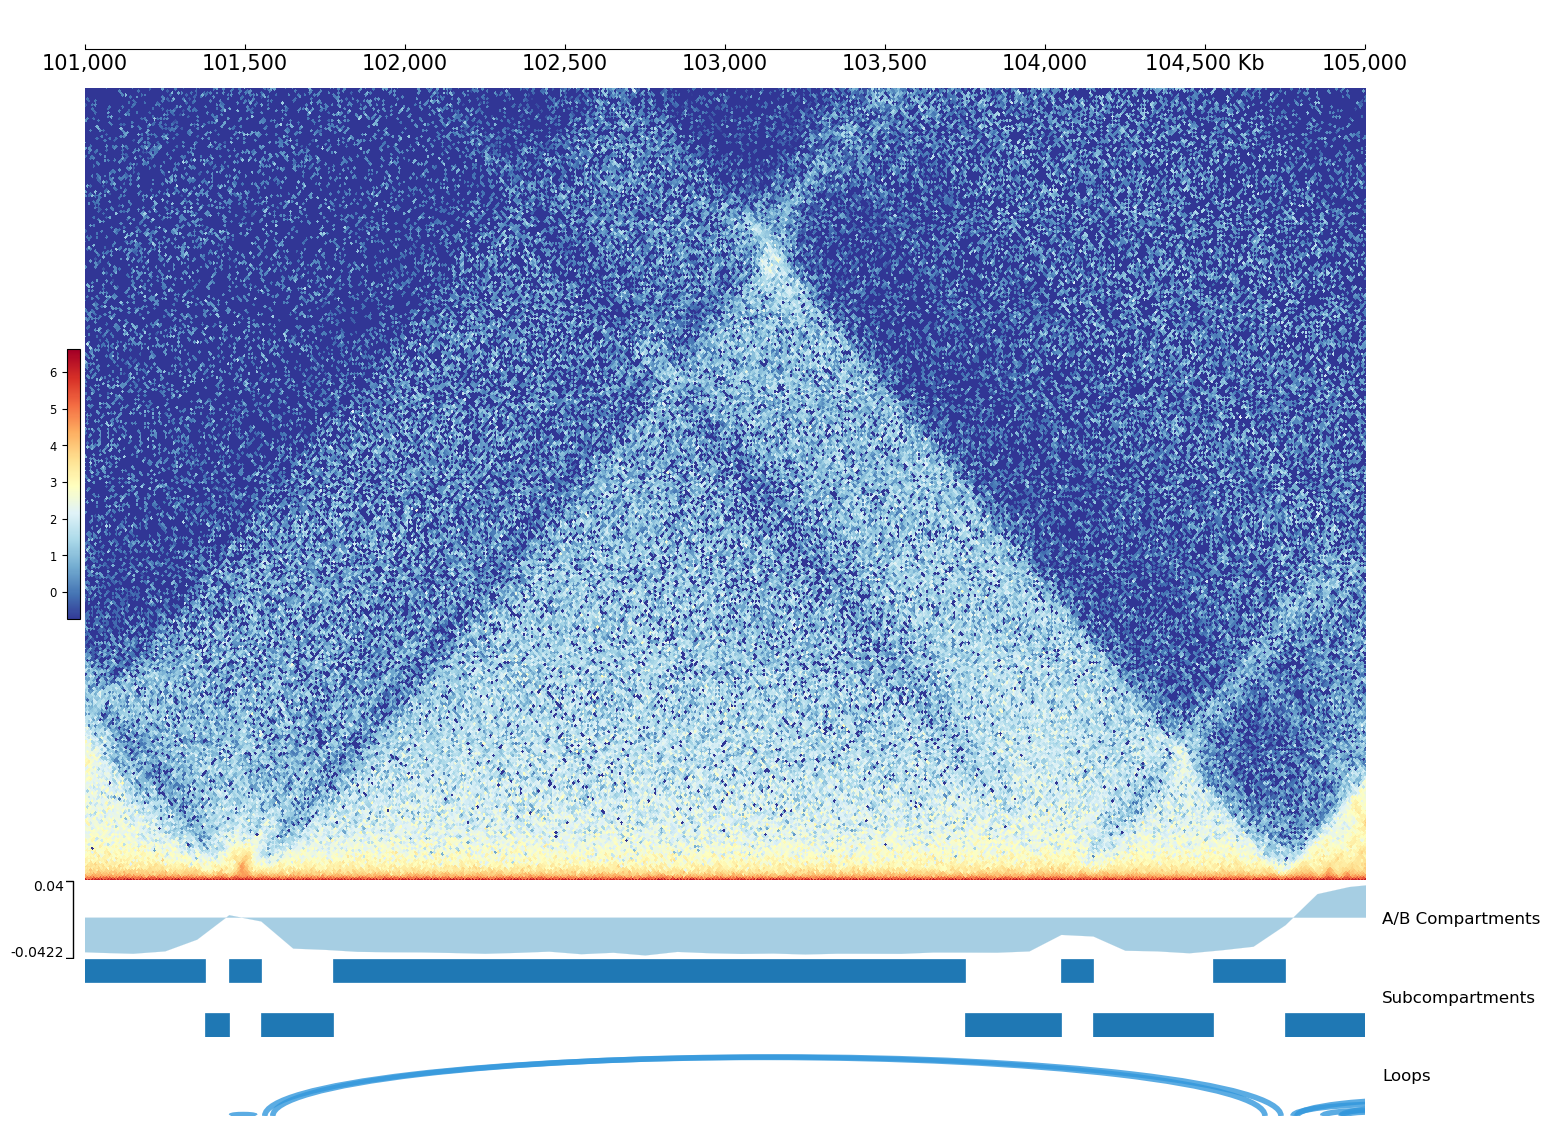

In [2]:
#Figure 1B (PYTHON)
#generic visualization
import coolbox
from coolbox.api import *

frame = XAxis() + \
    HiCMat('hic_paper_analysis/hic_maps/pro_inter.hic', cmap = 'RdYlBu_r') + \
    BedGraph('hic_paper_analysis/coolbox_visualizations/Arima_pro_hg38__KR_100000_eigen_hg38.bedGraph') + Title('A/B Compartments') + \
    BED('hic_paper_analysis/coolbox_visualizations/all_sub_compartments.bed', labels = False) + Title('Subcompartments') + \
    Arcs('hic_paper_analysis/coolbox_visualizations/for_visualization_pro_loops.bedpe', line_width = 4) + Title('Loops')
frame.plot('chr9:101000000-105000000')

[[-0.01284466  0.18574263]
 [ 0.0118306   0.18255041]
 [-0.08020297  0.21886165]
 [ 0.02517878 -0.18474542]
 [ 0.04017805 -0.19997227]
 [ 0.0158602  -0.20243699]]


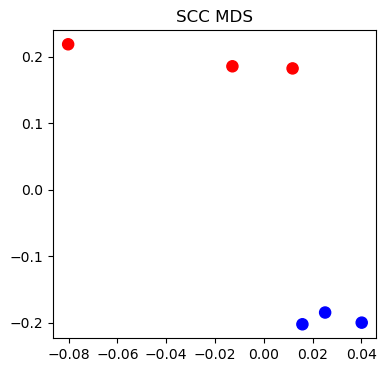

In [4]:
#Figure 1C (PYTHON)
from hicrep.utils import readMcool
from hicrep import hicrepSCC
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt       
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

cool_list = ['hic_paper_analysis/replicate_compare/arima2', 'hic_paper_analysis/replicate_compare/arima4', 'hic_paper_analysis/replicate_compare/arima7', 
             'hic_paper_analysis/replicate_compare/arima9', 'hic_paper_analysis/replicate_compare/arima10', 'hic_paper_analysis/replicate_compare/arima12']

pro_list = ['hic_paper_analysis/replicate_compare/arima2', 'hic_paper_analysis/replicate_compare/arima4', 'hic_paper_analysis/replicate_compare/arima7']
sen_list = ['hic_paper_analysis/replicate_compare/arima9', 'hic_paper_analysis/replicate_compare/arima10', 'hic_paper_analysis/replicate_compare/arima12']

# smoothing window half-size
h = 1

# maximal genomic distance to include in the calculation
dBPMax = 500000

# whether to perform down-sampling or not 
# if set True, it will bootstrap the data set # with larger contact counts to
# the same number of contacts as in the other data set; otherwise, the contact 
# matrices will be normalized by the respective total number of contacts
bDownSample = False

#create matrix for MDS
scc_numpy = np.zeros((6,6))

for num1 in range(0,6):
    for num2 in range(0,6):
        fcool1 = cool_list[num1]
        fcool2 = cool_list[num2]
        
        cool1, binSize1 = readMcool(fcool1, -1)
        cool2, binSize2 = readMcool(fcool2, -1)
        
        binSize = binSize1
        
        scc = hicrepSCC(cool1, cool2, h, dBPMax, bDownSample, np.array(['1', '2', '3', '4',
                                                           '5', '6', '7', '8',
                                                            '9', '10', '11', '12',
                                                           '13', '14', '15', '16',
                                                            '17', '18', '19', '20',
                                                             '21', '22', 'X'], dtype=str))
        
        scc_numpy[num1,num2] = sum(scc)/len(scc)

mds = MDS(random_state=0)
scc_numpy_transform = mds.fit_transform(scc_numpy)
print(scc_numpy_transform)

colors = ['r', 'r', 'r', 'b', 'b', 'b']#, 'y', 'y', 'y', 'g', 'g']
labels = ['pro', 'pro', 'pro', 'sen', 'sen', 'sen']#, 'qui', 'qui', 'qui', 'imr90_pro', 'imr90_pro']
size = [64, 64, 64, 64, 64, 64]#, 64, 64, 64,64,64]

fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(scc_numpy_transform[:,0], scc_numpy_transform[:,1], s=size, c=colors, label=labels)
plt.title('SCC MDS')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [1]:
#A/B compartment analysis (BASH)
#compartments called with dchic_v1
#pro V qui V sen and narita data separately
#Figure 2A

#pro v RS

#get total number (of 100 kb bins)
wc -l hic_paper_analysis/compartment_analysis/pro_vs_sen_full_compartment_details.bedGraph

#find sig bins and substract pro from sen
#if its positive its towards A
awk '{if($9<=0.05)print$0}' hic_paper_analysis/compartment_analysis/pro_vs_sen_differential_compartments.bedGraph | awk '{print$0"\t"$5-$4}' | awk '{if($10>0)print$0}' | wc -l 
#its its negative its towards B
awk '{if($9<=0.05)print$0}' hic_paper_analysis/compartment_analysis/pro_vs_sen_differential_compartments.bedGraph | awk '{print$0"\t"$5-$4}' | awk '{if($10<0)print$0}' | wc -l

#pro v OIS (same process)
wc -l hic_paper_analysis/compartment_analysis/narita_pro_vs_OIS_full_compartment_details.bedGraph
awk '{if($9<=0.05)print$0}' hic_paper_analysis/compartment_analysis/narita_pro_vs_OIS_differential_compartments.bedGraph | awk '{print$0"\t"$5-$4}' | awk '{if($10>0)print$0}' | wc -l
awk '{if($9<=0.05)print$0}' hic_paper_analysis/compartment_analysis/narita_pro_vs_OIS_differential_compartments.bedGraph | awk '{print$0"\t"$5-$4}' | awk '{if($10<0)print$0}' | wc -l


28410 hic_paper_analysis/compartment_analysis/pro_vs_sen_full_compartment_details.bedGraph
1110
383
28406 hic_paper_analysis/compartment_analysis/narita_pro_vs_OIS_full_compartment_details.bedGraph
920
329


Figure 2 (A/B)

ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846





	Pearson's Chi-squared test

data:  t(dchic_for_chi_pro_RS_pro_OIS)
X-squared = 22.779, df = 2, p-value = 1.131e-05


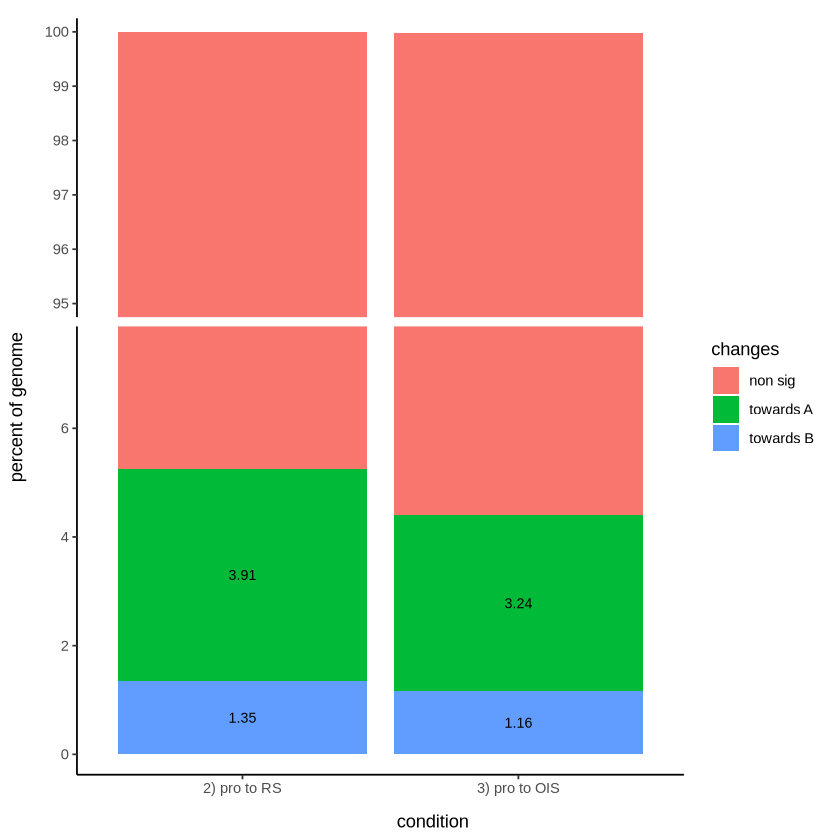

In [1]:
#Figure 2A (R)
library(ggplot2)
library(ggbreak)

dchic_df <- data.frame(changes = c('non sig', 'towards A', 'towards B', 'non sig', 'towards A', 'towards B'),
                       condition = c('2) pro to RS', '2) pro to RS', '2) pro to RS', '3) pro to OIS', '3) pro to OIS', '3) pro to OIS'),
                       percent_of_genome = c(28410-1110-383, 1110, 383, 28406-920-330, 920, 330))

dchic_df$percent_of_genome = dchic_df$percent_of_genome/28410*100

dchic_plot <- ggplot(dchic_df, aes(fill=changes, y=percent_of_genome, x = condition, label = round(percent_of_genome, digits = 2))) + 
  geom_bar(position="stack", stat="identity") +  geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
  theme(text = element_text(size = 25)) + theme_bw() + theme(
    plot.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  ) +
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black')) + ylab("percent of genome") + scale_y_break(c(7.5, 95))
dchic_plot

dchic_for_chi_pro_RS_pro_OIS <- data.frame(pro_RS = c(28410-1110-383, 1110, 383),
                                           pro_ois = c(28406-920-330, 920, 330))
chisq.test(t(dchic_for_chi_pro_RS_pro_OIS))

In [1]:
#Figure 2B (python)
import numpy as np
import pandas as pd

#create pro to ois DF

#import files
pro_ois_gtf_file = 'hic_paper_analysis/rna/ENCFF159KBI_w_genes.bed'
pro_ois_dchic_file = 'hic_paper_analysis/compartment_analysis/narita_pro_vs_OIS_full_compartment_details.bedGraph'
pro_ois_rna_file = 'hic_paper_analysis/rna/ois_pro_out_simp.txt'

#read in gtf
pro_ois_gtf_df = pd.read_csv(pro_ois_gtf_file, 
                     delimiter="\t", 
                     header = None,
                    names=["chr", "start", "end", "gene_name"],
                    dtype = {'chr': str, 'start': int, 'end': int, 'gene_name':str})

#intersect and retrieve dchic data

#read in dchic
pro_ois_dchic_df = pd.read_csv(pro_ois_dchic_file,
                     delimiter = "\t",
                       dtype = {'chr': str, 'start': int, 'end': int, 'pro':float, 'sen':float})

#loop through gtf by gene
pro_ois_gtf_df = pro_ois_gtf_df.reset_index()

pro_ois_dchic_list = []
pro_ois_dchic_fdr = []
for index, row in pro_ois_gtf_df.iterrows():
    pro_ois_match = (pro_ois_dchic_df[(pro_ois_dchic_df.chr == row['chr']) & (pro_ois_dchic_df.start <= row['start']) & (pro_ois_dchic_df.end >= row['end'])])
    if len(pro_ois_match) > 0:
        pro_ois_to_append = pro_ois_match.RIS - pro_ois_match.grow
        pro_ois_dchic_list.append(pro_ois_to_append.iloc[0])
        pro_ois_dchic_fdr.append(pro_ois_match.padj.iloc[0])
    else:
        pro_ois_dchic_list.append('NA')
        pro_ois_dchic_fdr.append('NA')

#add to gtf data frame
pro_ois_gtf_df['dchic'] = pro_ois_dchic_list
pro_ois_gtf_df['dchic_fdr'] = pro_ois_dchic_fdr
pro_ois_gtf_df = pro_ois_gtf_df[pro_ois_gtf_df.dchic != 'NA']

#intersect w/ logFC

pro_ois_rna_df = pd.read_csv(pro_ois_rna_file,
                     delimiter = "\t")

pro_ois_gtf_df = pro_ois_gtf_df.reset_index()

pro_ois_rna_list = []
pro_ois_fdr_list = []
for index, row in pro_ois_gtf_df.iterrows():
    pro_ois_match = (pro_ois_rna_df[pro_ois_rna_df.Gene == row['gene_name']])
    if len(pro_ois_match) > 0:
        pro_ois_rna_list.append(pro_ois_match.logFC.iloc[0])
        pro_ois_fdr_list.append(pro_ois_match.FDR.iloc[0])
    else:
        pro_ois_rna_list.append('NA')
        pro_ois_fdr_list.append('NA')

#add to data frame
pro_ois_gtf_df['rna'] = pro_ois_rna_list
pro_ois_gtf_df['rna_fdr'] = pro_ois_fdr_list
pro_ois_gtf_df = pro_ois_gtf_df[pro_ois_gtf_df.rna != 'NA']

pro_ois_gtf_df

#filter for venn diagrams
pro_ois_towards_a_all = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic > 0)]
pro_ois_towards_a_up = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic > 0) &
                                    (pro_ois_gtf_df.rna_fdr <= 0.05) & (pro_ois_gtf_df.rna > 0)]
pro_ois_towards_a_down = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic > 0) &
                                    (pro_ois_gtf_df.rna_fdr <= 0.05) & (pro_ois_gtf_df.rna < 0)]

pro_ois_towards_b_all = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic < 0)]
pro_ois_towards_b_up = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic < 0) &
                                    (pro_ois_gtf_df.rna_fdr <= 0.05) & (pro_ois_gtf_df.rna > 0)]
pro_ois_towards_b_down = pro_ois_gtf_df[(pro_ois_gtf_df.dchic_fdr <= 0.05) & (pro_ois_gtf_df.dchic < 0) &
                                    (pro_ois_gtf_df.rna_fdr <= 0.05) & (pro_ois_gtf_df.rna < 0)]





level_0  index   chr      start        end        gene_name     dchic  \
181        207    207  chr1    4012921    4019508  ENSG00000284703  0.842549   
185        211    211  chr1    4551735    4552145  ENSG00000227169  0.795728   
186        212    212  chr1    4571481    4594009  ENSG00000232596  0.795728   
513        598    598  chr1   18015712   18045612  ENSG00000284653  1.141772   
514        599    599  chr1   18065657   18074412  ENSG00000261781  1.141772   
...        ...    ...   ...        ...        ...              ...       ...   
46115    58110  58110  chrX  155767812  155782459  ENSG00000168939  1.320394   
46116    58111  58111  chrX  155828585  155829576  ENSG00000237801  1.113351   
46117    58112  58112  chrX  155875636  155875885  ENSG00000237040  1.113351   
46118    58114  58114  chrX  155978992  155979325  ENSG00000228410  1.524966   
46119    58115  58115  chrX  155985370  155986249  ENSG00000223484  1.524966   

      dchic_fdr    rna  rna_fdr  
181      0.0373  0.000   1.0000  
185    0.041521  0.000   1.0000  
186    0.041521  0.000   1.0000  
513         0.0  0.000   1.0000  
514         0.0  0.000   1.0000  
...         ...    ...      ...  
46115  0.000054  0.392   0.0625  
46116  0.014574  0.664   1.0000  
46117  0.014574  0.000   1.0000  
46118  0.000006  0.000   1.0000  
46119  0.000006  1.230   0.6860  

[2068 rows x 10 columns]

In [2]:
#Figure 2B (python)
import numpy as np
import pandas as pd

#create pro to rs DF

#import files
pro_rs_gtf_file = 'hic_paper_analysis/rna/ENCFF159KBI_w_genes.bed'
pro_rs_dchic_file = 'hic_paper_analysis/compartment_analysis/pro_vs_sen_full_compartment_details.bedGraph'
pro_rs_rna_file = 'hic_paper_analysis/rna/sen_pro_out_simp.txt'

#read in gtf
pro_rs_gtf_df = pd.read_csv(pro_rs_gtf_file, 
                     delimiter="\t", 
                     header = None,
                    names=["chr", "start", "end", "gene_name"],
                    dtype = {'chr': str, 'start': int, 'end': int, 'gene_name':str})

#intersect and retrieve dchic data

#read in dchic
pro_rs_dchic_df = pd.read_csv(pro_rs_dchic_file,
                     delimiter = "\t",
                       dtype = {'chr': str, 'start': int, 'end': int, 'pro':float, 'sen':float})

#loop through gtf by gene
pro_rs_gtf_df = pro_rs_gtf_df.reset_index()

pro_rs_dchic_list = []
pro_rs_dchic_fdr = []
for index, row in pro_rs_gtf_df.iterrows():
    pro_rs_match = (pro_rs_dchic_df[(pro_rs_dchic_df.chr == row['chr']) & 
                    (pro_rs_dchic_df.start <= row['start']) & (pro_rs_dchic_df.end >= row['end'])])
    if len(pro_rs_match) > 0:
        pro_rs_to_append = pro_rs_match.sen - pro_rs_match.pro
        pro_rs_dchic_list.append(pro_rs_to_append.iloc[0])
        pro_rs_dchic_fdr.append(pro_rs_match.padj.iloc[0])
    else:
        pro_rs_dchic_list.append('NA')
        pro_rs_dchic_fdr.append('NA')

#add to gtf data frame
pro_rs_gtf_df['dchic'] = pro_rs_dchic_list
pro_rs_gtf_df['dchic_fdr'] = pro_rs_dchic_fdr
pro_rs_gtf_df = pro_rs_gtf_df[pro_rs_gtf_df.dchic != 'NA']

#intersect w/ logFC

pro_rs_rna_df = pd.read_csv(pro_rs_rna_file,
                     delimiter = "\t")

pro_rs_gtf_df = pro_rs_gtf_df.reset_index()

pro_rs_rna_list = []
pro_rs_fdr_list = []
for index, row in pro_rs_gtf_df.iterrows():
    pro_rs_match = (pro_rs_rna_df[pro_rs_rna_df.Gene == row['gene_name']])
    if len(pro_rs_match) > 0:
        pro_rs_rna_list.append(pro_rs_match.logFC.iloc[0])
        pro_rs_fdr_list.append(pro_rs_match.FDR.iloc[0])
    else:
        pro_rs_rna_list.append('NA')
        pro_rs_fdr_list.append('NA')

#add to data frame
pro_rs_gtf_df['rna'] = pro_rs_rna_list
pro_rs_gtf_df['rna_fdr'] = pro_rs_fdr_list
pro_rs_gtf_df = pro_rs_gtf_df[pro_rs_gtf_df.rna != 'NA']


#filter for venn diagrams
pro_rs_towards_a_all = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic > 0)]
pro_rs_towards_a_up = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic > 0) &
                                    (pro_rs_gtf_df.rna_fdr <= 0.05) & (pro_rs_gtf_df.rna > 0)]
pro_rs_towards_a_down = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic > 0) &
                                    (pro_rs_gtf_df.rna_fdr <= 0.05) & (pro_rs_gtf_df.rna < 0)]

pro_rs_towards_b_all = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic < 0)]
pro_rs_towards_b_up = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic < 0) &
                                    (pro_rs_gtf_df.rna_fdr <= 0.05) & (pro_rs_gtf_df.rna > 0)]
pro_rs_towards_b_down = pro_rs_gtf_df[(pro_rs_gtf_df.dchic_fdr <= 0.05) & (pro_rs_gtf_df.dchic < 0) &
                                    (pro_rs_gtf_df.rna_fdr <= 0.05) & (pro_rs_gtf_df.rna < 0)]



In [4]:
#Figure 2B (python)
#transform into sets and find intersections/unique

def find_overlap_unique(df1, df2, column_name):
    set1 = set(df1[column_name])
    set2 = set(df2[column_name])
    unique_set1 = set1-set2
    unique_set2 = set2-set1
    shared = set1 & set2
    print('unique to first set:')
    print(len(unique_set1))
    print('unique to second set:')
    print(len(unique_set2))
    print('shared:')
    print(len(shared))
    return unique_set1, unique_set2, shared

print("towards A all")
towards_a_all_pro_ois_unique,towards_a_all_pro_rs_unique,towards_a_all_shared = find_overlap_unique(pro_ois_towards_a_all, pro_rs_towards_a_all, 'gene_name')

print("towards A up")
towards_a_up_pro_ois_unique,towards_a_up_pro_rs_unique, towards_a_up_shared = find_overlap_unique(pro_ois_towards_a_up, pro_rs_towards_a_up, 'gene_name')

print("towards A down")
towards_a_down_pro_ois_unique,towards_a_down_pro_rs_unique,towards_a_down_shared = find_overlap_unique(pro_ois_towards_a_down, pro_rs_towards_a_down, 'gene_name')

print("towards B all")
towards_b_all_pro_ois_unique,towards_b_all_pro_rs_unique,towards_b_all_shared = find_overlap_unique(pro_ois_towards_b_all, pro_rs_towards_b_all, 'gene_name')

print("towards B up")
towards_b_up_pro_ois_unique,towards_b_up_pro_rs_unique, towards_b_up_shared = find_overlap_unique(pro_ois_towards_b_up, pro_rs_towards_b_up, 'gene_name')

print("towards B down")
towards_b_down_pro_ois_unique,towards_b_down_pro_rs_unique,towards_b_down_shared = find_overlap_unique(pro_ois_towards_b_down, pro_rs_towards_b_down, 'gene_name')


towards A all
unique to first set:
1752
unique to second set:
1872
shared:
316
towards A up
unique to first set:
88
unique to second set:
126
shared:
4
towards A down
unique to first set:
23
unique to second set:
64
shared:
2
towards B all
unique to first set:
398
unique to second set:
959
shared:
15
towards B up
unique to first set:
11
unique to second set:
46
shared:
0
towards B down
unique to first set:
10
unique to second set:
93
shared:
2


In [5]:
#save files for use with cluster profilers (GO/KEGG)
with open('hic_paper_analysis/compartment_analysis/towards_a_up_pro_ois_unique.txt', 'w') as f:
    for line in towards_a_up_pro_ois_unique:
        f.write(f"{line}\n")

with open('hic_paper_analysis/compartment_analysis/towards_a_up_pro_rs_unique.txt', 'w') as f:
    for line in towards_a_up_pro_rs_unique:
        f.write(f"{line}\n")

with open('hic_paper_analysis/compartment_analysis/towards_a_up_shared.txt', 'w') as f:
    for line in towards_a_up_shared:
        f.write(f"{line}\n")

with open('hic_paper_analysis/compartment_analysis/towards_b_down_pro_ois_unique.txt', 'w') as f:
    for line in towards_b_down_pro_ois_unique:
        f.write(f"{line}\n")

with open('hic_paper_analysis/compartment_analysis/towards_b_down_pro_rs_unique.txt', 'w') as f:
    for line in towards_b_down_pro_rs_unique:
        f.write(f"{line}\n")

with open('hic_paper_analysis/compartment_analysis/towards_b_down_shared.txt', 'w') as f:
    for line in towards_b_down_shared:
        f.write(f"{line}\n")

In [6]:
#setup for figure 2D
rs_sasp_set = set(line.strip() for line in open('hic_paper_analysis/SASP/sasp_rs_up.txt'))
ois_sasp_set = set(line.strip() for line in open('hic_paper_analysis/SASP/sasp_ois_up.txt'))

#determine overlap

#rs
towards_a_up_pro_rs_unique_not_sasp = towards_a_up_pro_rs_unique - rs_sasp_set
print("towards A up RS not SASP:")
print(len(towards_a_up_pro_rs_unique_not_sasp))
sasp_not_towards_a_up_pro_rs_unique = rs_sasp_set - towards_a_up_pro_rs_unique
print("SASP not towards A up RS):")
print(len(sasp_not_towards_a_up_pro_rs_unique))
towards_a_up_pro_rs_unique_and_sasp = towards_a_up_pro_rs_unique & rs_sasp_set
print("towards A up RS and SASP:")
print(len(towards_a_up_pro_rs_unique_and_sasp))

#ois
towards_a_up_pro_ois_unique_not_sasp = towards_a_up_pro_ois_unique - ois_sasp_set
print("towards A up OIS not SASP:")
print(len(towards_a_up_pro_ois_unique_not_sasp))
sasp_not_towards_a_up_pro_ois_unique = ois_sasp_set - towards_a_up_pro_ois_unique
print("SASP not towards A up OIS):")
print(len(sasp_not_towards_a_up_pro_ois_unique))
towards_a_up_pro_ois_unique_and_sasp = towards_a_up_pro_ois_unique & ois_sasp_set
print("towards A up OIS and SASP:")
print(len(towards_a_up_pro_ois_unique_and_sasp))


towards A up RS not SASP:
116
SASP not towards A up RS):
470
towards A up RS and SASP:
10
towards A up OIS not SASP:
84
SASP not towards A up OIS):
338
towards A up OIS and SASP:
4



	Fisher's Exact Test for Count Data

data:  rbind(c(316, 1872), c(1752, 59432 - (316 + 1872 + 1752)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 4.787458      Inf
sample estimates:
odds ratio 
  5.346104 


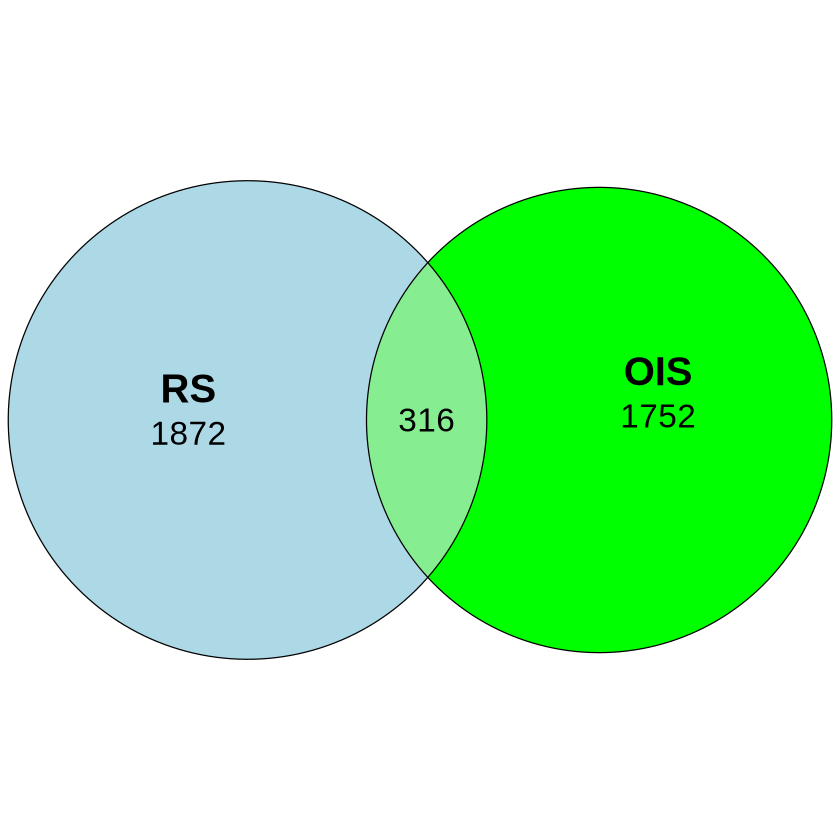


	Fisher's Exact Test for Count Data

data:  rbind(c(15, 959), c(398, 59432 - (15 + 959 + 398)))
p-value = 0.003799
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 1.389828      Inf
sample estimates:
odds ratio 
  2.281688 


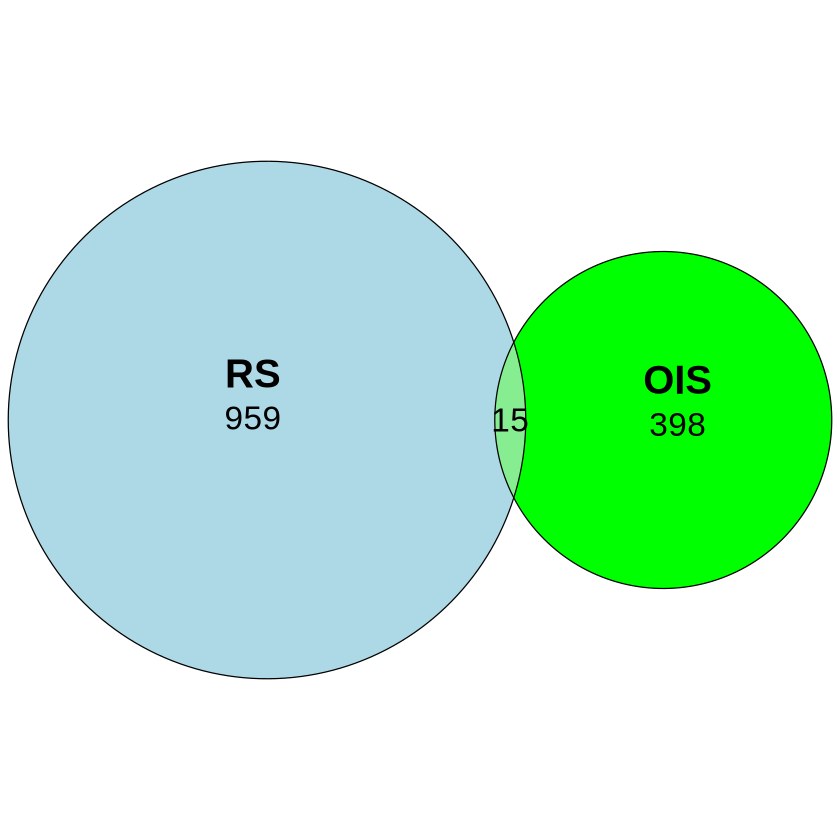

In [1]:
#Figure 2B (R)
library(eulerr)



#towards A
towardsAABVenn <- euler(c(
  "RS" = 1872,
  "OIS" = 1752,
  "RS&OIS" = 316
))

plot(
  towardsAABVenn,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("lightblue", "green")
)

fisher.test(rbind(c(316,1872),c(1752,59432 - (316+1872+1752))), alternative = "greater")

#towards B
towardsBABVenn <- euler(c(
  "RS" = 959,
  "OIS" = 398,
  "RS&OIS" = 15
))

plot(
  towardsBABVenn,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("lightblue", "green")
)

fisher.test(rbind(c(15,959),c(398,59432 - (15+959+398))), alternative = "greater")



clusterProfiler v4.8.3  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

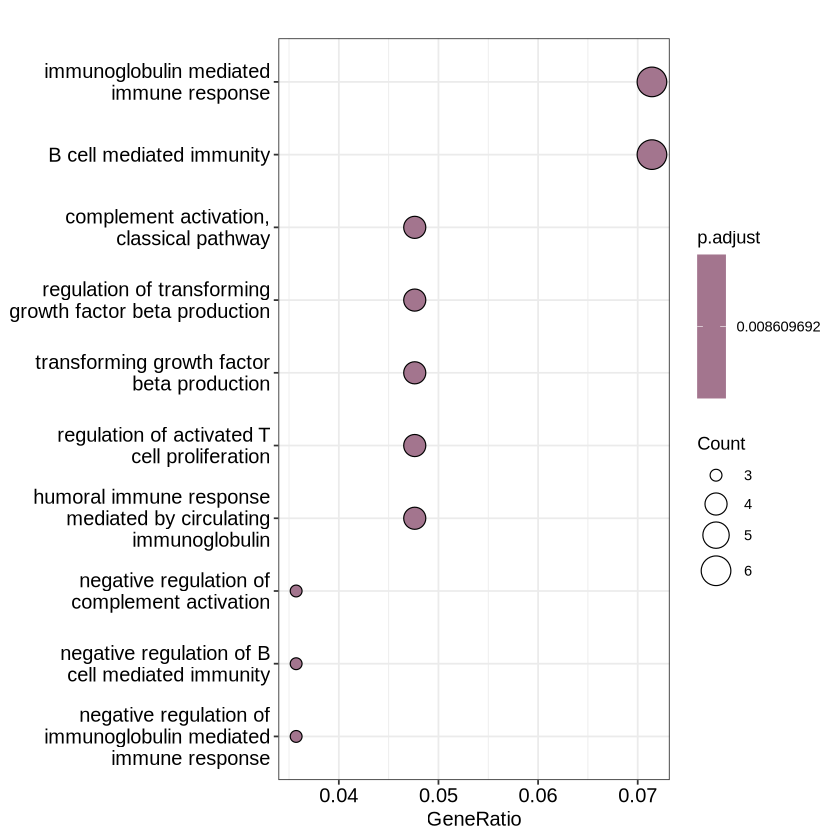

In [2]:
#Figure 2C (R)
#GO of towards A RS only
library(clusterProfiler)
library(org.Hs.eg.db)

gene_list <- read.table('hic_paper_analysis/compartment_analysis/towards_a_up_pro_rs_unique.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)

dchic_towards_A_RS_go <- dotplot(ego, showCategory=10)
dchic_towards_A_RS_go


	Fisher's Exact Test for Count Data

data:  rbind(c(11, 119), c(469, 59432 - (11 + 119 + 469)))
p-value = 1.044e-08
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 6.310577      Inf
sample estimates:
odds ratio 
  11.59367 


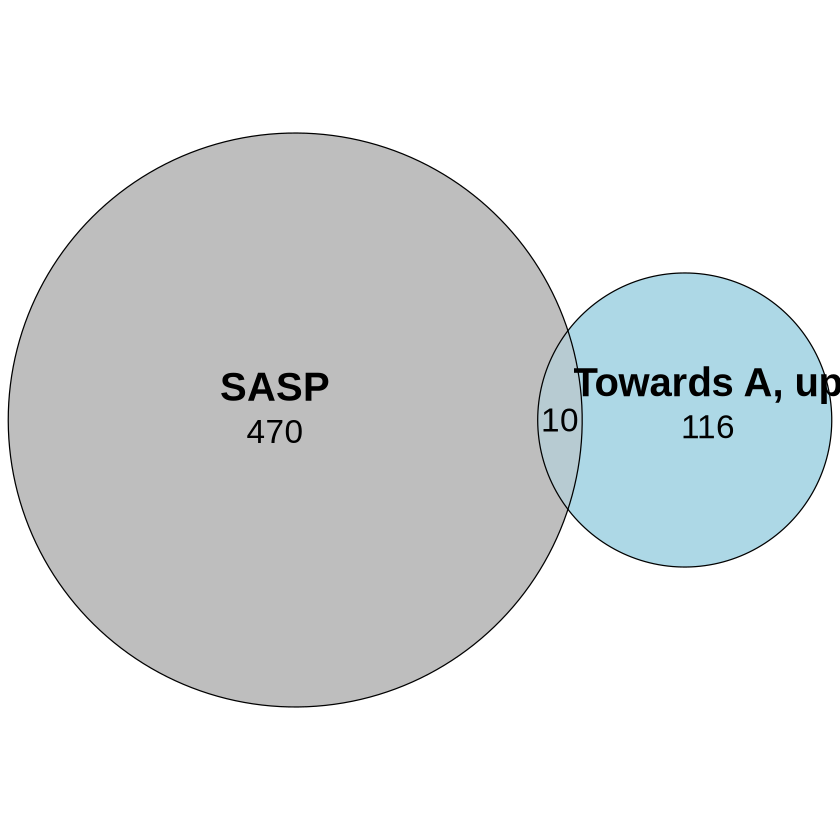


	Fisher's Exact Test for Count Data

data:  rbind(c(5, 87), c(337, 59432 - (5 + 87 + 337)))
p-value = 2e-04
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 3.852716      Inf
sample estimates:
odds ratio 
  10.06005 


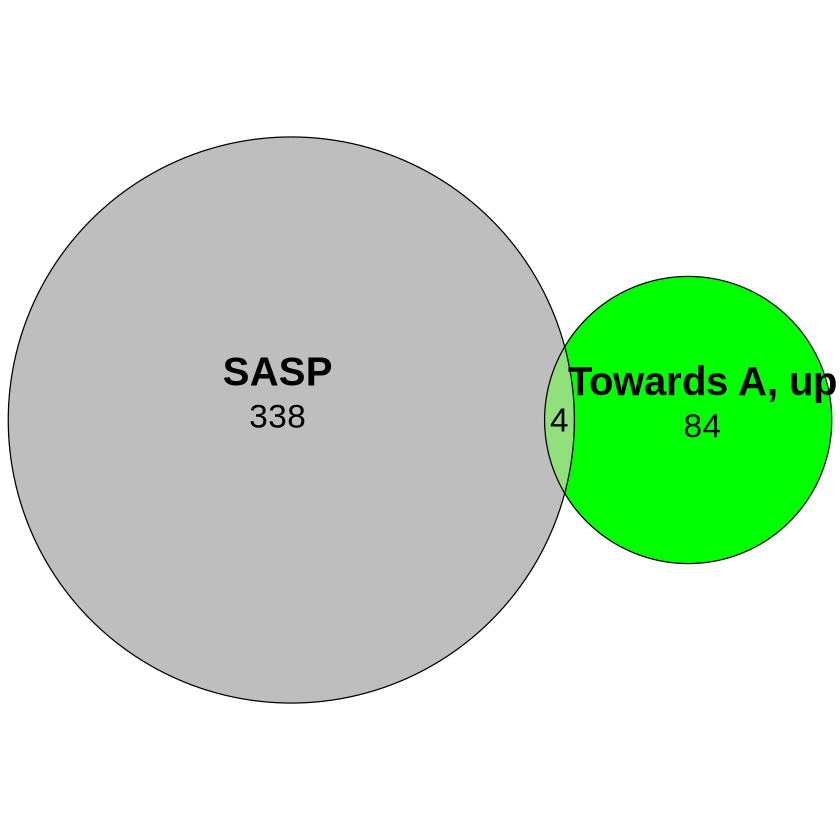

In [3]:
#Figure 2D (R)
#overlap of SASP and toward A upreg

library(eulerr)

#towards A
SASPRStowardsAVenn <- euler(c(
  "SASP" = 470,
  "Towards A, up" = 116,
  "Towards A, up&SASP" = 10
))

plot(
  SASPRStowardsAVenn,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "lightblue")
)

fisher.test(rbind(c(11,119),c(469,59432 - (11+119+469))), alternative = "greater")

#towards B
SASPOIStowardsAVenn <- euler(c(
  "SASP" = 338,
  "Towards A, up" = 84,
  "Towards A, up&SASP" = 4
))

plot(
  SASPOIStowardsAVenn,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "green")
)

fisher.test(rbind(c(5,87),c(337,59432 - (5+87+337))), alternative = "greater")

Figure 3

In [1]:
#subcompartment analysis (python) [warning this takes a while - can run on each condition]
#set up for figures 3A/C

import numpy as np

#get absolute number of bins
def get_subcomp(input_np, resolution):

    #define subcompartments
    list_of_subcomp = ['A.1.1.', 'A.1.2.', 'A.2.1.', 'A.2.2.', 'B.1.1.', 'B.1.2.', 'B.2.1.', 'B.2.2.']

    #initialize count
    bin_count_list = []

    #loop through subcompartments and count
    for subcomp in list_of_subcomp:
        
        matches = np.flatnonzero(np.core.defchararray.find(input_np[:,3],subcomp)!=-1)
        bin_count = 0
        for match in matches:
            bin_count = bin_count + (int(input_np[match,2]) - int(input_np[match,1])+1)/resolution
        bin_count_list.append(int(bin_count))

    print(bin_count_list)
    return bin_count_list

#determine switching numbers
def get_switching_numbers(input_np):
    
    unique = ['A.1.1._A.1.1.', 'A.1.1_A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
             'A.1.1._B.1.1.', 'A.1.1_B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.','A.1.1._NA',
             'A.1.2._A.1.1.', 'A.1.2_A.1.2.', 'A.1.2._A.2.1.', 'A.1.2._A.2.2.',
             'A.1.2._B.1.1.', 'A.1.2_B.1.2.', 'A.1.2._B.2.1.', 'A.1.2._B.2.2.','A.1.2._NA',
             'A.2.1._A.1.1.', 'A.2.1_A.1.2.', 'A.2.1._A.2.1.', 'A.2.1._A.2.2.',
             'A.2.1._B.1.1.', 'A.2.1_B.1.2.', 'A.2.1._B.2.1.', 'A.2.1._B.2.2.','A.2.1._NA',
             'A.2.2._A.1.1.', 'A.2.2_A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._A.2.2.',
             'A.2.2._B.1.1.', 'A.2.2_B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.','A.1.1._NA',
             'B.1.1._A.1.1.', 'B.1.1_A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
             'B.1.1._B.1.1.', 'B.1.1_B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.','B.1.1._NA',
             'B.1.2._A.1.1.', 'B.1.2_A.1.2.', 'B.1.2._A.2.1.', 'B.1.2._A.2.2.',
             'B.1.2._B.1.1.', 'B.1.2_B.1.2.', 'B.1.2._B.2.1.', 'B.1.2._B.2.2.','B.1.2._NA',
             'B.2.1._A.1.1.', 'B.2.1_A.1.2.', 'B.2.1._A.2.1.', 'B.2.1._A.2.2.',
             'B.2.1._B.1.1.', 'B.2.1_B.1.2.', 'B.2.1._B.2.1.', 'B.2.1._B.2.2.','B.2.1._NA',
             'B.2.2._A.1.1.', 'B.2.2_A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.',
             'B.2.2._B.1.1.', 'B.2.2_B.1.2.', 'B.2.2._B.2.1.', 'B.2.2._B.2.2.','B.2.2._NA',
             'NA_A.1.1.', 'NA_A.1.2.', 'NA_A.2.1.', 'NA_A.2.2.',
             'NA_B.1.1.', 'NA_B.1.2.', 'NA_B.2.1.', 'NA_B.2.2.','B.2.2._NA']

    counts = []

    for switch in unique:

        switch_matches = np.where(input_np[:,3] == switch)
        counts.append(len(switch_matches[0]))

    print(counts)
    print(len(counts))


#define switches
def find_sub_switches(input1, input2, resolution, output):

    #import condition 1
    condition1_np = np.genfromtxt(input1, dtype = str)

    #revise format
    for row in range(0,condition1_np.shape[0]):
        condition1_np[row,3] = condition1_np[row,3][0:6]

    #import condition 2
    condition2_np = np.genfromtxt(input2, dtype = str)

    #revise format
    for row in range(0,condition2_np.shape[0]):
        condition2_np[row,3] = condition2_np[row,3][0:6]

    #get switching for each
    print("for first condition the number of bins per subcompartment is:")
    get_subcomp(condition1_np, resolution)

    print("for second condition the number of bins per subcompartment is:")
    get_subcomp(condition2_np, resolution)

    #switching analysis

    #define chromosomes
    chromosome_nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                       '11', '12', '13', '14', '15', '16', '17', '18', '19',
                       '20', '21', '22', 'X']

    chr_sizes = []

    #loop through the genome to get max size and initialize
    for chr_num in chromosome_nums:

        #get max chr size

        #for condition 1
        condition1_matches = np.where(condition1_np[:,0] == 'chr' + str(chr_num))
        condition1_match_last_row = condition1_matches[0][-1]

        #for condition 2
        condition2_matches = np.where(condition2_np[:,0] == 'chr' + str(chr_num))
        condition2_match_last_row = condition2_matches[0][-1]

        #compare to find max chr size
        max_chr_size = max(int(condition1_np[condition1_match_last_row,2]), int(condition2_np[condition2_match_last_row,2]))
        chr_sizes.append(int(max_chr_size))

        #initialize np based on chr sizes
        bin_sizes = [int(chr_size / resolution) for chr_size in chr_sizes]
        final_np = np.zeros((sum(bin_sizes),4),dtype = 'U100')

    #initialize reference idx
    ref_idx = 0

    #loop through chromosomes and for each interval find matches in each condition
    for chr_num in range(0,len(chromosome_nums)):

        #initialize int
        for interval in range(1, chr_sizes[chr_num],resolution):

            #define interval
            int_start = interval
            int_end = interval + resolution - 1

            #add to final np
            final_np[ref_idx,0] = 'chr' + chromosome_nums[chr_num]
            final_np[ref_idx,1] = int_start
            final_np[ref_idx,2] = int_end

            #find matches in condition 1
            condition1_chr_matches = np.where(condition1_np[:,0] == ('chr' + chromosome_nums[chr_num]))
            condition1_int_matches = np.where((condition1_np[:,1].astype(int) <= int_start) &
                                               (condition1_np[:,2].astype(int) >= int_end))
            condition1_matches = list(set(condition1_chr_matches[0]) & set(condition1_int_matches[0]))

            if len(condition1_matches) > 0:
                condition1_to_add = condition1_np[condition1_matches,3][0]
            else:
                condition1_to_add = 'NA'

            #find matches in condition 2
            condition2_chr_matches = np.where(condition2_np[:,0] == ('chr' + chromosome_nums[chr_num]))
            condition2_int_matches = np.where((condition2_np[:,1].astype(int) <= int_start) &
                                               (condition2_np[:,2].astype(int) >= int_end))
            condition2_matches = list(set(condition2_chr_matches[0]) & set(condition2_int_matches[0]))

            if len(condition2_matches) > 0:
                condition2_to_add = condition2_np[condition2_matches,3][0]
            else:
                condition2_to_add = 'NA'

            #add to final np
            final_np[ref_idx,3] = condition1_to_add + "_" + condition2_to_add
            ref_idx = ref_idx + 1

    #save file
    np.savetxt(output, final_np, delimiter = '\t', fmt = '%s')

    #get switching numbers
    get_switching_numbers(final_np)

find_sub_switches('subcompartment_analysis/pro_all_sub_compartments.bed', 'subcompartment_analysis/sen_all_sub_compartments.bed', 25000,'subcompartment_analysis/test1.txt')
    

for first condition the number of bins per subcompartment is:
[24500, 12750, 10355, 7839, 7519, 9093, 13832, 28028]
for second condition the number of bins per subcompartment is:
[32499, 15129, 9507, 7511, 6417, 7033, 9258, 26677]
[21129, 0, 346, 128, 56, 0, 6, 2, 41, 5895, 0, 1290, 387, 96, 0, 26, 36, 24, 2811, 0, 2616, 1024, 341, 0, 56, 32, 8, 1235, 0, 2069, 1540, 746, 0, 130, 77, 41, 538, 0, 1229, 1560, 1322, 0, 435, 296, 6, 414, 0, 904, 1356, 1803, 0, 1443, 657, 14, 357, 0, 799, 1161, 1485, 0, 4064, 3099, 13, 115, 0, 250, 352, 521, 0, 3041, 22396, 32, 5, 2, 4, 3, 47, 58, 57, 82, 32]
81


In [4]:
library(ggplot2)
library(stringr)
library(dplyr)
library(ggpubr)

#subcompartments (R)#######################################################################################################################################
#https://stackoverflow.com/questions/38856309/r-grid-arrange-marginal-plots-to-ggplot2-heatmap-geom-tile


#subcompartment plot
list_of_subcomp = c('A.1.1.', 'A.1.2.', 'A.2.1.', 'A.2.2.', 'B.1.1.', 'B.1.2.', 'B.2.1.', 'B.2.2.')

#updated 5/31/23
pro_matches <- c(24500, 12750, 10355, 7839, 7519, 9093, 13832, 28028) 
pro_matches <- pro_matches*100/sum(pro_matches)
qui_matches <- c(21867, 14068, 10184, 8891, 8367, 10226, 12994, 27471)
qui_matches <- qui_matches*100/sum(qui_matches)
sen_matches <- c(32499, 15129, 9507, 7511, 6417, 7033, 9258, 26677)
sen_matches <- sen_matches*100/sum(sen_matches)

pro_sub_df <- data.frame(subcompartments = list_of_subcomp,
                         percent_of_genome = pro_matches)

qui_sub_df <- data.frame(subcompartments = list_of_subcomp,
                         percent_of_genome = qui_matches)

sen_sub_df <- data.frame(subcompartments = list_of_subcomp,
                         percent_of_genome = sen_matches)

sub_chi_pro_qui <- data.frame(pro = pro_matches,
                                        qui = qui_matches)
chisq.test(t(sub_chi_pro_qui))

sub_chi_pro_sen <- data.frame(pro = pro_matches,
                              sen = sen_matches)
chisq.test(t(sub_chi_pro_sen))

sub_chi_qui_sen <- data.frame(qui = qui_matches,
                              sen = sen_matches)
chisq.test(t(sub_chi_qui_sen))




Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





	Pearson's Chi-squared test

data:  t(sub_chi_pro_qui)
X-squared = 0.37305, df = 7, p-value = 0.9998



	Pearson's Chi-squared test

data:  t(sub_chi_pro_sen)
X-squared = 2.3325, df = 7, p-value = 0.9392



	Pearson's Chi-squared test

data:  t(sub_chi_qui_sen)
X-squared = 3.2828, df = 7, p-value = 0.8577


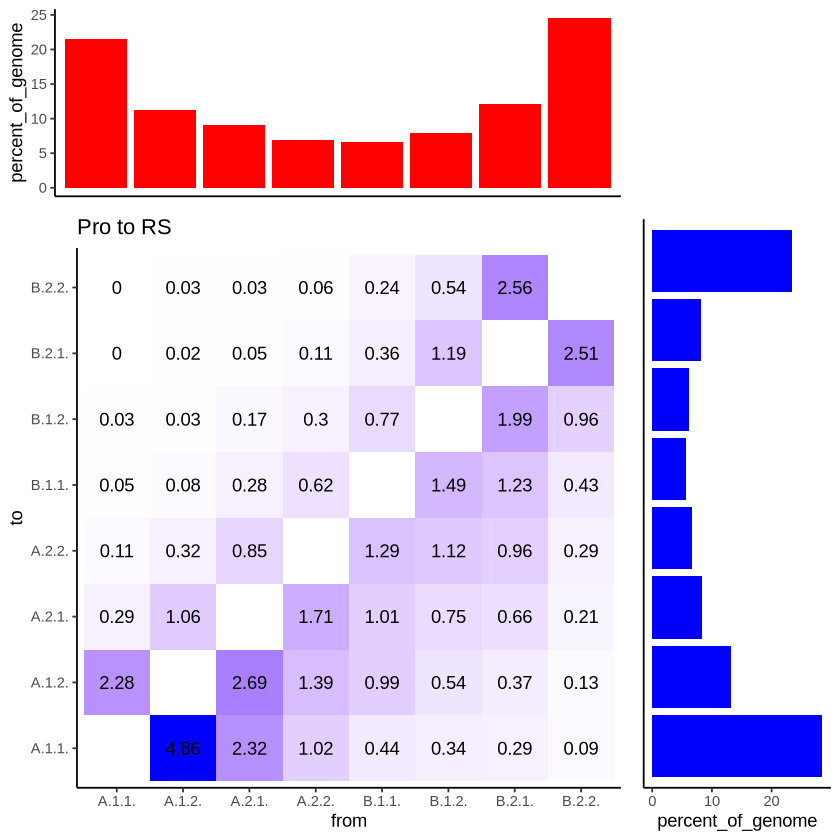

In [11]:
#subcompartments pro RS (R)#######################################################################################################################################
switches_vector <- c('A.1.1._A.1.1.', 'A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
                     'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.',
                     'A.1.1._NA', 'A.1.2._A.1.1.', 'A.1.2._A.1.2.', 'A.1.2._A.2.1.',
                     'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.',
                     'A.1.2._B.2.2.', 'A.1.2._NA', 'A.2.1._A.1.1.', 'A.2.1._A.1.2.',
                     'A.2.1._A.2.1.', 'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.',
                     'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 'A.2.1._NA', 'A.2.2._A.1.1.',
                     'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._A.2.2.', 'A.2.2._B.1.1.',
                     'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 'A.2.2._NA',
                     'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
                     'B.1.1._B.1.1.', 'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.',
                     'B.1.1._NA', 'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.',
                     'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.1.2.', 'B.1.2._B.2.1.',
                     'B.1.2._B.2.2.', 'B.1.2._NA', 'B.2.1._A.1.1.', 'B.2.1._A.1.2.',
                     'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.',
                     'B.2.1._B.2.1.', 'B.2.1._B.2.2.', 'B.2.1._NA', 'B.2.2._A.1.1.',
                     'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.',
                     'B.2.2._B.1.2.', 'B.2.2._B.2.1.', 'B.2.2._B.2.2.', 'B.2.2._NA', 'NA_A.1.1.',
                     'NA_A.1.2.', 'NA_A.2.1.', 'NA_A.2.2.', 'NA_B.1.1.', 'NA_B.1.2.', 'NA_B.2.1.',
                     'NA_B.2.2.', 'NA_NA')

#add counts
pro_sen_count_vector <- c(21129, 2760, 346, 128, 56, 32, 6, 2, 41, 5895, 4963, 1290, 387, 96, 33, 26, 36, 24, 2811, 3263, 2616, 1024, 341, 204, 56, 32, 8, 1235, 1679, 2069, 1540, 746, 358, 130, 77, 5, 538, 1201, 1229, 1560, 1322, 932, 435, 296, 6, 414, 660, 904, 1356, 1803, 1842, 1443, 657, 14, 357, 444, 799, 1161, 1485, 2410, 4064, 3099, 13, 115, 157, 250, 352, 521, 1164, 3041, 22396, 32, 5, 2, 4, 3, 47, 58, 57, 82, 7009)
pro_sen_count_vector <-pro_sen_count_vector*100/sum(pro_sen_count_vector)
matches <- grep('NA', switches_vector)
pro_sen_switching_df <- data.frame(switches_pro_to_sen = switches_vector[-matches],
                                   percent_of_genome = pro_sen_count_vector[-matches])

#split into from and to
pro_sen_switching_df[c('from', 'to')] <- str_split_fixed(pro_sen_switching_df$switches_pro_to_sen, '_', 2)

pro_sen_switching_df = pro_sen_switching_df[!(pro_sen_switching_df$from == pro_sen_switching_df$to),] #remove matching rows (from/to)

#add number of genes (for supp figure)
pro_sen_switching_df$num_genes = c(1561,	187,	66,	35,	32,	4,	3,	4126,	831,	204,	56,	14,	30,	28,	2034,	1950,	583,	226,	142,	27,	33,	795,	969,	1049,	438,	216,	103,	58,	321,	599,	756,	818,	526,	225,	126,	219,	309,	451,	731,	753,	678,	213,	175,	203,	362,	542,	624,	1063,	1089,	53,	75,	96,	143,	255,	387,	915)
pro_sen_heat_num_genes <- ggplot(pro_sen_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes)) + geom_text(aes(label = round(num_genes,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to RS") + theme(legend.position="bottom")

#add number of correct genes (for supp figure)
pro_sen_switching_df$num_genes_de_right = c(239,	35,	15,	4,	7,	2,	1,	735,	154,	39,	11,	4,	5,	4,	352,	311,	102,	37,	24,	7,	9,	150,	158,	173,	67,	25,	9,	11,	49,	98,	106,	114,	72,	26,	16,	35,	56,	63,	92,	88,	42,	20,	35,	41,	51,	90,	69,	120,	66,	10,	13,	22,	21,	32,	35,	64)
pro_sen_heat_conc <- ggplot(pro_sen_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_right)) + geom_text(aes(label = round(num_genes_de_right,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to RS") + theme(legend.position="bottom")

#add number of incorrect genes (for supp figure)
pro_sen_switching_df$num_genes_de_wrong = c(278,	29,	11,	3,	3,	0,	1,	593,	115,	28,	5,	3,	5,	4,	202,	238,	71,	23,	13,	2,	4,	50,	88,	91,	52,	19,	8,	6,	22,	37,	67,	63,	51,	14,	10,	14,	16,	25,	42,	63,	34,	19,	7,	9,	17,	30,	32,	57,	52,	0,	3,	3,	2,	9,	11,	26)
pro_sen_heat_disc <- ggplot(pro_sen_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_wrong)) + geom_text(aes(label = round(num_genes_de_wrong,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to RS") + theme(legend.position="bottom")

#pro_sen_sub_switch_summary <- pro_sen_switching_df %>%
#  group_by(to) %>%
#  summarise(across(num_genes_de, sum)) #combine_matching
#pro_sen_sub_switch_summary_count <- pull(pro_sen_sub_switch_summary, percent_of_genome)

pro_sen_heat <- ggplot(pro_sen_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = percent_of_genome)) + geom_text(aes(label = round(percent_of_genome,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to RS") + theme(legend.position="bottom")

pro_sen_empty = pro_sen_switching_df %>% 
  ggplot(aes(x = from, y = to)) +
  geom_blank() +
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        line = element_blank(),
        panel.background = element_blank())

pro_sen_to_sen <- ggplot(sen_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("blue")) + theme(legend.position="none") + coord_flip()
pro_sen_from_pro <-  ggplot(pro_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("red")) + theme(legend.position="none")

sen_marg_heat <- ggarrange(
  pro_sen_from_pro + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none") + theme(axis.title.x=element_blank(),
                                                                                             axis.text.x=element_blank(),
                                                                                             axis.ticks.x=element_blank()), 
  pro_sen_empty, 
  pro_sen_heat + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none"), 
  pro_sen_to_sen + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none") + theme(axis.title.y=element_blank(),
                                                                                             axis.text.y=element_blank(),
                                                                                             axis.ticks.y=element_blank()),
  nrow = 2, ncol = 2, widths = c(3, 1), heights = c(1, 3)
)

sen_marg_heat


	Pearson's Chi-squared test

data:  t(grow_OIS_DF)
X-squared = 0.9491, df = 7, p-value = 0.9956


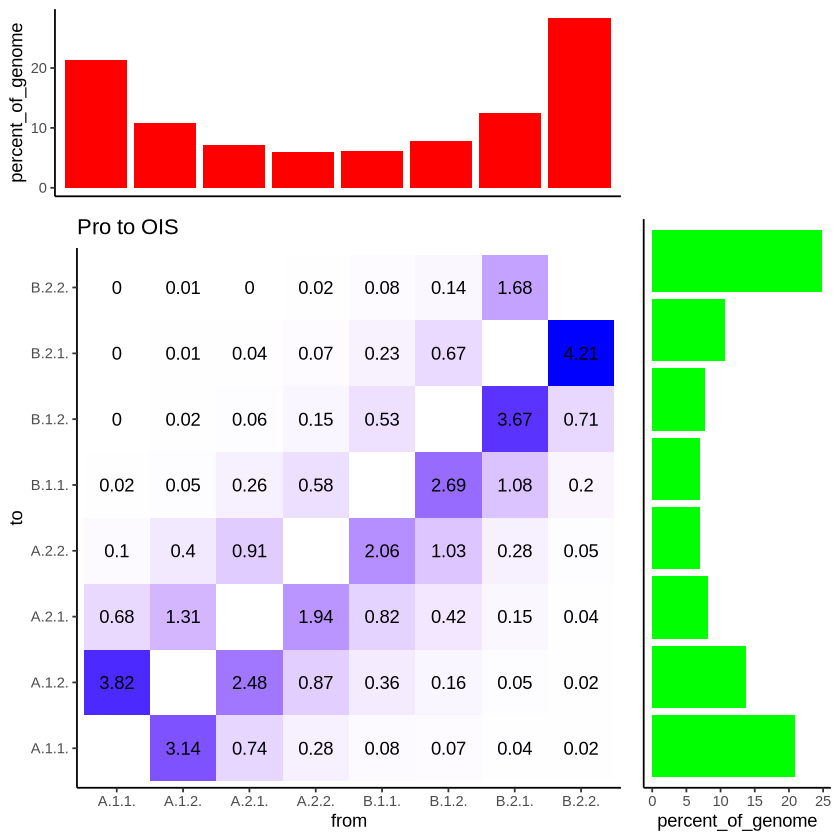

In [5]:
#subcompartments pro OIS (R) #######################################################################################################################################
grow_matches <- c(24145, 12217, 8180, 6707, 7038, 8804, 14201, 32267)
grow_matches <- grow_matches*100/sum(grow_matches)
RIS_matches <- c(23523, 15467, 9205, 7820, 7842, 8640, 11953, 27983)
RIS_matches <- RIS_matches*100/sum(RIS_matches)

grow_OIS_DF <- data.frame(grow = grow_matches,
                          RIS = RIS_matches)
chisq.test(t(grow_OIS_DF))

grow_sub_df <- data.frame(subcompartments = list_of_subcomp,
                         percent_of_genome = grow_matches)

RIS_sub_df <- data.frame(subcompartments = list_of_subcomp,
                          percent_of_genome = RIS_matches)

#switching plots update 5/31/23
switches_vector <- c('A.1.1._A.1.1.', 'A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
                     'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.',
                     'A.1.1._NA', 'A.1.2._A.1.1.', 'A.1.2._A.1.2.', 'A.1.2._A.2.1.',
                     'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.',
                     'A.1.2._B.2.2.', 'A.1.2._NA', 'A.2.1._A.1.1.', 'A.2.1._A.1.2.',
                     'A.2.1._A.2.1.', 'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.',
                     'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 'A.2.1._NA', 'A.2.2._A.1.1.',
                     'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._A.2.2.', 'A.2.2._B.1.1.',
                     'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 'A.2.2._NA',
                     'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
                     'B.1.1._B.1.1.', 'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.',
                     'B.1.1._NA', 'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.',
                     'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.1.2.', 'B.1.2._B.2.1.',
                     'B.1.2._B.2.2.', 'B.1.2._NA', 'B.2.1._A.1.1.', 'B.2.1._A.1.2.',
                     'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.',
                     'B.2.1._B.2.1.', 'B.2.1._B.2.2.', 'B.2.1._NA', 'B.2.2._A.1.1.',
                     'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.',
                     'B.2.2._B.1.2.', 'B.2.2._B.2.1.', 'B.2.2._B.2.2.', 'B.2.2._NA', 'NA_A.1.1.',
                     'NA_A.1.2.', 'NA_A.2.1.', 'NA_A.2.2.', 'NA_B.1.1.', 'NA_B.1.2.', 'NA_B.2.1.',
                     'NA_B.2.2.', 'NA_NA')

#add counts
grow_OIS_count_vector <- c(18174, 4634, 822, 127, 28, 6, 6, 3, 345, 3810, 6019, 1591, 487, 63, 19, 14, 7, 207, 893, 3000, 2677, 1107, 310, 78, 49, 4, 62, 334, 1059, 2356, 1907, 698, 187, 85, 23, 58, 100, 439, 988, 2499, 1893, 644, 284, 96, 95, 84, 188, 513, 1248, 3265, 2396, 806, 173, 131, 51, 62, 185, 334, 1312, 4444, 5587, 2038, 188, 26, 28, 53, 66, 248, 858, 5105, 25622, 261, 51, 38, 20, 45, 25, 8, 17, 17, 7406)
grow_OIS_count_vector <-grow_OIS_count_vector*100/sum(grow_OIS_count_vector)
matches <- grep('NA', switches_vector)
grow_OIS_switching_df <- data.frame(switches_grow_to_OIS = switches_vector[-matches],
                                   percent_of_genome = grow_OIS_count_vector[-matches])

#split into pro ois
grow_OIS_switching_df[c('from', 'to')] <- str_split_fixed(grow_OIS_switching_df$switches_grow_to_OIS, '_', 2)


grow_OIS_switching_df = grow_OIS_switching_df[!(grow_OIS_switching_df$from == grow_OIS_switching_df$to),] #remove matching rows (from/to)

#add num genes (for supp figure)
grow_OIS_switching_df$num_genes = c(3565,	902,	94,	38,	5,	10,	9,	2152,	1217,	409,	37,	18,	17,	2,	611,	1810,	613,	169,	44,	32,	3,	247,	705,	1539,	269,	128,	54,	18,	56,	283,	579,	1331,	257,	104,	50,	81,	119,	364,	798,	1718,	320,	101,	37,	55,	115,	206,	616,	2125,	799,	32,	35,	32,	63,	157,	381,	1856)
grow_OIS_heat_num_genes <- ggplot(grow_OIS_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes)) + geom_text(aes(label = round(num_genes,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to OIS") + theme(legend.position="bottom")

#add correct direction genes (for supp figure)
grow_OIS_switching_df$num_genes_de_right <- c(521,	118,	16,	8,	3,	1,	2,	308,	165,	50,	7,	1,	6,	0,	88,	239,	90,	26,	5,	6,	1,	45,	75,	164,	44,	18,	3,	4,	11,	34,	68,	118,	27,	12,	3,	12,	12,	54,	64,	141,	24,	8,	8,	13,	18,	18,	66,	119,	32,	6,	9,	5,	11,	12,	18,	101)
grow_OIS_heat_conc <- ggplot(grow_OIS_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_right)) + geom_text(aes(label = round(num_genes_de_right,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to OIS") + theme(legend.position="bottom")

#add incorrect direction genes (for supp figure)
grow_OIS_switching_df$num_genes_de_wrong <- c(483,	160,	11,	1,	0,	0,	1,	266,	131,	31,	3,	4,	1,	1,	61,	200,	52,	13,	6,	5,	0,	22,	76,	173,	25,	8,	5,	5,	8,	23,	75,	125,	22,	9,	5,	5,	6,	26,	59,	128,	9,	8,	3,	4,	11,	22,	32,	112,	21,	0,	5,	3,	8,	12,	14,	62)
grow_OIS_heat_disc <- ggplot(grow_OIS_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_wrong)) + geom_text(aes(label = round(num_genes_de_wrong,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to OIS") + theme(legend.position="bottom")

#grow_OIS_sub_switch_summary <- grow_OIS_switching_df %>%
#  group_by(to) %>%
#  summarise(across(num_genes_de, sum)) #combine_matching

#grow_OIS_sub_switch_summary_count <- pull(grow_OIS_sub_switch_summary, percent_of_genome)

grow_OIS_heat <- ggplot(grow_OIS_switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = percent_of_genome)) + geom_text(aes(label = round(percent_of_genome,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to OIS") + theme(legend.position="bottom")
#grow_OIS_heat   

grow_OIS_empty = grow_OIS_switching_df %>% 
  ggplot(aes(x = from, y = to)) +
  geom_blank() +
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        line = element_blank(),
        panel.background = element_blank())

grow_OIS_to_OIS <- ggplot(RIS_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("green")) + theme(legend.position="none") + coord_flip()
grow_OIS_from_grow <-  ggplot(grow_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("red")) + theme(legend.position="none")

ois_marg_heat <- ggarrange(
  grow_OIS_from_grow + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none") + theme(axis.title.x=element_blank(),
                                                                                             axis.text.x=element_blank(),
                                                                                             axis.ticks.x=element_blank()), 
  grow_OIS_empty, 
  grow_OIS_heat + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none"), 
  grow_OIS_to_OIS + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
    theme(axis.line = element_line(color = 'black')) + theme(legend.position="none") + theme(axis.title.y=element_blank(),
                                                                                             axis.text.y=element_blank(),
                                                                                             axis.ticks.y=element_blank()),
  nrow = 2, ncol = 2, widths = c(3, 1), heights = c(1, 3)
)

ois_marg_heat


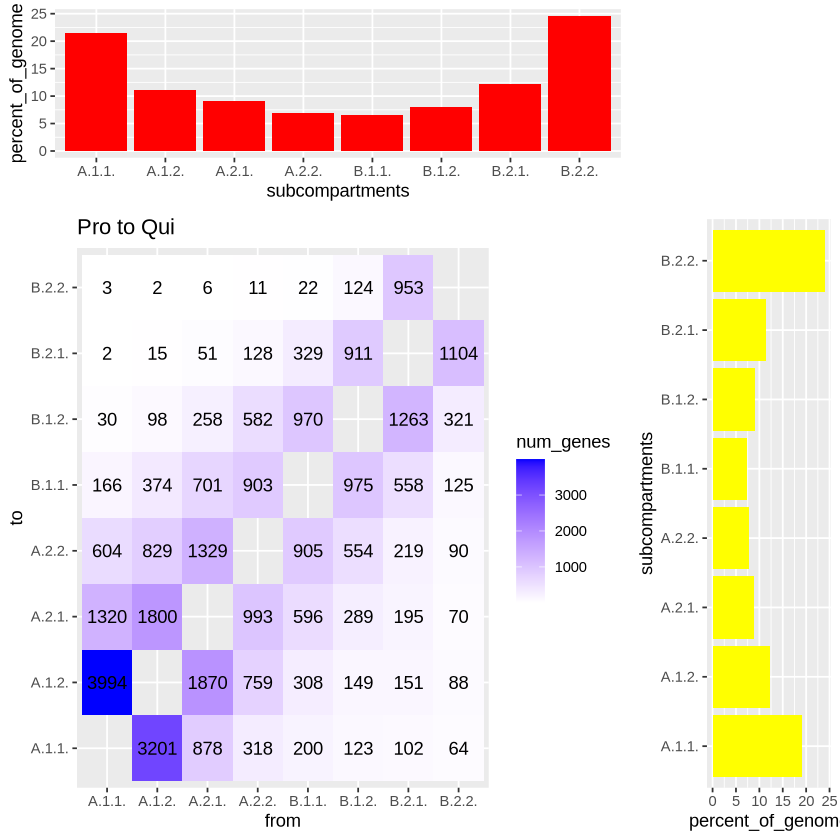

In [6]:
#subcompartments pro qui (R)#######################################################################################################################################
switches_vector <- c('A.1.1._A.1.1.', 'A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
                     'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.',
                     'A.1.1._NA', 'A.1.2._A.1.1.', 'A.1.2._A.1.2.', 'A.1.2._A.2.1.',
                     'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.',
                     'A.1.2._B.2.2.', 'A.1.2._NA', 'A.2.1._A.1.1.', 'A.2.1._A.1.2.',
                     'A.2.1._A.2.1.', 'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.',
                     'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 'A.2.1._NA', 'A.2.2._A.1.1.',
                     'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._A.2.2.', 'A.2.2._B.1.1.',
                     'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 'A.2.2._NA',
                     'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
                     'B.1.1._B.1.1.', 'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.',
                     'B.1.1._NA', 'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.',
                     'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.1.2.', 'B.1.2._B.2.1.',
                     'B.1.2._B.2.2.', 'B.1.2._NA', 'B.2.1._A.1.1.', 'B.2.1._A.1.2.',
                     'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.',
                     'B.2.1._B.2.1.', 'B.2.1._B.2.2.', 'B.2.1._NA', 'B.2.2._A.1.1.',
                     'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.',
                     'B.2.2._B.1.2.', 'B.2.2._B.2.1.', 'B.2.2._B.2.2.', 'B.2.2._NA', 'NA_A.1.1.',
                     'NA_A.1.2.', 'NA_A.2.1.', 'NA_A.2.2.', 'NA_B.1.1.', 'NA_B.1.2.', 'NA_B.2.1.',
                     'NA_B.2.2.', 'NA_NA')

pro_qui_count_vector <- c(15892, 5369, 1835, 976, 338, 48, 2, 2, 38, 3962, 4110, 2453, 1301, 679, 174, 51, 3, 17, 1163, 2648, 2819, 1949, 1157, 490, 108, 10, 11, 370, 1134, 1485, 1945, 1543, 1061, 294, 7, 0, 216, 387, 885, 1469, 1906, 1976, 611, 65, 4, 129, 195, 421, 795, 1654, 3321, 2222, 342, 14, 78, 155, 206, 324, 891, 2571, 6657, 2939, 11, 57, 69, 72, 129, 198, 522, 2991, 23975, 15, 0, 1, 8, 3, 1, 63, 58, 128, 7003)
pro_qui_count_vector <-pro_qui_count_vector*100/sum(pro_qui_count_vector)
matches <- grep('NA', switches_vector)
switching_df <- data.frame(switches_pro_to_qui = switches_vector[-matches],
                           percent_of_genome = pro_qui_count_vector[-matches])

switching_df[c('from', 'to')] <- str_split_fixed(switching_df$switches_pro_to_qui, '_', 2)

switching_df = switching_df[!(switching_df$from == switching_df$to),] #remove matching rows (from/to)

#number of genes
switching_df$num_genes = c(3994,	1320,	604,	166,	30,	2,	3,	3201,	1800,	829,	374,	98,	15,	2,	878,	1870,	1329,	701,	258,	51,	6,	318,	759,	993,	903,	582,	128,	11,	200,	308,	596,	905,	970,	329,	22,	123,	149,	289,	554,	975,	911,	124,	102,	151,	195,	219,	558,	1263,	953,	64,	88,	70,	90,	125,	321,	1104)
pro_qui_heat_num_genes <- ggplot(switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes)) + geom_text(aes(label = round(num_genes))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to Qui")

#correct direction genes
switching_df$num_genes_de_right = c(695,	159,	70,	19,	3,	1,	0,	833,	253,	104,	43,	8,	0,	0,	230,	411,	136,	86,	21,	3,	0,	81,	171,	177,	93,	44,	8,	0,	45,	63,	105,	169,	67,	27,	0,	37,	52,	52,	77,	116,	69,	2,	20,	38,	42,	36,	82,	113,	29,	18,	16,	10,	15,	18,	44,	91)
pro_qui_heat_conc <- ggplot(switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_right)) + geom_text(aes(label = round(num_genes_de_right))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to Qui")

#incorrect direction genes 
switching_df$num_genes_de_wrong = c(842,	238,	102,	32,	8,	0,	0,	482,	326,	171,	43,	13,	2,	0,	105,	248,	240,	102,	24,	4,	1,	26,	76,	111,	126,	59,	18,	2,	8,	36,	62,	106,	115,	22,	4,	18,	19,	15,	63,	73,	74,	16,	10,	14,	27,	21,	42,	73,	63,	8,	9,	6,	3,	8,	19,	60)
pro_qui_heat_disc <- ggplot(switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes_de_wrong)) + geom_text(aes(label = round(num_genes_de_wrong))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to Qui")


#pro_qui_sub_switch_summary <- switching_df %>%
#  group_by(to) %>%
#  summarise(across(num_genes_de, sum)) #combine_matching
#pro_qui_sub_switch_summary_count <- pull(pro_qui_sub_switch_summary, percent_of_genome)

pro_qui_heat <- ggplot(switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = percent_of_genome)) + geom_text(aes(label = round(percent_of_genome,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to Qui") + theme(legend.position="bottom")
pro_qui_heat <- ggplot(switching_df, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_genes)) + geom_text(aes(label = round(num_genes))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("Pro to Qui")

pro_qui_empty = switching_df %>% 
  ggplot(aes(x = from, y = to)) +
  geom_blank() +
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        line = element_blank(),
        panel.background = element_blank())

pro_qui_to_qui <- ggplot(qui_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("yellow")) + theme(legend.position="none") + coord_flip()
pro_qui_from_pro <-  ggplot(pro_sub_df, aes(x = subcompartments, y = percent_of_genome, fill = 'subcompartments')) + geom_bar(stat = "identity", position = "dodge") + scale_fill_manual(values = c("red")) + theme(legend.position="none")

qui_marg_heat <- ggarrange(
  pro_qui_from_pro, pro_qui_empty, pro_qui_heat, pro_qui_to_qui,
  nrow = 2, ncol = 2, widths = c(3, 1), heights = c(1, 3)
)

qui_marg_heat



In [2]:
#Figures 3B/D are custom in adobe from GO analysis

#here is how i got the lists...

#identify the subcompartment switches (bash)
mkdir hic_paper_analysis/subcompartment_analysis/switch_files/

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
grep -w $line hic_paper_analysis/subcompartment_analysis/narita_pro_OIS_calder2.txt >> hic_paper_analysis/subcompartment_analysis/switch_files/${line}_narita_pro_OIS.txt
grep -w $line hic_paper_analysis/subcompartment_analysis/pro_sen_calder2.txt >> hic_paper_analysis/subcompartment_analysis/switch_files/${line}_pro_sen.txt
done


In [3]:
#determine those unique to RS/OIS (bash)
module load bedtools2
mkdir hic_paper_analysis/subcompartment_analysis/multiinter/

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
bedtools multiinter -i hic_paper_analysis/subcompartment_analysis/switch_files/${line}_narita_pro_OIS.txt hic_paper_analysis/subcompartment_analysis/switch_files/${line}_pro_sen.txt -header > hic_paper_analysis/subcompartment_analysis/multiinter/${line}_multiinter.txt 
done

mkdir hic_paper_analysis/subcompartment_analysis/unique/

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
awk '{if($4==1 && $6==1)print$0}' hic_paper_analysis/subcompartment_analysis/multiinter/${line}_multiinter.txt >> hic_paper_analysis/subcompartment_analysis/unique/${line}_narita_pro_OIS_unique.txt
awk '{if($4==1 && $7==1)print$0}' hic_paper_analysis/subcompartment_analysis/multiinter/${line}_multiinter.txt >> hic_paper_analysis/subcompartment_analysis/unique/${line}_pro_sen_unique.txt
done


In [5]:
#intersect with gtf (bash)

module load bedtools2

mkdir hic_paper_analysis/subcompartment_analysis/gtf_unique/

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
bedtools intersect -wa -wb -a hic_paper_analysis/subcompartment_analysis/unique/${line}_narita_pro_OIS_unique.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($10=="gene")print$17}' | tr -d \" | tr -d \; | awk '{split($1,a,".");print a[1]}'| sort | uniq > hic_paper_analysis/subcompartment_analysis/gtf_unique/${line}_narita_pro_OIS_unique_gtf.txt
bedtools intersect -wa -wb -a hic_paper_analysis/subcompartment_analysis/unique/${line}_pro_sen_unique.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($10=="gene")print$17}' | tr -d \" | tr -d \; | awk '{split($1,a,".");print a[1]}'| sort | uniq > hic_paper_analysis/subcompartment_analysis/gtf_unique/${line}_pro_sen_unique_gtf.txt
done


***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "

In [6]:
#intersect with discordant direction of rna (pro sen) (bash)
rna=("down" "down" "down" "down" "down" "down" "down" "up" \
"down" "down" "down" "down" "down" "down" "up" "up" \
"down" "down" "down" "down" "down" "up" "up" "up" \
"down" "down" "down" "down" "up" "up" "up" "up" \
"down" "down" "down" "up" "up" "up" "up" "up" \
"down" "down" "up" "up" "up" "up" "up" "up" \
"down" "up" "up" "up" "up" "up" "up" "up" )

mkdir hic_paper_analysis/subcompartment_analysis/discordant_rna/

c=0

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
switch=$line
cat hic_paper_analysis/subcompartment_analysis/gtf_unique/${switch}_pro_sen_unique_gtf.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_${rna[$c]}_v_sen.txt >> hic_paper_analysis/subcompartment_analysis/discordant_rna/${switch}_pro_sen_unique_gtf_${rna[$c]}.txt
done
c=$((c+1))
done


#intersect with concordant direction of rna 

mkdir hic_paper_analysis/subcompartment_analysis/concordant_rna/

f() { rna=("${BASH_ARGV[@]}"); }

shopt -s extdebug
f "${rna[@]}"
shopt -u extdebug

c=0
cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
switch=$line
cat hic_paper_analysis/subcompartment_analysis/gtf_unique/${switch}_pro_sen_unique_gtf.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_${rna[$c]}_v_sen.txt >> hic_paper_analysis/subcompartment_analysis/concordant_rna/${switch}_pro_sen_unique_gtf_${rna[$c]}.txt
done
c=$((c+1))
done

mkdir: cannot create directory ‘hic_paper_analysis/subcompartment_analysis/discordant_rna/’: File exists
mkdir: cannot create directory ‘hic_paper_analysis/subcompartment_analysis/concordant_rna/’: File exists


In [7]:
#intersect with concordant direction of rna (OIS) (bash)
rna=("down" "down" "down" "down" "down" "down" "down" "up" \
"down" "down" "down" "down" "down" "down" "up" "up" \
"down" "down" "down" "down" "down" "up" "up" "up" \
"down" "down" "down" "down" "up" "up" "up" "up" \
"down" "down" "down" "up" "up" "up" "up" "up" \
"down" "down" "up" "up" "up" "up" "up" "up" \
"down" "up" "up" "up" "up" "up" "up" "up" )

mkdir hic_paper_analysis/subcompartment_analysis/concordant_rna/

c=0

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
switch=$line
cat hic_paper_analysis/subcompartment_analysis/gtf_unique/${switch}_narita_pro_OIS_unique_gtf.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/OIS_${rna[$c]}.txt >> hic_paper_analysis/subcompartment_analysis/concordant_rna/${switch}_narita_pro_OIS_unique_gtf_${rna[$c]}.txt
done
c=$((c+1))
done

#intersect with discordant direction of rna (OIS)
f() { rna=("${BASH_ARGV[@]}"); }

shopt -s extdebug
f "${rna[@]}"
shopt -u extdebug

c=0

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
switch=$line
cat hic_paper_analysis/subcompartment_analysis/gtf_unique/${switch}_narita_pro_OIS_unique_gtf.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/OIS_${rna[$c]}.txt >> hic_paper_analysis/subcompartment_analysis/discordant_rna/${switch}_narita_pro_OIS_unique_gtf_${rna[$c]}.txt
done
c=$((c+1))
done

mkdir: cannot create directory ‘hic_paper_analysis/subcompartment_analysis/concordant_rna/’: File exists


In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)

#pro RS switches (R)
switches_to_loop_through <- c('A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
                              'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.',
                              'A.1.2._A.1.1.', 'A.1.2._A.2.1.',
                              'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.',
                              'A.1.2._B.2.2.', 'A.2.1._A.1.1.', 'A.2.1._A.1.2.',
                              'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.',
                              'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 'A.2.2._A.1.1.',
                              'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._B.1.1.',
                              'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 
                              'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
                              'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.',
                              'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.',
                              'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.2.1.',
                              'B.1.2._B.2.2.',  'B.2.1._A.1.1.', 'B.2.1._A.1.2.',
                              'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.',
                              'B.2.1._B.2.2.', 'B.2.2._A.1.1.',
                              'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.',
                              'B.2.2._B.1.2.', 'B.2.2._B.2.1.')

up_down_array<-rev(c('down', 'down', 'down', 'down', 'down', 'down', 'down', 'up', 'down', 'down', 'down', 'down', 
                 'down', 'down', 'up', 'up', 'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'up', 
                 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 
                 'up', 'up', 'up', 'up', 'up', 'up', 'up'))
counter <- 1

for(switch in switches_to_loop_through){
  
  print(switch)
  
  file_name = paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_pro_sen_unique_gtf_', up_down_array[counter], '.txt', sep = '')

  print(file.info(file_name)$size > 0)
  if (file.info(file_name)$size > 0){
    gene_list <- read.table(file_name)
    
    entrez = mapIds(org.Hs.eg.db,
                    keys=gene_list$V1, #Column containing Ensembl gene ids
                    column="ENTREZID",
                    keytype="ENSEMBL",
                    multiVals="first")
    
    ego <- enrichGO(gene          = entrez,
                    OrgDb         = org.Hs.eg.db,
                    ont           = "ALL",
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 0.05,
                    qvalueCutoff  = 0.05,
                    readable      = TRUE)
    if (dim(ego@result)[1] == 0){
      counter = counter + 1
    } 
    else {
      tiff(paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_pro_sen_unique_gtf_', up_down_array[counter], '_barplot.tiff', sep = ''), units = 'in', width=6, height=12, res=300)
      bar <- dotplot(ego, showCategory=5) 
      print(bar)
      dev.off()
      tiff(paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_pro_sen_unique_gtf_', up_down_array[counter], '_heat.tiff', sep = ''), units = 'in', width=6, height=12, res=300) 
      heat <- heatplot(ego, showCategory=5)
      print(heat)
      dev.off()
      counter = counter + 1
    }
  }
  else{
    counter = counter + 1
  }
}



clusterProfiler v4.8.3  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

[1] "A.1.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.1._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.2._A.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.2._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.2._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.2._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.2._A.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.2._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._B.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.2._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._A.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._B.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._B.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._B.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._B.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.1._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._B.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._B.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.2._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._A.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



In [6]:
#pro OIS sub (R)

library(clusterProfiler)
library(org.Hs.eg.db)

#pro OIS switches
switches_to_loop_through <- c('A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.',
                              'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.',
                              'A.1.2._A.1.1.', 'A.1.2._A.2.1.',
                              'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.',
                              'A.1.2._B.2.2.', 'A.2.1._A.1.1.', 'A.2.1._A.1.2.',
                              'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.',
                              'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 'A.2.2._A.1.1.',
                              'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._B.1.1.',
                              'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 
                              'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.',
                              'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.',
                              'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.',
                              'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.2.1.',
                              'B.1.2._B.2.2.',  'B.2.1._A.1.1.', 'B.2.1._A.1.2.',
                              'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.',
                              'B.2.1._B.2.2.', 'B.2.2._A.1.1.',
                              'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.',
                              'B.2.2._B.1.2.', 'B.2.2._B.2.1.')

up_down_array<-c('down', 'down', 'down', 'down', 'down', 'down', 'down', 'up', 'down', 'down', 'down', 'down', 
                 'down', 'down', 'up', 'up', 'down', 'down', 'down', 'down', 'down', 'up', 'up', 'up', 'down', 'down', 'down', 'down', 'up', 
                 'up', 'up', 'up', 'down', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'down', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 
                 'up', 'up', 'up', 'up', 'up', 'up', 'up')
counter <- 1

for(switch in switches_to_loop_through){
  
  print(switch)
  
  file_name = paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_narita_pro_OIS_unique_gtf_', up_down_array[counter], '.txt', sep = '')

  print(file.info(file_name)$size > 0)
  if (file.info(file_name)$size > 0){
    gene_list <- read.table(file_name)
    
    entrez = mapIds(org.Hs.eg.db,
                    keys=gene_list$V1, #Column containing Ensembl gene ids
                    column="ENTREZID",
                    keytype="ENSEMBL",
                    multiVals="first")
    
    ego <- enrichGO(gene          = entrez,
                    OrgDb         = org.Hs.eg.db,
                    ont           = "ALL",
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 0.05,
                    qvalueCutoff  = 0.05,
                    readable      = TRUE)
    if (dim(ego@result)[1] == 0){
      counter = counter + 1
    } 
    else {
      tiff(paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_narita_pro_OIS_unique_gtf_', up_down_array[counter], '_barplot.tiff', sep = ''), units = 'in', width=6, height=12, res=300)
      bar <- dotplot(ego, showCategory=5) 
      print(bar)
      dev.off()
      tiff(paste('hic_paper_analysis/subcompartment_analysis/concordant_rna/', switch, '_narita_pro_OIS_unique_gtf_', up_down_array[counter], '_heat.tiff', sep = ''), units = 'in', width=6, height=12, res=300) 
      heat <- heatplot(ego, showCategory=5)
      print(heat)
      dev.off()
      counter = counter + 1
    }
  }
  else{
    counter = counter + 1
  }
}

[1] "A.1.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.1._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.1._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.1.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.1.2._B.2.2."
[1] FALSE
[1] "A.2.1._A.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "A.2.1._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.1._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._A.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._B.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "A.2.2._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._A.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._A.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._A.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.1._B.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.1._B.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.1.2._B.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.1.2._B.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.1._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.1._A.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.1._A.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.1._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._B.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.1._B.2.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.2._A.1.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._A.1.2."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.2._A.2.1."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._A.2.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._B.1.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



[1] "B.2.2._B.1.2."
[1] TRUE


'select()' returned 1:1 mapping between keys and columns



[1] "B.2.2._B.2.1."
[1] TRUE


'select()' returned 1:many mapping between keys and columns



In [4]:
#combine for SASP analysis - bash

cat hic_paper_analysis/subcompartment_analysis/concordant_rna/*pro_sen_unique_gtf_down.txt > hic_paper_analysis/subcompartment_analysis/concordant_rna/all_pro_sen_unique_gtf_all_up.txt
cat hic_paper_analysis/subcompartment_analysis/concordant_rna/*narita_pro_OIS_unique_gtf_up.txt > hic_paper_analysis/subcompartment_analysis/concordant_rna/all_narita_pro_OIS_unique_gtf_all_up.txt


In [2]:
#sasp overlap analysis (python)

def find_overlap_unique_2(file1, file2):

    set1 = set(line.strip() for line in open(file1))
    set2 = set(line.strip() for line in open(file2))
    unique_set1 = set1-set2
    unique_set2 = set2-set1
    shared = set1 & set2
    print('unique to first set:')
    print(len(unique_set1))
    print('unique to second set:')
    print(len(unique_set2))
    print('shared:')
    print(len(shared))
    return unique_set1, unique_set2, shared

#RS
rs_sub_unique, rs_sasp_unique, rs_sub_sasp_shared = find_overlap_unique_2('hic_paper_analysis/subcompartment_analysis/concordant_rna/all_pro_sen_unique_gtf_all_up.txt', 'hic_paper_analysis/SASP/sasp_rs_up.txt')

#OIS
ois_sub_unique, ois_sasp_unique, ois_sub_sasp_shared = find_overlap_unique_2('hic_paper_analysis/subcompartment_analysis/concordant_rna/all_narita_pro_OIS_unique_gtf_all_up.txt', 'hic_paper_analysis/SASP/sasp_ois_up.txt')


unique to first set:
2408
unique to second set:
324
shared:
156
unique to first set:
1526
unique to second set:
243
shared:
99



	Fisher's Exact Test for Count Data

data:  rbind(c(156, 2408), c(324, 59432 - (156 + 2408 + 324)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 9.537981      Inf
sample estimates:
odds ratio 
  11.30464 


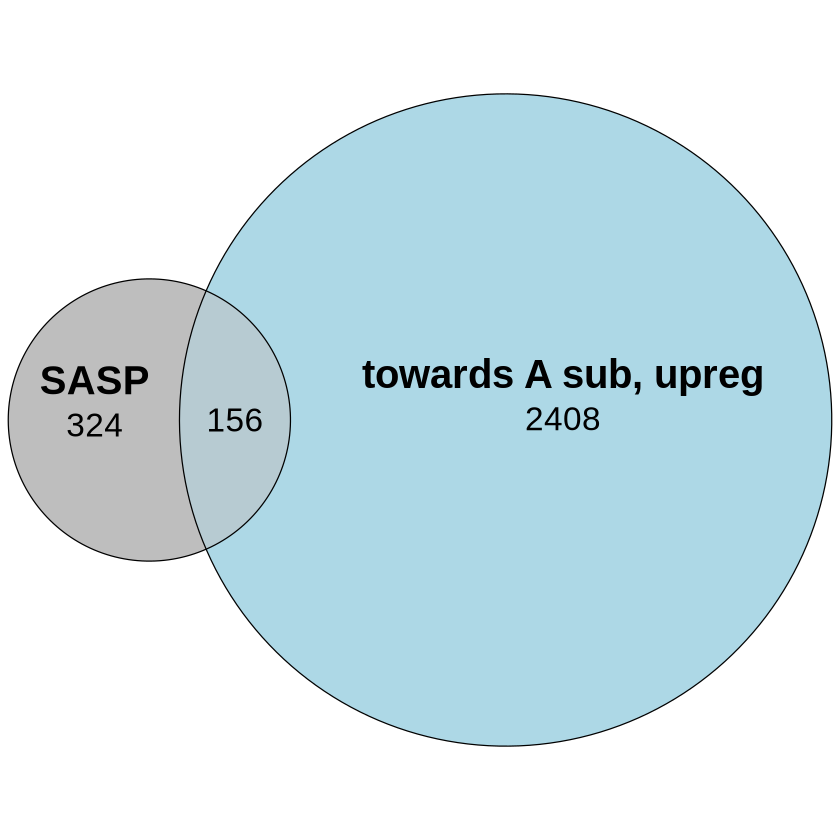


	Fisher's Exact Test for Count Data

data:  rbind(c(99, 1526), c(243, 59432 - (99 + 1526 + 243)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 12.45512      Inf
sample estimates:
odds ratio 
  15.36154 


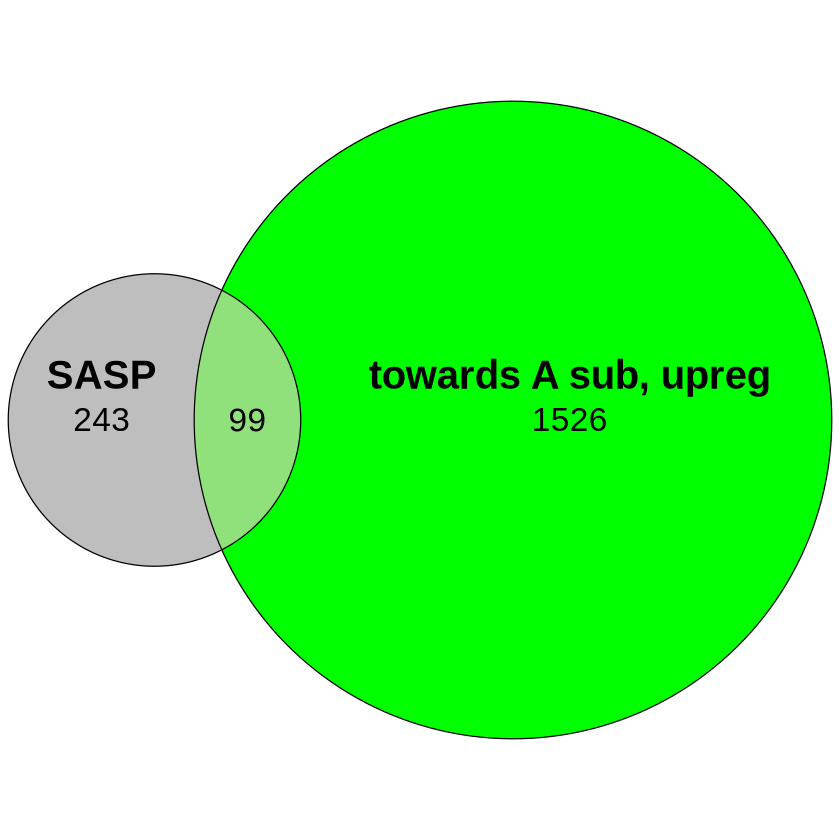

In [1]:
#venn diagram subcompartments (R)

library(eulerr)

#RS
rs_sasp <- euler(c(
  "SASP" = 324,
  "towards A sub, upreg" = 2408,
  "SASP&towards A sub, upreg" = 156
))

plot(
  rs_sasp,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "lightblue")
)

fisher.test(rbind(c(156,2408),c(324,59432 - (156+2408+324))), alternative = "greater")

#OIS
ois_sasp <- euler(c(
  "SASP" = 243,
  "towards A sub, upreg" = 1526,
  "SASP&towards A sub, upreg" = 99
))

plot(
  ois_sasp,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "green")
)

fisher.test(rbind(c(99,1526),c(243,59432 - (99+1526+243))), alternative = "greater")

Figure 4 (loops)

In [1]:
#loop comparison script (python)
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

def compare_loops(loop_file_list, loop_name_list, color_dictionary, tolerance, html_name, output_name):

    #read in and compare files
    for loop_file_idx in range(0,len(loop_file_list)):

        #if its the first np initialize the array
        if loop_file_idx == 0:
            overall_np = np.genfromtxt(loop_file_list[loop_file_idx], dtype = np.dtype('U100'))
            overall_np_to_add = np.zeros([len(overall_np),1], dtype = int)
            overall_np_to_add = overall_np_to_add.astype(str)
            overall_np = np.append(overall_np, overall_np_to_add,1)
            for row in overall_np:
                row[24] = loop_name_list[0]

        #otherwise create a np to append to the overall array
        else:
            to_add_to = np.genfromtxt(loop_file_list[loop_file_idx], dtype = str)
            to_add = np.zeros([len(to_add_to),1], dtype = int)
            to_add = to_add.astype(str)
            to_add_to = np.append(to_add_to, to_add, 1)
            for row in to_add_to:
                row[24] = loop_name_list[loop_file_idx]
            overall_np = np.append(overall_np, to_add_to, 0) #append to overall array

    #now we have overall_np labeled with condition 

    #add column for indices and PQS label
    overall_np_additional_col = np.zeros((overall_np.shape[0], 2), dtype = str)
    overall_np = np.append(overall_np, overall_np_additional_col, axis = 1)

    #edges list initialization
    edges_list = np.zeros((1,2), dtype = int)
    is_first_entry = 1

    #now loop through and compare to itself
    for overall_np_idx_1 in range(0, len(overall_np)):

        for overall_np_idx_2 in range(0, len(overall_np)):

            #ensure same chromosome for comparison
            if overall_np[overall_np_idx_1][0] == overall_np[overall_np_idx_2][0]:

                #compare to see if its within tolerance at both anchors; add to edges list if it is
                if int(overall_np[overall_np_idx_2][1]) <= int(overall_np[overall_np_idx_1][1]) + tolerance and \
                int(overall_np[overall_np_idx_2][1]) >= int(overall_np[overall_np_idx_1][1]) - tolerance and \
                int(overall_np[overall_np_idx_2][2]) <= int(overall_np[overall_np_idx_1][2]) + tolerance and \
                int(overall_np[overall_np_idx_2][2]) >= int(overall_np[overall_np_idx_1][2]) -tolerance and \
                int(overall_np[overall_np_idx_2][4]) <= int(overall_np[overall_np_idx_1][4]) + tolerance and \
                int(overall_np[overall_np_idx_2][4]) >= int(overall_np[overall_np_idx_1][4]) -tolerance and \
                int(overall_np[overall_np_idx_2][5]) <= int(overall_np[overall_np_idx_1][5]) + tolerance and \
                int(overall_np[overall_np_idx_2][5]) >= int(overall_np[overall_np_idx_1][5]) -tolerance:

                    #add label to column
                    overall_np[overall_np_idx_1, 25] = overall_np[overall_np_idx_1,25] + overall_np[overall_np_idx_2,24]

                    #add index to column 
                    if len(overall_np[overall_np_idx_1,26]) < 1:
                        overall_np[overall_np_idx_1, 26] = str(overall_np_idx_2)
                    else:
                        overall_np[overall_np_idx_1, 26] = overall_np[overall_np_idx_1, 26] + ',' + str(overall_np_idx_2)

                    #determine if its the same loop (same idx)
                    if not overall_np_idx_1 == overall_np_idx_2:

                        #if edges list is one line long replace initialization first line
                        if is_first_entry == 1:
                            edges_list[0,0] = overall_np_idx_1
                            edges_list[0,1] = overall_np_idx_2
                            is_first_entry = 0

                        #otherwise add to the edges list
                        else:
                            edges_list = np.append(edges_list, [[overall_np_idx_1, overall_np_idx_2]], axis = 0)

    #remove duplicates from label column
    for overall_np_idx_1 in range(0, len(overall_np)):
        overall_np[overall_np_idx_1,25] = ''.join(sorted(set(overall_np[overall_np_idx_1,25]), key = overall_np[overall_np_idx_1, 25].index))

    #visualize
    G = nx.Graph()
    G.add_edges_from(edges_list)
    nodes = np.arange(overall_np.shape[0])
    G.add_nodes_from(nodes)
    color_key = overall_np[:,25]
    colors = []
    for color in color_key:
        if color in color_dictionary:
            value = color_dictionary[color]
            colors.append(value)
        else:
            print(f"{color} does not exist in the color dictionary.")

    fig = go.Figure()

    #add nodes
    pos = nx.spring_layout(G)
    for node in nodes:
        x,y = pos[node]
        fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=10, color = colors[node]), text = str(node)))

    #add edges
    for edge in edges_list:
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        fig.add_trace(go.Scatter(x=[x0,x1], y=[y0,y1], mode = 'lines', line = dict(width = 2)))

    #customize layout and appearance
    fig.update_layout(title = 'NetworkX Graph in Plotly',
                      showlegend = False,
                      xaxis = dict(showline = False, showgrid = False, zeroline = False),
                      yaxis = dict(showline = False, showgrid = False, zeroline = False))

    #show the graph
    fig.write_html(html_name)

    #find common loops and reduce to remove all but the largest
    rows_to_remove = []
    for overall_np_idx_1 in range(0,len(overall_np)):
        idx_list = overall_np[overall_np_idx_1,26].split(',')
        if len(idx_list) > 1:
            idx_list = overall_np[overall_np_idx_1,26].split(',')
            size_list = []
            for item in idx_list:
                size_list.append(int(overall_np[int(item),5]) - int(overall_np[int(item),1]))
            size_list_max_idx = size_list.index(max(size_list))
            smaller_loop_idx = idx_list[:size_list_max_idx] + idx_list[size_list_max_idx + 1:]
            for smaller_loop in smaller_loop_idx:
                rows_to_remove.append(int(smaller_loop))
    overall_np = np.delete(overall_np, rows_to_remove, axis = 0)

    #save output
    np.savetxt(output_name, overall_np, delimiter = '\t', fmt='%s') 

    #print(nodes)
    #print(edges_list)
                
#compare_loops(['loop_analysis/mock_testing/mock1.bedpe.txt', 'loop_analysis/mock_testing/mock2.bedpe', 'loop_analysis/mock_testing/mock3.bedpe.txt'],
#              ['P', 'Q', 'S'], {'P':'red', 'Q':'yellow', 'S':'blue', 'PS':'purple', 'QS':'green', 'PQ':'orange', 'PQS':'black'},
#              30000, 'loop_analysis/mock_testing/240514_mock_output.html', 'loop_analysis/mock_testing/240514_mock_output.txt')                

In [3]:
#thresholding (chromosome 21 test 10 kb --> 100 kb) (python)
for threshold in range(10000, 30000,10000):#110000, 10000):
    compare_loops(['hic_paper_analysis/loop_analysis/thresholding/pro_chr21.bedpe', 'hic_paper_analysis/loop_analysis/thresholding/qui_chr21.bedpe', 'hic_paper_analysis/loop_analysis/thresholding/sen_chr21.bedpe'],
              ['P', 'Q', 'S'], {'P':'red', 'Q':'yellow', 'S':'blue', 'PS':'purple', 'QS':'green', 'PQ':'orange', 'PQS':'black'},
              threshold, 'hic_paper_analysis/loop_analysis/thresholding/240514_thredholding_' + str(int(threshold/1000)) + 'kb.html', 'hic_paper_analysis/loop_analysis/thresholding/240514_thresholding_' + str(int(threshold/1000)) + 'kb.txt')  

In [ ]:
#comparison of pro and sen (python)
compare_loops(['hic_paper_analysis/loop_analysis/pro_merged_loops.bedpe', 'hic_paper_analysis/loop_analysis/sen_merged_loops.bedpe'],
              ['P', 'S'], {'P':'red', 'S':'blue', 'PS':'purple'},
              30000, 'hic_paper_analysis/loop_analysis/240514_pro_sen_loops_30kb.html', 'hic_paper_analysis/loop_analysis/240514_pro_sen_loops_30kb.txt')

In [2]:
#isolate p/s/ps loops / separate into lenient and stringent / intersect with genes (bash)

#separate into P/PS/S
awk '{if($26=="P")print$0}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb.txt > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only.txt
awk '{if($26=="PS")print$0}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb.txt > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only.txt
awk '{if($26=="S")print$0}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb.txt > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only.txt

#turn into sorted by
awk '{print"chr"$1"\t"$2"\t"$6"\t"$26"\t"$27}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only.txt | sort -k 1,1 -k2,2n   > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only_sorted.bed
awk '{print"chr"$1"\t"$2"\t"$6"\t"$26"\t"$27}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only.txt | sort -k 1,1 -k2,2n   > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only_sorted.bed
awk '{print"chr"$1"\t"$2"\t"$6"\t"$26"\t"$27}' hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only.txt  | sort -k 1,1 -k2,2n  > hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only_sorted.bed

#lenient v stringent
mkdir hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/
mkdir hic_paper_analysis/loop_analysis/pro_v_sen/lenient/
mkdir hic_paper_analysis/loop_analysis/pro_v_sen/stringent/

module load bedtools2

bedtools multiinter -names P PS S \
-i hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only_sorted.bed \
hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only_sorted.bed \
hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only_sorted.bed > hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/pro_sen_30kb_multiinter.bed

#lenient
awk '{if($5=="PS")print$0}' hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/pro_sen_30kb_multiinter.bed > hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops.txt
awk '{if($5!="PS")print$0}' hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/pro_sen_30kb_multiinter.bed > hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops.txt

#stringent
awk '/PS/ {print > "'"hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops.txt"'"} !/PS/ {print > "'"hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops.txt"'"}' "hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/pro_sen_30kb_multiinter.bed"

#intersect lenient with genes
bedtools intersect -wa -wb -F .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($11=="gene")print$18}' | tr -d \" | tr -d \; | awk '{split($1, a, "."); print a[1]}' | sort | uniq > hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops_genes_majority_overlap.txt
bedtools intersect -wa -wb -F .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($11=="gene")print$18}' | tr -d \" | tr -d \; | awk '{split($1, a, "."); print a[1]}' | sort | uniq > hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap.txt

#intersect stringent with genes
bedtools intersect -wa -wb -F .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($11=="gene")print$18}' | tr -d \" | tr -d \; | awk '{split($1, a, "."); print a[1]}' | sort | uniq > hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops_genes_majority_overlap.txt
bedtools intersect -wa -wb -F .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops.txt -b hic_paper_analysis/rna/ENCFF159KBI.gtf | awk '{if($11=="gene")print$18}' | tr -d \" | tr -d \; | awk '{split($1, a, "."); print a[1]}' | sort | uniq > hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap.txt

#intersect with lenient with up and down
cat hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops_genes_majority_overlap.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_up_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops_genes_majority_overlap_down.txt
grep -wo $line hic_paper_analysis/rna/pro_down_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/lenient/same_loops_genes_majority_overlap_up.txt
done

cat hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_up_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_down.txt
grep -wo $line hic_paper_analysis/rna/pro_down_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_up.txt
done

#intersect with stringent with up and down
cat hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops_genes_majority_overlap.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_up_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops_genes_majority_overlap_down.txt
grep -wo $line hic_paper_analysis/rna/pro_down_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/stringent/same_loops_genes_majority_overlap_up.txt
done

cat hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap.txt | while read line
do
grep -wo $line hic_paper_analysis/rna/pro_up_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_down.txt
grep -wo $line hic_paper_analysis/rna/pro_down_v_sen.txt >> hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_up.txt
done


mkdir: cannot create directory ‘hic_paper_analysis/loop_analysis/pro_v_sen/multiinter/’: File exists
mkdir: cannot create directory ‘hic_paper_analysis/loop_analysis/pro_v_sen/lenient/’: File exists
mkdir: cannot create directory ‘hic_paper_analysis/loop_analysis/pro_v_sen/stringent/’: File exists
***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has inconsistent naming convention for record:
ERCC-00002	spikein	exon	1	1061	.	+	.	gene_id "gSpikein_ERCC-00002"; transcript_id "tSpikein_ERCC-00002";

***** WARNING: File hic_paper_analysis/rna/ENCFF159KBI.gtf has in

: 1

In [3]:
#determine number of loops for eulerr venn (bash)
wc -l hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only.txt
wc -l hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only.txt 
wc -l hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only.txt

1536 hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only.txt
7643 hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only.txt
8930 hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only.txt


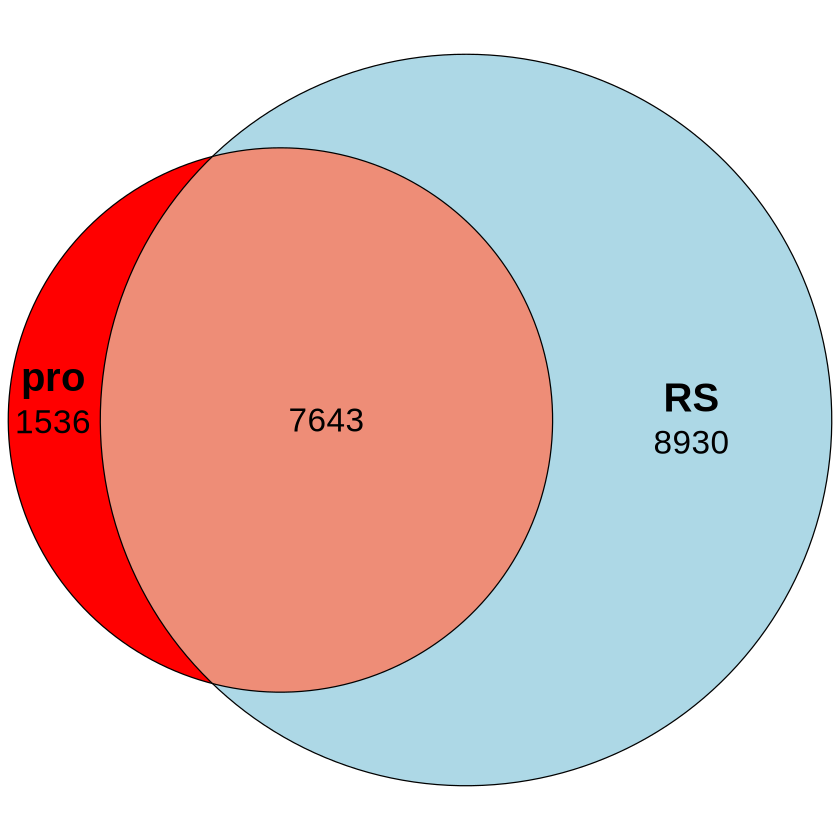

In [1]:
#make eulerr venn (R)
library(eulerr)

#pro and sen overlap
pro_sen_loop <- euler(c(
  "pro" = 1536,
  "RS" = 8930,
  "pro&RS" = 7643
))

plot(
  pro_sen_loop,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("red", "lightblue")
)



clusterProfiler v4.8.3  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

[1] "hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_down.txt"


'select()' returned 1:many mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



[1] "hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_up.txt"


'select()' returned 1:many mapping between keys and columns



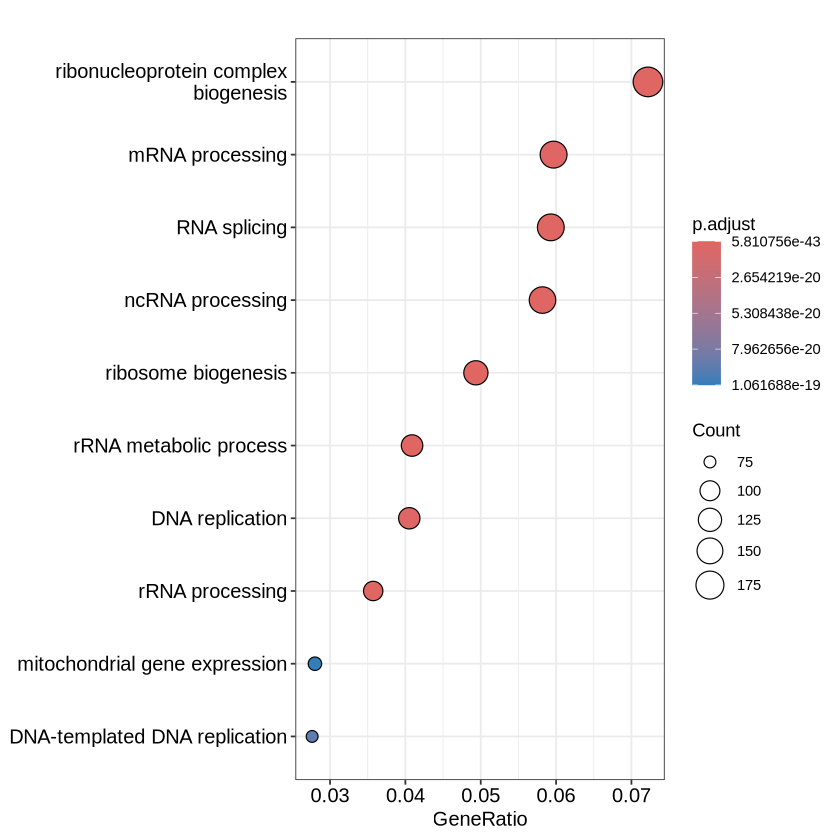

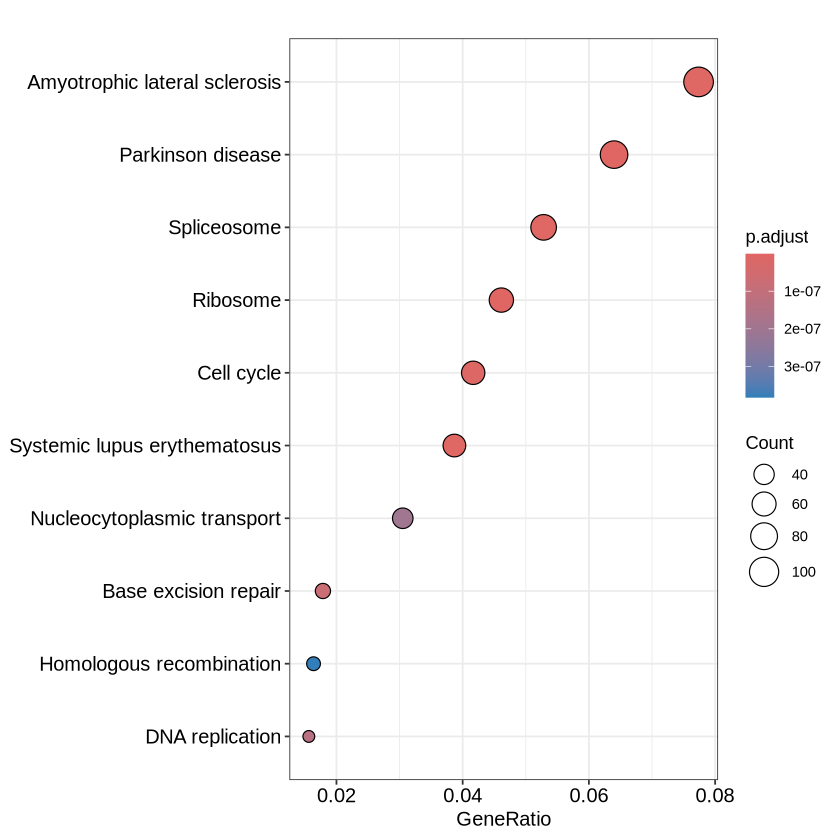

[1] "hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_down.txt"


'select()' returned 1:many mapping between keys and columns



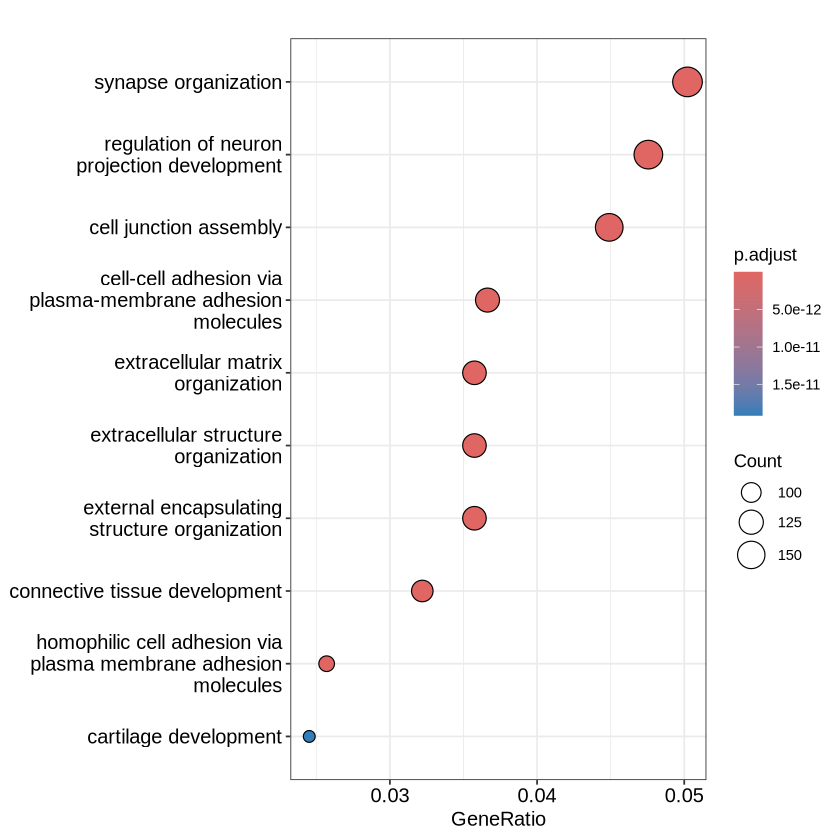

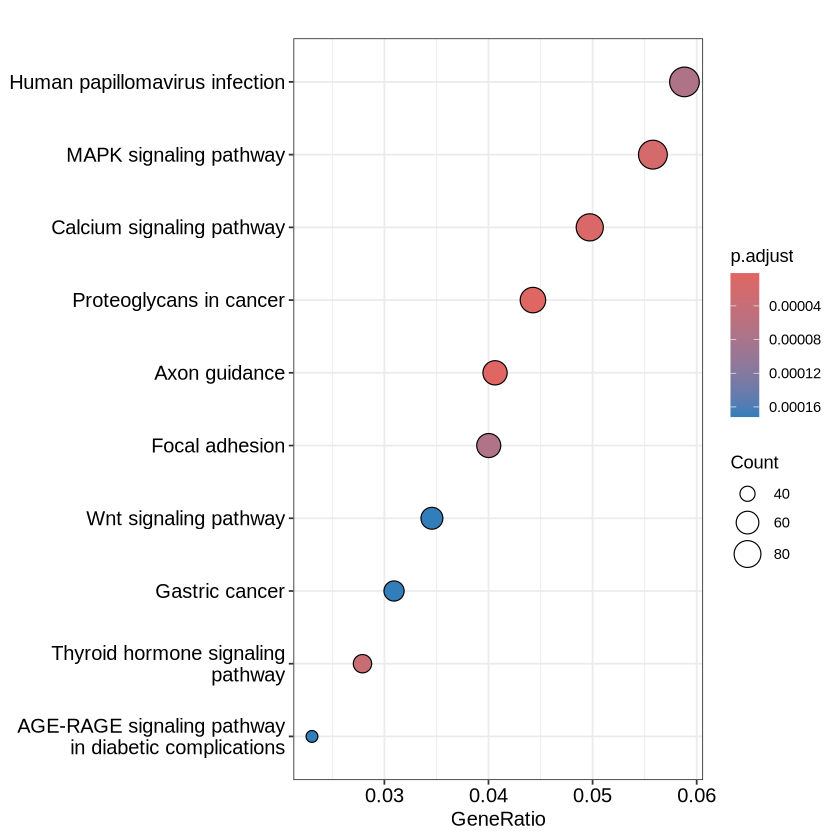

[1] "hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_up.txt"


'select()' returned 1:many mapping between keys and columns



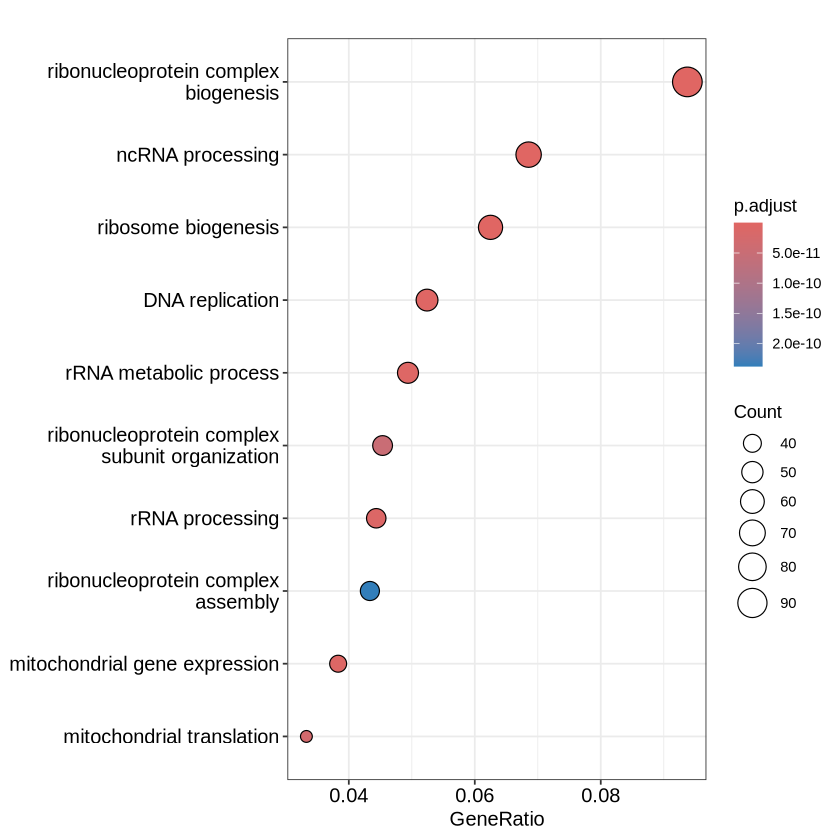

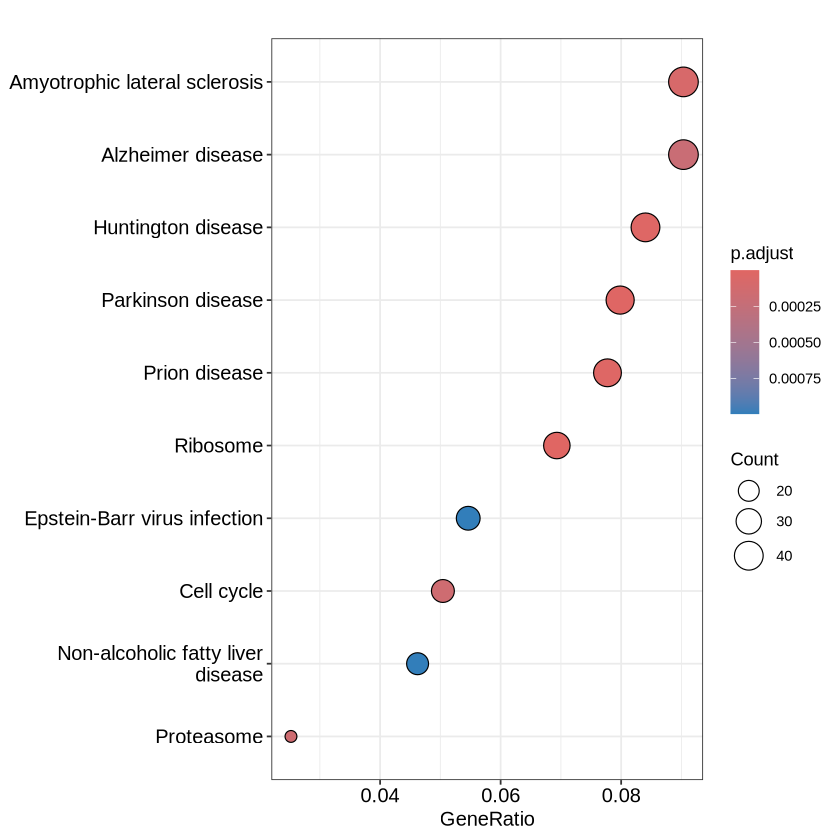

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


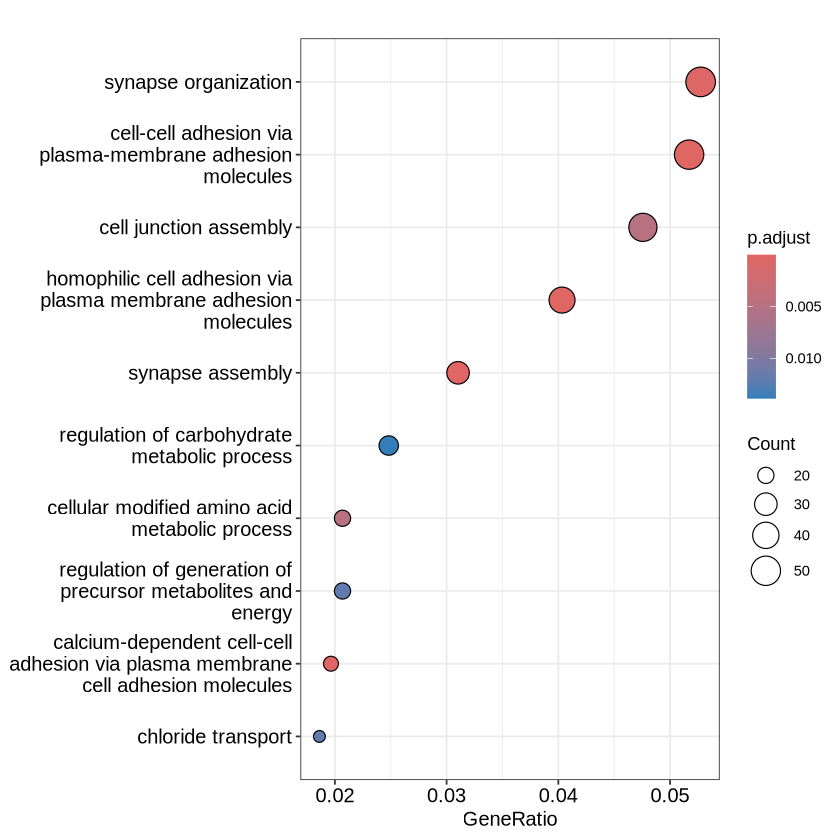

In [2]:
#go and KEGG (R)
library(clusterProfiler)
library(org.Hs.eg.db)

for (file in c('hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_down.txt',
                   'hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_up.txt',
                   'hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_down.txt',
                   'hic_paper_analysis/loop_analysis/pro_v_sen/stringent/different_loops_genes_majority_overlap_up.txt')){

    print(file)
    
    gene_list <- read.table(file)
    
    entrez = mapIds(org.Hs.eg.db,
                    keys=gene_list$V1,
                    column="ENTREZID",
                    keytype="ENSEMBL",
                    multiVals="first")
        
    ego <- enrichGO(gene          = entrez,
                    OrgDb         = org.Hs.eg.db,
                    ont           = "ALL",
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 0.05,
                    qvalueCutoff  = 0.05,
                    readable      = TRUE)
        
    d <- dotplot(ego, showCategory=10) 
    print(d)

    kk <- enrichKEGG(gene = entrez,
                     organism = 'hsa',
                     pvalueCutoff = 0.05,
                     pAdjustMethod = "BH")
    k <- dotplot(kk, showCategory=10)
    print(k)
    
}

In [1]:
#determine overlap between SASP and diff loops up (python)

def find_overlap_unique_2(file1, file2):

    set1 = set(line.strip() for line in open(file1))
    set2 = set(line.strip() for line in open(file2))
    unique_set1 = set1-set2
    unique_set2 = set2-set1
    shared = set1 & set2
    print('unique to first set:')
    print(len(unique_set1))
    print('unique to second set:')
    print(len(unique_set2))
    print('shared:')
    print(len(shared))
    return unique_set1, unique_set2, shared

rs_unique, sasp_unique, rs_sasp_shared = find_overlap_unique_2('hic_paper_analysis/loop_analysis/pro_v_sen/lenient/different_loops_genes_majority_overlap_up.txt', 'hic_paper_analysis/SASP/sasp_rs_up.txt')
               

unique to first set:
4281
unique to second set:
157
shared:
323



	Fisher's Exact Test for Count Data

data:  rbind(c(157, 4281), c(323, 59432 - (157 + 323 + 4281)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 5.246781      Inf
sample estimates:
odds ratio 
  6.207548 


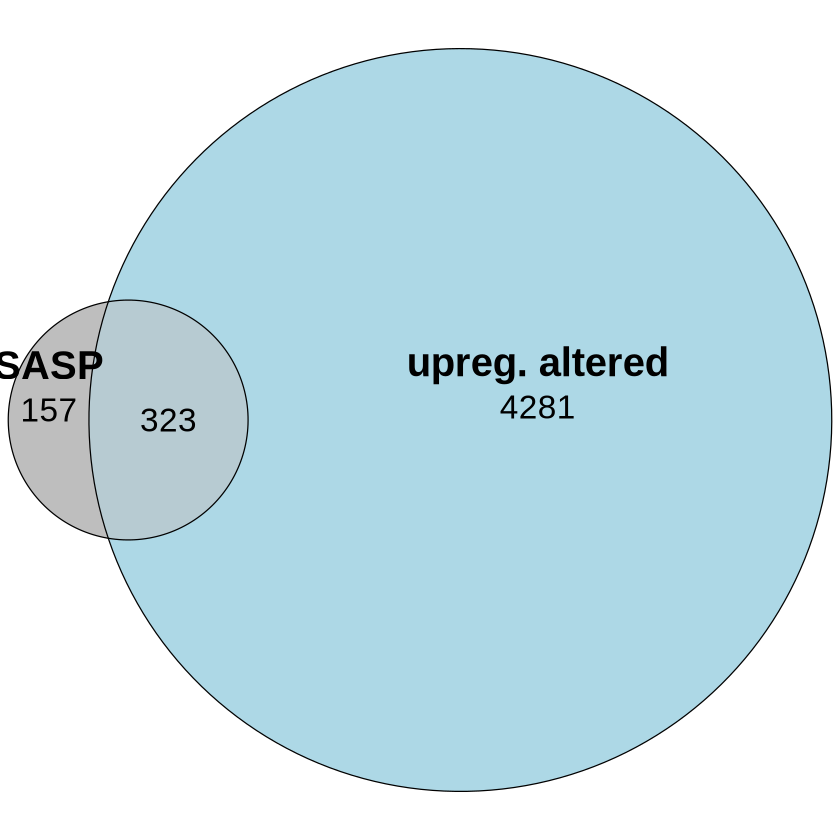

In [4]:
#plot SASP/loops (R)

library(eulerr)

#sasp and rs loop overlap
sasp_RS_loop <- euler(c(
  "SASP" = 157,
  "upreg. altered" = 4281,
  "SASP&upreg. altered" = 323
))

plot(
  sasp_RS_loop,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "lightblue")
)

fisher.test(rbind(c(157,4281), c(323,59432-(157+323+4281))), alternative = "greater")

Figure 5 (methylation)

In [ ]:
#ran the following for P/PS/S up and down... (bash)
#*NEED TO CHANGE THE NUMBER OF LOOPS TO MATCH THAT IN THE FILE*

#input files
anchor1file=pro_sen_30kb_S_anchor1_final.bed
anchor2file=pro_sen_30kb_S_anchor2_final.bed
ofinterestbed=meth_down_hg38.bed

#combine anchors into one
cat $anchor1file $anchor2file > ${anchor1file}_${anchor2file}

#bedtools intersect w motif of interest
#echo ${anchor1file}_${anchor2file}
#echo ${ofinterestbed}
bedtools intersect -wa -wb -a ${anchor1file}_${anchor2file} -b ${ofinterestbed} > ${anchor1file}_${anchor2file}_${ofinterestbed}

#loop through loops and count CTCF
for loop in {1..8930}
do
echo $loop
awk -v a=$loop '{if($4==a && $5==1)print$5"\t"$6}' ${anchor1file}_${anchor2file}_${ofinterestbed} | wc -l >> ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor1_count.txt
awk -v a=$loop '{if($4==a && $5==2)print$5"\t"$6}' ${anchor1file}_${anchor2file}_${ofinterestbed} | wc -l >> ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor2_count.txt
done

#combine files to get 0 1 2 count
paste $anchor1file ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor1_count.txt > ${anchor1file}_${ofinterestbed}_w_count.txt
paste $anchor2file ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor2_count.txt > ${anchor2file}_${ofinterestbed}_w_count.txt
paste ${anchor1file}_${ofinterestbed}_w_count.txt ${anchor2file}_${ofinterestbed}_w_count.txt > ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor1_anchor2_w_counts.txt

#count 0 1 2
cat ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor1_anchor2_w_counts.txt | while read line; do echo $line | awk '{if($6==0 && $12==0)print"0";else if($6==0 && 
$12>0)print"1";else if($6>0 && 
$12==0)print"1";else if($6>0 && $12>0)print"2";else print"something went wrong"}' >> ${anchor1file}_${anchor2file}_${ofinterestbed}_consolidated_counts.txt ; done
paste ${anchor1file}_${anchor2file}_${ofinterestbed}_anchor1_anchor2_w_counts.txt ${anchor1file}_${anchor2file}_${ofinterestbed}_consolidated_counts.txt > ${anchor1file}_${anchor2file}_${ofinterestbed}_final.txt

In [1]:
#determine the 0/1/2/ counts for P/PS/S up/down (bash)

#UP

echo P
#P 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 0
#P 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 1
#P 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 2

echo PS
#PS 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 0
#PS 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 1
#PS 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 2

echo S
#S 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 0
#S 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 1
#S 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_up/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_up_hg38.bed_final.txt | grep -c 2

#DOWN

echo P
#P 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 0
#P 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 1
#P 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_P_anchor1_final.bed_pro_sen_30kb_P_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 2

echo PS
#PS 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 0
#PS 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 1
#PS 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_PS_anchor1_final.bed_pro_sen_30kb_PS_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 2

echo S
#S 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 0
#S 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 1
#S 2
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/pro_sen_30kb_S_anchor1_final.bed_pro_sen_30kb_S_anchor2_final.bed_meth_down_hg38.bed_final.txt | grep -c 2


P
805
547
184
PS
4412
2524
707
S
5670
2584
676
P
645
503
388
PS
3107
2470
2066
S
2661
2893
3376



	Pearson's Chi-squared test

data:  methyl_up_chi_sq
X-squared = 106.65, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  methyl_down_chi_sq
X-squared = 331.11, df = 4, p-value < 2.2e-16


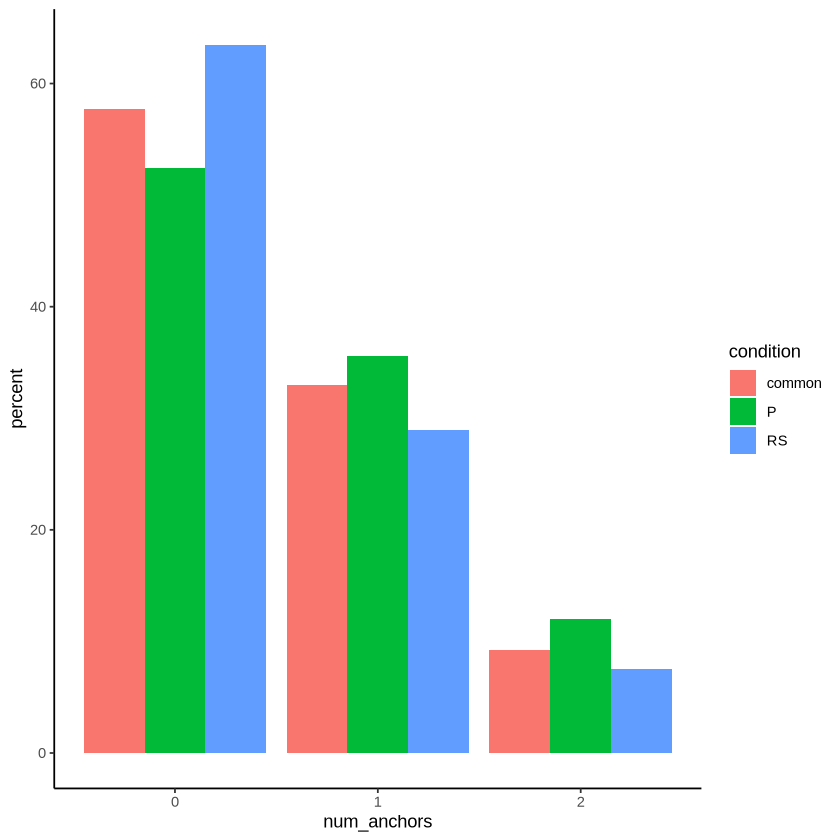

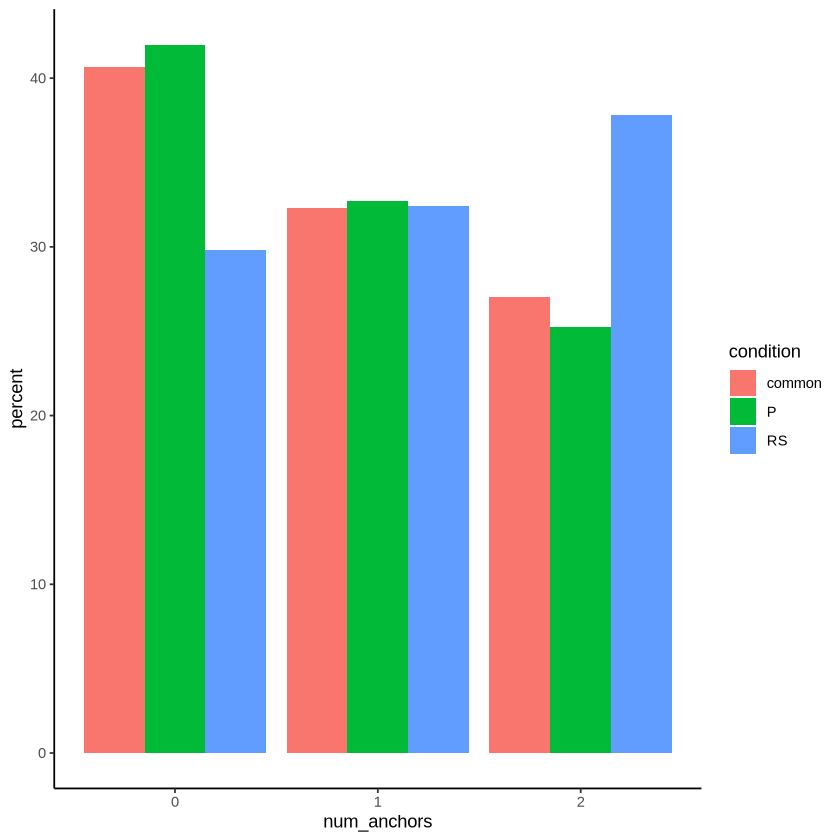

In [1]:
library (ggplot2)

######loops motifs########################################################################### (R)
methyl_up_table <- data.frame(condition = c("P", "P", "P", "RS", "RS", "RS", "common", "common", "common"),
                              num_anchors = c(0,1,2,0,1,2,0,1,2),
                              percent = c(805/1536, 547/1536, 184/1536,
                                          5670/8930, 2584/8930, 676/8930,
                                          4412/7643, 2524/7643, 707/7643))
methyl_up_table$percent <- methyl_up_table$percent*100

methyl_up_chi_sq <- data.frame(zero = c(805, 5670, 4412),
                               one = c(547, 2584, 2524),
                               two = c(184, 676, 707))
chisq.test(methyl_up_chi_sq)

methyl_up_loops <- ggplot(methyl_up_table, aes(fill=condition, y=percent, x=num_anchors)) + 
  geom_bar(position="dodge", stat="identity") + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
  theme(axis.line = element_line(color = 'black'))
methyl_up_loops

methyl_down_table <- data.frame(condition = c("P", "P", "P", "RS", "RS", "RS", "common", "common", "common"),
                                num_anchors = c(0,1,2,0,1,2,0,1,2),
                                percent = c(645/1536, 503/1536, 388/1536,
                                            2661/8930, 2893/8930, 3376/8930,
                                            3107/7643, 2470/7643, 2066/7643))
methyl_down_table$percent <- methyl_down_table$percent * 100

methyl_down_chi_sq <- data.frame(zero = c(645, 2661, 3107),
                                 one = c(503, 2893, 2470),
                                 two = c(388, 3376, 2066))

chisq.test(methyl_down_chi_sq)

methyl_down_loops <- ggplot(methyl_down_table, aes(fill=condition, y=percent, x=num_anchors)) + 
  geom_bar(position="dodge", stat="identity") + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
  theme(axis.line = element_line(color = 'black'))
methyl_down_loops



In [1]:
#intersected loops losing methylation at both anchors with CTCF motif based on the same above script used for methylation (bash)
#analysis in folder

awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/CTCF_analysis/sen_loops_losing_from_both_anchors_1.txt_sen_loops_losing_from_both_anchors_2.txt_CTCF_hg38.bed_final.txt | grep -c 0
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/CTCF_analysis/sen_loops_losing_from_both_anchors_1.txt_sen_loops_losing_from_both_anchors_2.txt_CTCF_hg38.bed_final.txt | grep -c 1
awk '{print $NF}' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/CTCF_analysis/sen_loops_losing_from_both_anchors_1.txt_sen_loops_losing_from_both_anchors_2.txt_CTCF_hg38.bed_final.txt | grep -c 2


2271
487
618


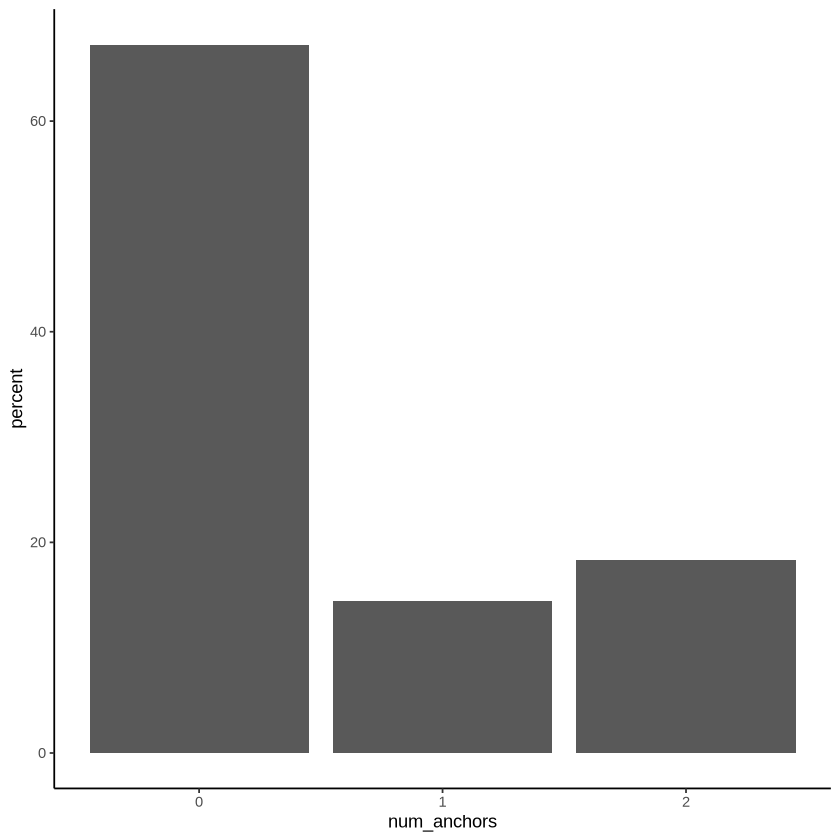

In [1]:
#make visualization of CTCF (R)

library(ggplot2)

methyl_CTCF <- data.frame(num_anchors = c(0,1,2),
                          percent = c(2271*100/3376,487*100/3376,618*100/3376))

methyl_CTCF_plot <- ggplot(methyl_CTCF, aes(y=percent, x=num_anchors)) + 
  geom_bar(position="dodge", stat="identity") + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
  theme(axis.line = element_line(color = 'black'))
methyl_CTCF_plot


In [ ]:
#collapse compartments from bin to start stop (python)

import pandas as pd

#read in data frame
df = pd.read_csv('hic_paper_analysis/compartment_analysis/pro_vs_sen_full_compartment_details.bedGraph', delimiter = '\t')

#add column with label
df['Compartment'] = df.apply(lambda row: 'towardsA' if row['padj'] <= 0.05 and (row['sen'] - row['pro']) > 0 \
                           else 'towardsB' if row['padj'] <= 0.05 and (row['sen'] - row['pro']) < 0 \
                             else 'A' if row['padj'] > 0.05 and row['pro'] > 0 \
                             else 'B' if row['padj'] > 0.05 and row['pro'] < 0 \
                             else 'ERROR', axis=1)
#split by chromosome
split_dfs = {group: group_df for group, group_df in df.groupby('chr')}


# Access individual DataFrames
for group, split_df in split_dfs.items():
    
    #group together
    split_df['Group'] = (split_df['Compartment'] != split_df['Compartment'].shift(1)).cumsum()

    result_df = split_df.groupby(['Compartment', 'Group']).agg({
        'chr': 'min',
        'start': 'min',
        'end': 'max'}).reset_index()

    sorted_result_df = result_df.sort_values(by='Group')
    
    desired_column_order = ['chr', 'start', 'end', 'Compartment', 'Group']

    reordered_df = sorted_result_df[desired_column_order]

    print(reordered_df)

    reordered_df.to_csv('240116_collapse_dchic_' + group + '.txt', index=False, sep = '\t')




In [3]:
#intersect collapsed bins with loops losing methylation at both anchors (bash)

sort -k 1,1 -k2,2n hic_paper_analysis/compartment_analysis/pro_sen_collapse_compartments.txt | tail -n +23 > hic_paper_analysis/compartment_analysis/pro_sen_collapse_compartments.bed

module load bedtools2

mkdir hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/

bedtools intersect -wao -f .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/sen_loops_losing_from_both_anchors.bed \
-b hic_paper_analysis/compartment_analysis/pro_sen_collapse_compartments.bed > hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed

wc -l hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed
grep -w -c 'A' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed
grep -w -c 'B' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed
grep -w -c 'towardsA' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed
grep -w -c 'towardsB' hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed



3376 hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/compartments/sen_losing_loops_both_anchors_a_b.bed
798
1660
220
54


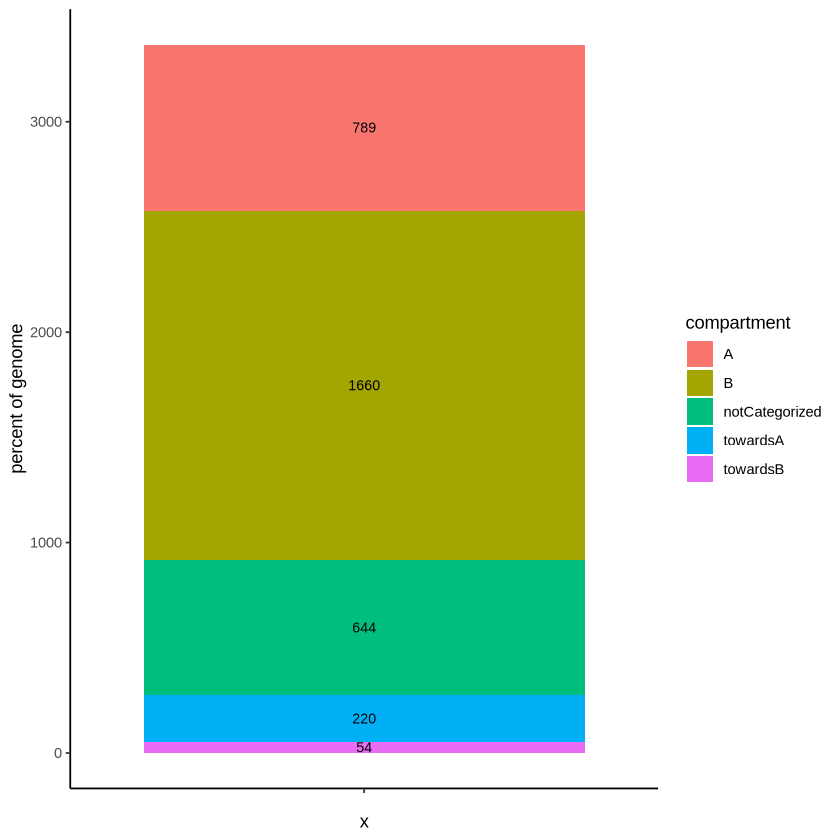

In [1]:
#plot loss of me compartment switching (R)
library(ggplot2)

methylation_AB_table <- data.frame(compartment = c("A", "B", "towardsA", "towardsB", "notCategorized"),
                                   num_loops = c(789, 1660, 220, 54, 644))



ab_methylation_stacked_bar <- ggplot(methylation_AB_table, aes(fill=compartment, y=num_loops, x = "", label = round(num_loops, digits = 2))) + 
  geom_bar(position="stack", stat="identity") +  geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
  theme(text = element_text(size = 25)) + theme_bw() + theme(
    plot.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  ) +
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black')) + ylab("percent of genome")

ab_methylation_stacked_bar

In [ ]:
#collapse subcompartments from bin to start stop (python)

import pandas as pd

#read in data frame
df = pd.read_csv('hic_paper_analysis/subcompartment_analysis/grow_RIS_calder2_header.txt', delimiter = '\t')

#split by chromosome
split_dfs = {group: group_df for group, group_df in df.groupby('chr')}


# Access individual DataFrames
for group, split_df in split_dfs.items():
    
    #group together
    split_df['Group'] = (split_df['switch'] != split_df['switch'].shift(1)).cumsum()

    result_df = split_df.groupby(['switch', 'Group']).agg({
        'chr': 'min',
        'start': 'min',
        'end': 'max'}).reset_index()

    sorted_result_df = result_df.sort_values(by='Group')
    
    desired_column_order = ['chr', 'start', 'end', 'switch', 'Group']

    reordered_df = sorted_result_df[desired_column_order]

    print(reordered_df)

    reordered_df.to_csv('240116_collapse_sub_' + group + '.txt', index=False, sep = '\t')

In [4]:
#intersect loops losing methylation with subcompartments (bash)

sort -k 1,1 -k2,2n hic_paper_analysis/subcompartment_analysis/pro_sen_collapse_subcompartments.txt | tail -n +24 > hic_paper_analysis/subcompartment_analysis/pro_sen_collapse_subcompartments.bed

module load bedtools2

mkdir hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/subcompartments/

bedtools intersect -wao -f .6 -a hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/sen_loops_losing_from_both_anchors.bed \
-b hic_paper_analysis/subcompartment_analysis/pro_sen_collapse_subcompartments.bed > \
hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/subcompartments/sen_loops_losing_from_both_anchors_subcomp.txt

cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
grep -w -c $line hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/subcompartments/sen_loops_losing_from_both_anchors_subcomp.txt
done

mkdir: cannot create directory ‘hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/subcompartments/’: File exists
7
1
0
0
0
0
0
64
4
3
1
0
0
1
62
33
16
3
5
1
0
34
23
17
13
3
0
0
15
23
29
28
12
8
0
14
23
18
27
32
32
6
16
15
35
26
39
70
62
2
5
8
15
12
15
74


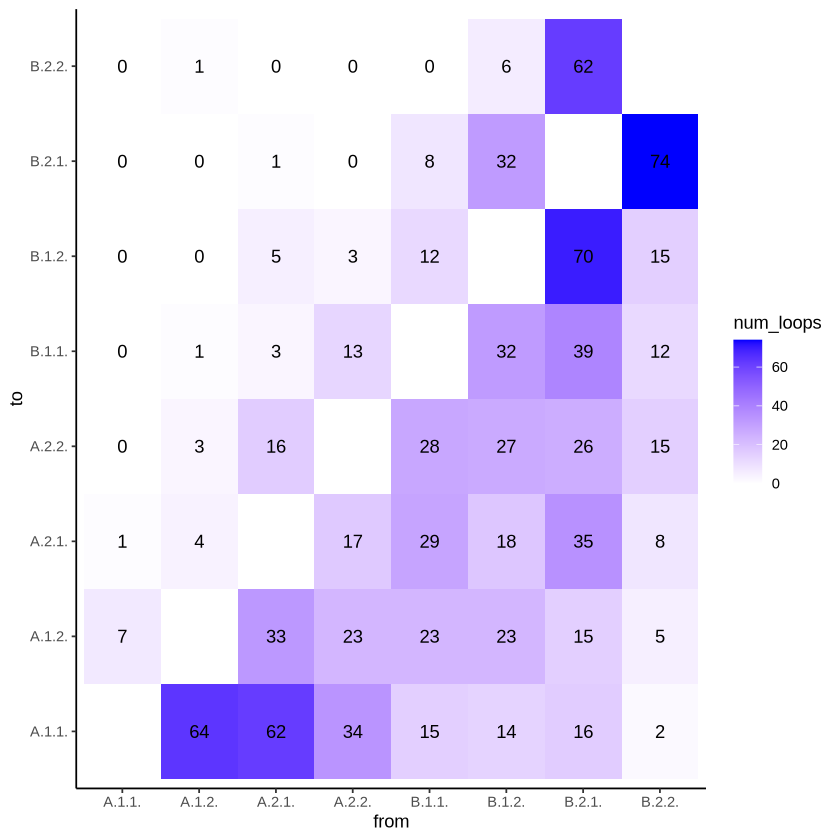

In [1]:
#plot the above in R (manually added diagonal to keep color scale good)
######methylation subcomp###########################################################################

library(ggplot2)
library(stringr)

switches_vector <- c('A.1.1._A.1.1.', 'A.1.1._A.1.2.', 'A.1.1._A.2.1.', 'A.1.1._A.2.2.', 'A.1.1._B.1.1.', 'A.1.1._B.1.2.', 'A.1.1._B.2.1.', 'A.1.1._B.2.2.', 
                     'A.1.2._A.1.1.', 'A.1.2._A.1.2.', 'A.1.2._A.2.1.', 'A.1.2._A.2.2.', 'A.1.2._B.1.1.', 'A.1.2._B.1.2.', 'A.1.2._B.2.1.', 'A.1.2._B.2.2.', 
                     'A.2.1._A.1.1.', 'A.2.1._A.1.2.', 'A.2.1._A.2.1.', 'A.2.1._A.2.2.', 'A.2.1._B.1.1.', 'A.2.1._B.1.2.', 'A.2.1._B.2.1.', 'A.2.1._B.2.2.', 
                     'A.2.2._A.1.1.', 'A.2.2._A.1.2.', 'A.2.2._A.2.1.', 'A.2.2._A.2.2.', 'A.2.2._B.1.1.', 'A.2.2._B.1.2.', 'A.2.2._B.2.1.', 'A.2.2._B.2.2.', 
                     'B.1.1._A.1.1.', 'B.1.1._A.1.2.', 'B.1.1._A.2.1.', 'B.1.1._A.2.2.', 'B.1.1._B.1.1.', 'B.1.1._B.1.2.', 'B.1.1._B.2.1.', 'B.1.1._B.2.2.', 
                     'B.1.2._A.1.1.', 'B.1.2._A.1.2.', 'B.1.2._A.2.1.', 'B.1.2._A.2.2.', 'B.1.2._B.1.1.', 'B.1.2._B.1.2.', 'B.1.2._B.2.1.', 'B.1.2._B.2.2.', 
                     'B.2.1._A.1.1.', 'B.2.1._A.1.2.', 'B.2.1._A.2.1.', 'B.2.1._A.2.2.', 'B.2.1._B.1.1.', 'B.2.1._B.1.2.', 'B.2.1._B.2.1.', 'B.2.1._B.2.2.', 
                     'B.2.2._A.1.1.', 'B.2.2._A.1.2.', 'B.2.2._A.2.1.', 'B.2.2._A.2.2.', 'B.2.2._B.1.1.', 'B.2.2._B.1.2.', 'B.2.2._B.2.1.', 'B.2.2._B.2.2.')

pro_sen_me <- c(138,7,1,0,0,0,0,0,64,28,4,3,1,0,0,1,62,33,25,16,3,5,1,0,34,23,17,16,13,3,0,0,15,23,29,28,17,12,8,0,14,23,18,27,32,27,32,6,16,15,35,26,39,70,100,62,2,5,8,15,12,15,74,527)

pro_sen_me_sub <- data.frame(switches_pro_to_sen = switches_vector,
                             num_loops = pro_sen_me)

pro_sen_me_sub[c('from', 'to')] <- str_split_fixed(pro_sen_me_sub$switches_pro_to_sen, '_', 2)
pro_sen_me_sub = pro_sen_me_sub[!(pro_sen_me_sub$from == pro_sen_me_sub$to),]

pro_sen_me_gg <-ggplot(pro_sen_me_sub, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_loops)) + geom_text(aes(label = round(num_loops,2))) + scale_fill_gradient(low = "white", high = "blue") + theme(legend.position="right") + theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
pro_sen_me_gg


In [1]:
#determine overlap between SASP and diff loops up (python)

def find_overlap_unique_2(file1, file2):

    set1 = set(line.strip() for line in open(file1))
    set2 = set(line.strip() for line in open(file2))
    unique_set1 = set1-set2
    unique_set2 = set2-set1
    shared = set1 & set2
    print('unique to first set:')
    print(len(unique_set1))
    print('unique to second set:')
    print(len(unique_set2))
    print('shared:')
    print(len(shared))
    return unique_set1, unique_set2, shared

lose_meth_unique, sasp_unique, lose_meth_sasp_shared = find_overlap_unique_2('hic_paper_analysis/loop_analysis/pro_v_sen/methylation/methyl_down/sen_loops_losing_from_both_anchors_genes_up_w_sen.txt', 'hic_paper_analysis/SASP/sasp_rs_up.txt')
    

unique to first set:
1978
unique to second set:
359
shared:
121



	Fisher's Exact Test for Count Data

data:  rbind(c(121, 1978), c(359, 59432 - (121 + 1978 + 359)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 8.071499      Inf
sample estimates:
odds ratio 
  9.707217 


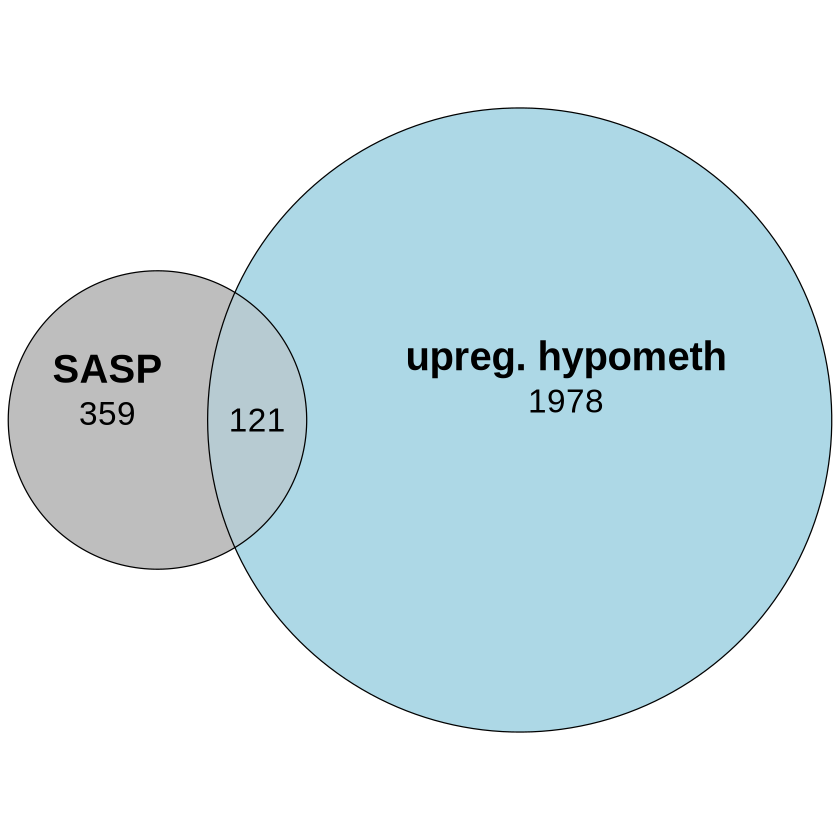

In [3]:
#visualize SASP and loss of me up (R)

library(eulerr)

#sasp and rs loop overlap
sasp_hypometh_loop <- euler(c(
  "SASP" = 359,
  "upreg. hypometh" = 1978,
  "SASP&upreg. hypometh" = 121
))

plot(
  sasp_hypometh_loop,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "lightblue")
)

fisher.test(rbind(c(121,1978),c(359,59432 - (121 + 1978 + 359))),alternative = "greater")

Figure 6 (LINE1)

In [ ]:
#Figure 6 A (line1 expression) was done by Maxfield Kelsey

In [4]:
#intersect LINE1 with a/b collapsed subcompartments collapsed and loops (closest) (RS and OIS)

sort -k 1,1 -k2,2n hic_paper_analysis/compartment_analysis/narita_pro_OIS_collapse_compartments.txt | tail -n +24 > hic_paper_analysis/compartment_analysis/narita_pro_OIS_collapse_compartments.bed
sort -k 1,1 -k2,2n hic_paper_analysis/subcompartment_analysis/narita_pro_OIS_collapse_subcompartments.txt | tail -n +24 > hic_paper_analysis/subcompartment_analysis/narita_pro_OIS_collapse_subcompartments.bed

mkdir hic_paper_analysis/repeats/compartments/
mkdir hic_paper_analysis/repeats/subcompartments/
hic_paper_analysis/repeats/loops/

module load bedtools2

#ab
bedtools intersect -wao -f .6 -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead.bed -b hic_paper_analysis/compartment_analysis/pro_sen_collapse_compartments.bed > hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_pro_sen_a_b.txt
bedtools intersect -wao -f .6 -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead.bed -b hic_paper_analysis/compartment_analysis/narita_pro_OIS_collapse_compartments.bed > hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_narita_pro_OIS_a_b.txt

echo RS AB
grep -c 'towardsA' hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_pro_sen_a_b.txt
grep -c 'towardsB' hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_pro_sen_a_b.txt

echo OIS AB
grep -c 'towardsA' hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_narita_pro_OIS_a_b.txt
grep -c 'towardsB' hic_paper_analysis/repeats/compartments/refnonrefl1hspa2intact.hg38_narita_pro_OIS_a_b.txt


#sub
bedtools intersect -wao -f .6 -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead.bed -b hic_paper_analysis/subcompartment_analysis/pro_sen_collapse_subcompartments.bed > hic_paper_analysis/repeats/subcompartments/efnonrefl1hspa2intact.hg38_pro_sen_sub.txt
bedtools intersect -wao -f .6 -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead.bed -b hic_paper_analysis/subcompartment_analysis/narita_pro_OIS_collapse_subcompartments.bed > \hic_paper_analysis/repeats/subcompartments/refnonrefl1hspa2intact.hg38_narita_pro_OIS_sub.txt

echo RS sub
cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
grep -c $line hic_paper_analysis/repeats/subcompartments/efnonrefl1hspa2intact.hg38_pro_sen_sub.txt
done

echo OIS sub
cat hic_paper_analysis/subcompartment_analysis/switches.txt | while read line
do
grep -c $line hic_paper_analysis/repeats/subcompartments/refnonrefl1hspa2intact.hg38_narita_pro_OIS_sub.txt
done

#loops
sort -k 1,1 -k2,2n hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead.bed > hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead_sorted.bed
bedtools closest -d -t first -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead_sorted.bed -b hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_P_only_sorted.bed > hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_P.bed

echo P 0
awk '{if($NF==0)print$NF}' hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_P.bed | wc -l 
bedtools closest -d -t first -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead_sorted.bed -b hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_PS_only_sorted.bed > hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_PS.bed
echo PS 0
awk '{if($NF==0)print$NF}' hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_PS.bed | wc -l 
bedtools closest -d -t first -a hic_paper_analysis/repeats/refnonrefl1hspa2intact.hg38.noHead_sorted.bed -b hic_paper_analysis/loop_analysis/pro_v_sen/pro_sen_30kb_S_only_sorted.bed > hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_S.bed
echo S 0
awk '{if($NF==0)print$NF}' hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_S.bed | wc -l


bash: hic_paper_analysis/repeats/loops/: No such file or directory
RS AB
19
2
OIS AB
9
3
RS sub
2
1
0
0
0
0
0
2
1
0
0
0
0
0
3
5
1
0
0
0
0
0
1
4
1
0
0
0
1
4
1
4
1
1
0
1
3
3
0
2
1
0
3
2
1
3
2
7
4
1
0
2
0
0
3
3
OIS sub
1
0
0
0
0
0
0
4
1
1
0
0
0
0
1
4
0
0
0
0
0
0
1
4
3
1
0
0
0
1
1
4
0
0
0
0
1
1
0
3
1
0
0
0
0
0
3
9
6
0
0
0
0
0
2
8
bash: hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_P.bed: No such file or directory
P 0
awk: fatal: cannot open file `hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_P.bed' for reading: No such file or directory
0
bash: hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_PS.bed: No such file or directory
PS 0
awk: fatal: cannot open file `hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_PS.bed' for reading: No such file or directory
0
bash: hic_paper_analysis/repeats/loops/refnonrefl1hspa2intact.hg38.noHead_pro_sen_S.bed: No such file or directory
S 0
awk:


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  t(l1_pro_sen_pro_ois)
X-squared = 4.102, df = NA, p-value = 0.1449


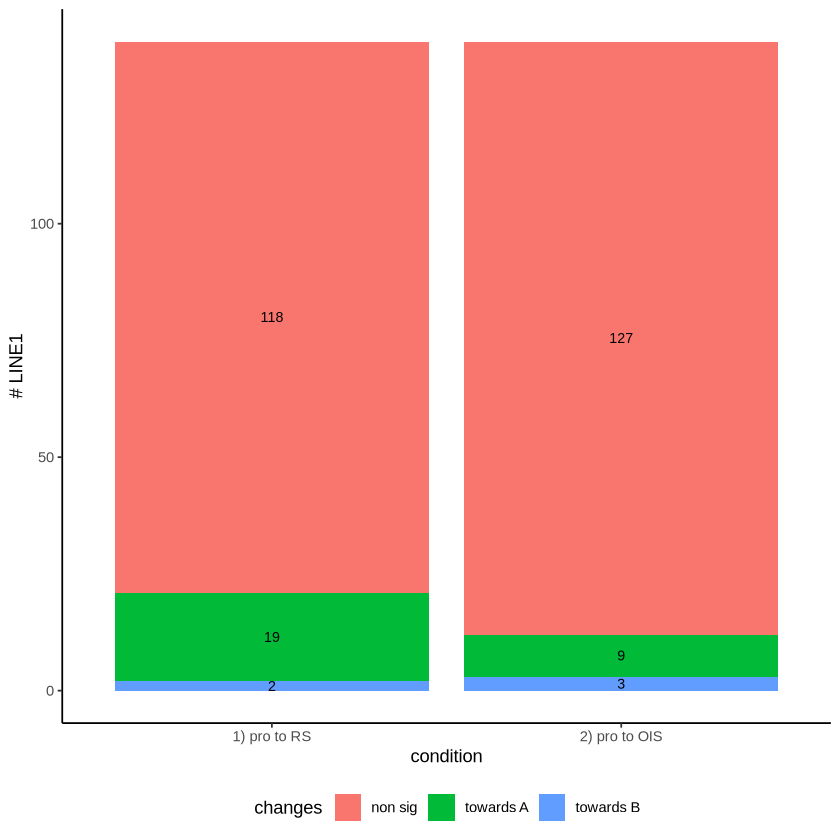

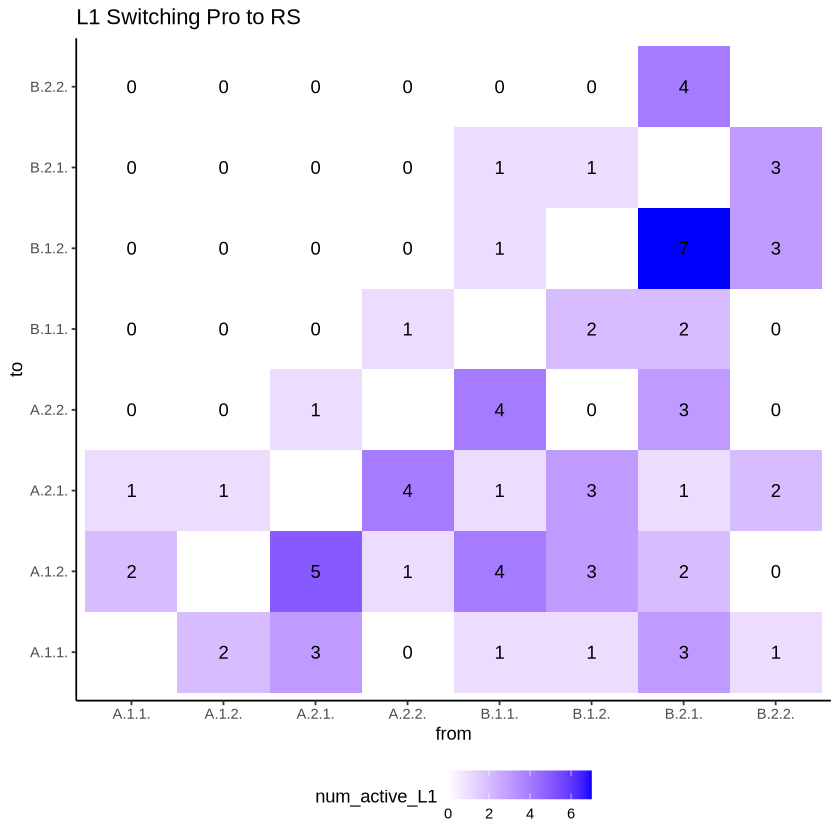


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  t(l1_pro_sen_pro_ois)
X-squared = 29.455, df = NA, p-value = 0.7451


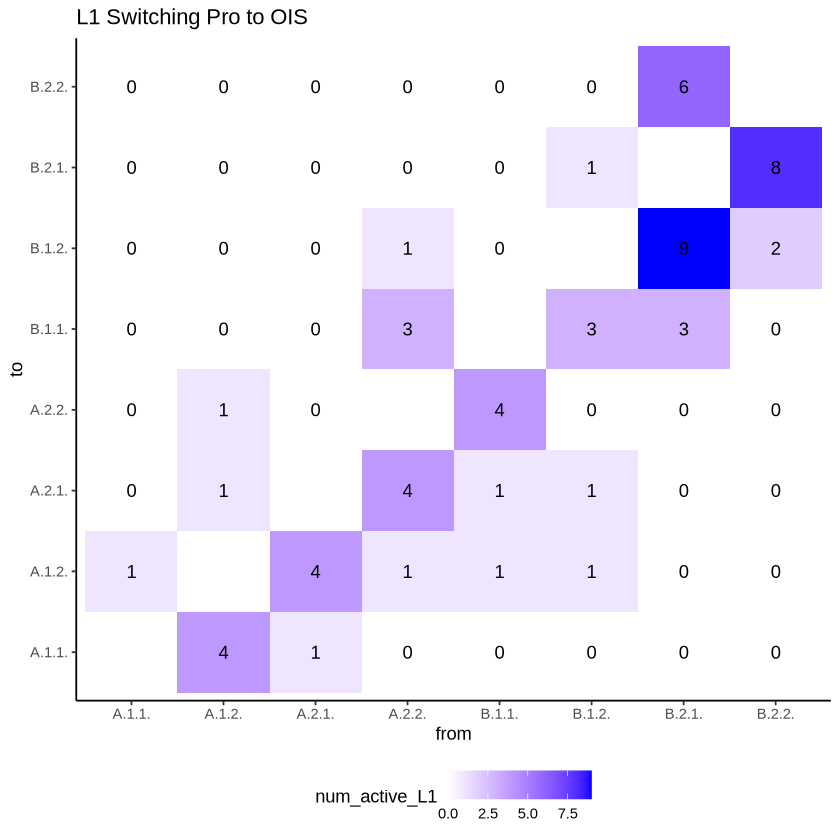


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  t(l1_pro_sen_pro_ois)
X-squared = 72.361, df = NA, p-value = 0.0004998


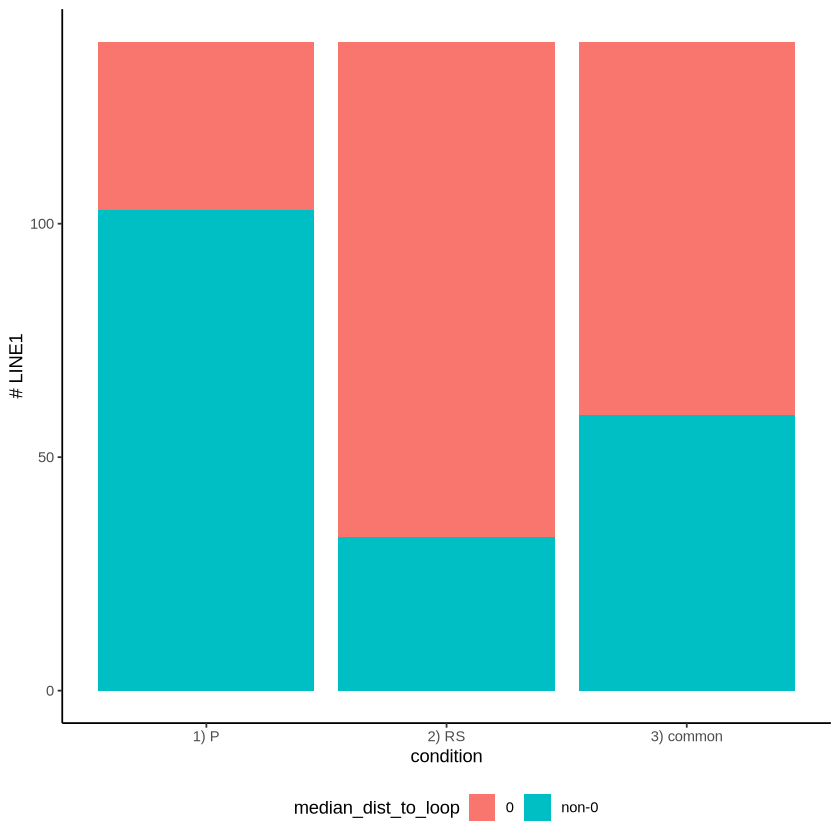

In [2]:
#graph L1 (R)

library(ggplot2)
library(stringr)

######repeats###########################################################################

######L1 dchic###########################################################################
#updated 2/12
L1_dchic <- data.frame(changes = c('non sig', 'towards A', 'towards B', 'non sig', 'towards A', 'towards B'),
                       condition = c('1) pro to RS', '1) pro to RS', '1) pro to RS', '2) pro to OIS', '2) pro to OIS', '2) pro to OIS'),
                       number_of_active_L1 = c(139-19-2, 19, 2, 139-9-3, 9, 3))

L1_dchic_plot <- ggplot(L1_dchic, aes(fill=changes, y=number_of_active_L1, x = condition, label = round(number_of_active_L1, digits = 2))) + 
  geom_bar(position="stack", stat="identity") +  geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
  theme(text = element_text(size = 25)) + theme_bw() + theme(
    plot.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  ) + theme(legend.position="bottom") +
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black')) + ylab("# LINE1")

L1_dchic_plot

#stats (all sig diff)
l1_pro_sen_pro_ois <- data.frame(pro_RS = c(139-19-2, 19, 2),
                                           pro_ois = c(139-9-3, 9, 3))
chisq.test(t(l1_pro_sen_pro_ois), simulate.p.value = TRUE)

######L1 subcomp###########################################################################

L1_subcomp_table_pro_sen <- read.table("hic_paper_analysis/subcompartment_analysis/switches.txt", header = FALSE)
colnames(L1_subcomp_table_pro_sen) <- c('switch')
L1_switching_df_pro_sen <- data.frame(L1_switches_pro_to_sen = L1_subcomp_table_pro_sen$switch,
                                      num_active_L1 = c(2,1,0,0,0,0,0,2,1,0,0,0,0,0,3,5,1,0,0,0,0,0,1,4,1,0,0,0,1,4,1,4,1,1,0,1,3,3,0,2,1,0,3,2,1,3,2,7,4,1,0,2,0,0,3,3))

L1_switching_df_pro_sen[c('from', 'to')] <- str_split_fixed(L1_switching_df_pro_sen$L1_switches_pro_to_sen, '_', 2)

L1_switching_df_pro_sen = L1_switching_df_pro_sen[!(L1_switching_df_pro_sen$from == L1_switching_df_pro_sen$to),]

L1_heat_pro_sen <- ggplot(L1_switching_df_pro_sen, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_active_L1)) + geom_text(aes(label = round(num_active_L1,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("L1 Switching Pro to RS")
L1_heat_pro_sen <- L1_heat_pro_sen + theme_bw() + theme(
  plot.background = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.border = element_blank()
) + theme(legend.position="bottom") +
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black'))
L1_heat_pro_sen

L1_subcomp_table_pro_ois <- read.table("hic_paper_analysis/subcompartment_analysis/switches.txt", header = FALSE)
colnames(L1_subcomp_table_pro_ois) <- c('switch')
L1_switching_df_pro_ois <- data.frame(L1_switches_pro_to_ois = L1_subcomp_table_pro_ois$switch,
                                      num_active_L1 = c(1,0,0,0,0,0,0,4,1,1,0,0,0,0,1,4,0,0,0,0,0,0,1,4,3,1,0,0,0,1,1,4,0,0,0,0,1,1,0,3,1,0,0,0,0,0,3,9,6,0,0,0,0,0,2,8))

L1_switching_df_pro_ois[c('from', 'to')] <- str_split_fixed(L1_switching_df_pro_ois$L1_switches_pro_to_ois, '_', 2)

L1_switching_df_pro_ois = L1_switching_df_pro_ois[!(L1_switching_df_pro_ois$from == L1_switching_df_pro_ois$to),]

L1_heat_pro_ois <- ggplot(L1_switching_df_pro_ois, aes(from, to)) +    # Create default ggplot2 heatmap
  geom_tile(aes(fill = num_active_L1)) + geom_text(aes(label = round(num_active_L1,2))) + scale_fill_gradient(low = "white", high = "blue") + ggtitle("L1 Switching Pro to OIS")
L1_heat_pro_ois <- L1_heat_pro_ois + theme_bw() + theme(
  plot.background = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.border = element_blank()
) + theme(legend.position="bottom") + 
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black'))
L1_heat_pro_ois

l1_pro_sen_pro_ois <- data.frame(pro_RS = L1_switching_df_pro_sen$num_active_L1,
                                 pro_ois = L1_switching_df_pro_ois$num_active_L1)
l1_pro_sen_pro_ois <- l1_pro_sen_pro_ois[rowSums(l1_pro_sen_pro_ois[])>0,]

chisq.test(t(l1_pro_sen_pro_ois), simulate.p.value = TRUE)

#L1 loop anchors
loop_dist_df <- data.frame(condition = c('1) P', '1) P', '2) RS', '2) RS', '3) common', '3) common'),
                           median_dist_to_loop = c('non-0', '0', 'non-0', '0', 'non-0', '0'),
                           counts = c(139-36, 36, 139-106, 106, 139-80, 80))
l1_loop_plot <- ggplot(data = loop_dist_df, aes(x = condition, y = counts, fill = median_dist_to_loop)) + geom_bar(position="stack", stat="identity") +
  theme(text = element_text(size = 25)) + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
  theme(axis.line = element_line(color = 'black')) + ylab("# LINE1") + theme(legend.position="bottom") 
l1_loop_plot

l1_pro_sen_pro_ois <- data.frame(P = c(139-36, 36),
                                 RS = c(139-106, 106),
                                  common = c(139-80, 80))
chisq.test(t(l1_pro_sen_pro_ois), simulate.p.value = TRUE)




[E::get_intv] Failed to parse TBX_GENERIC, was wrong -p [type] used?
The offending line was: "chr	start	end	0"
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coor

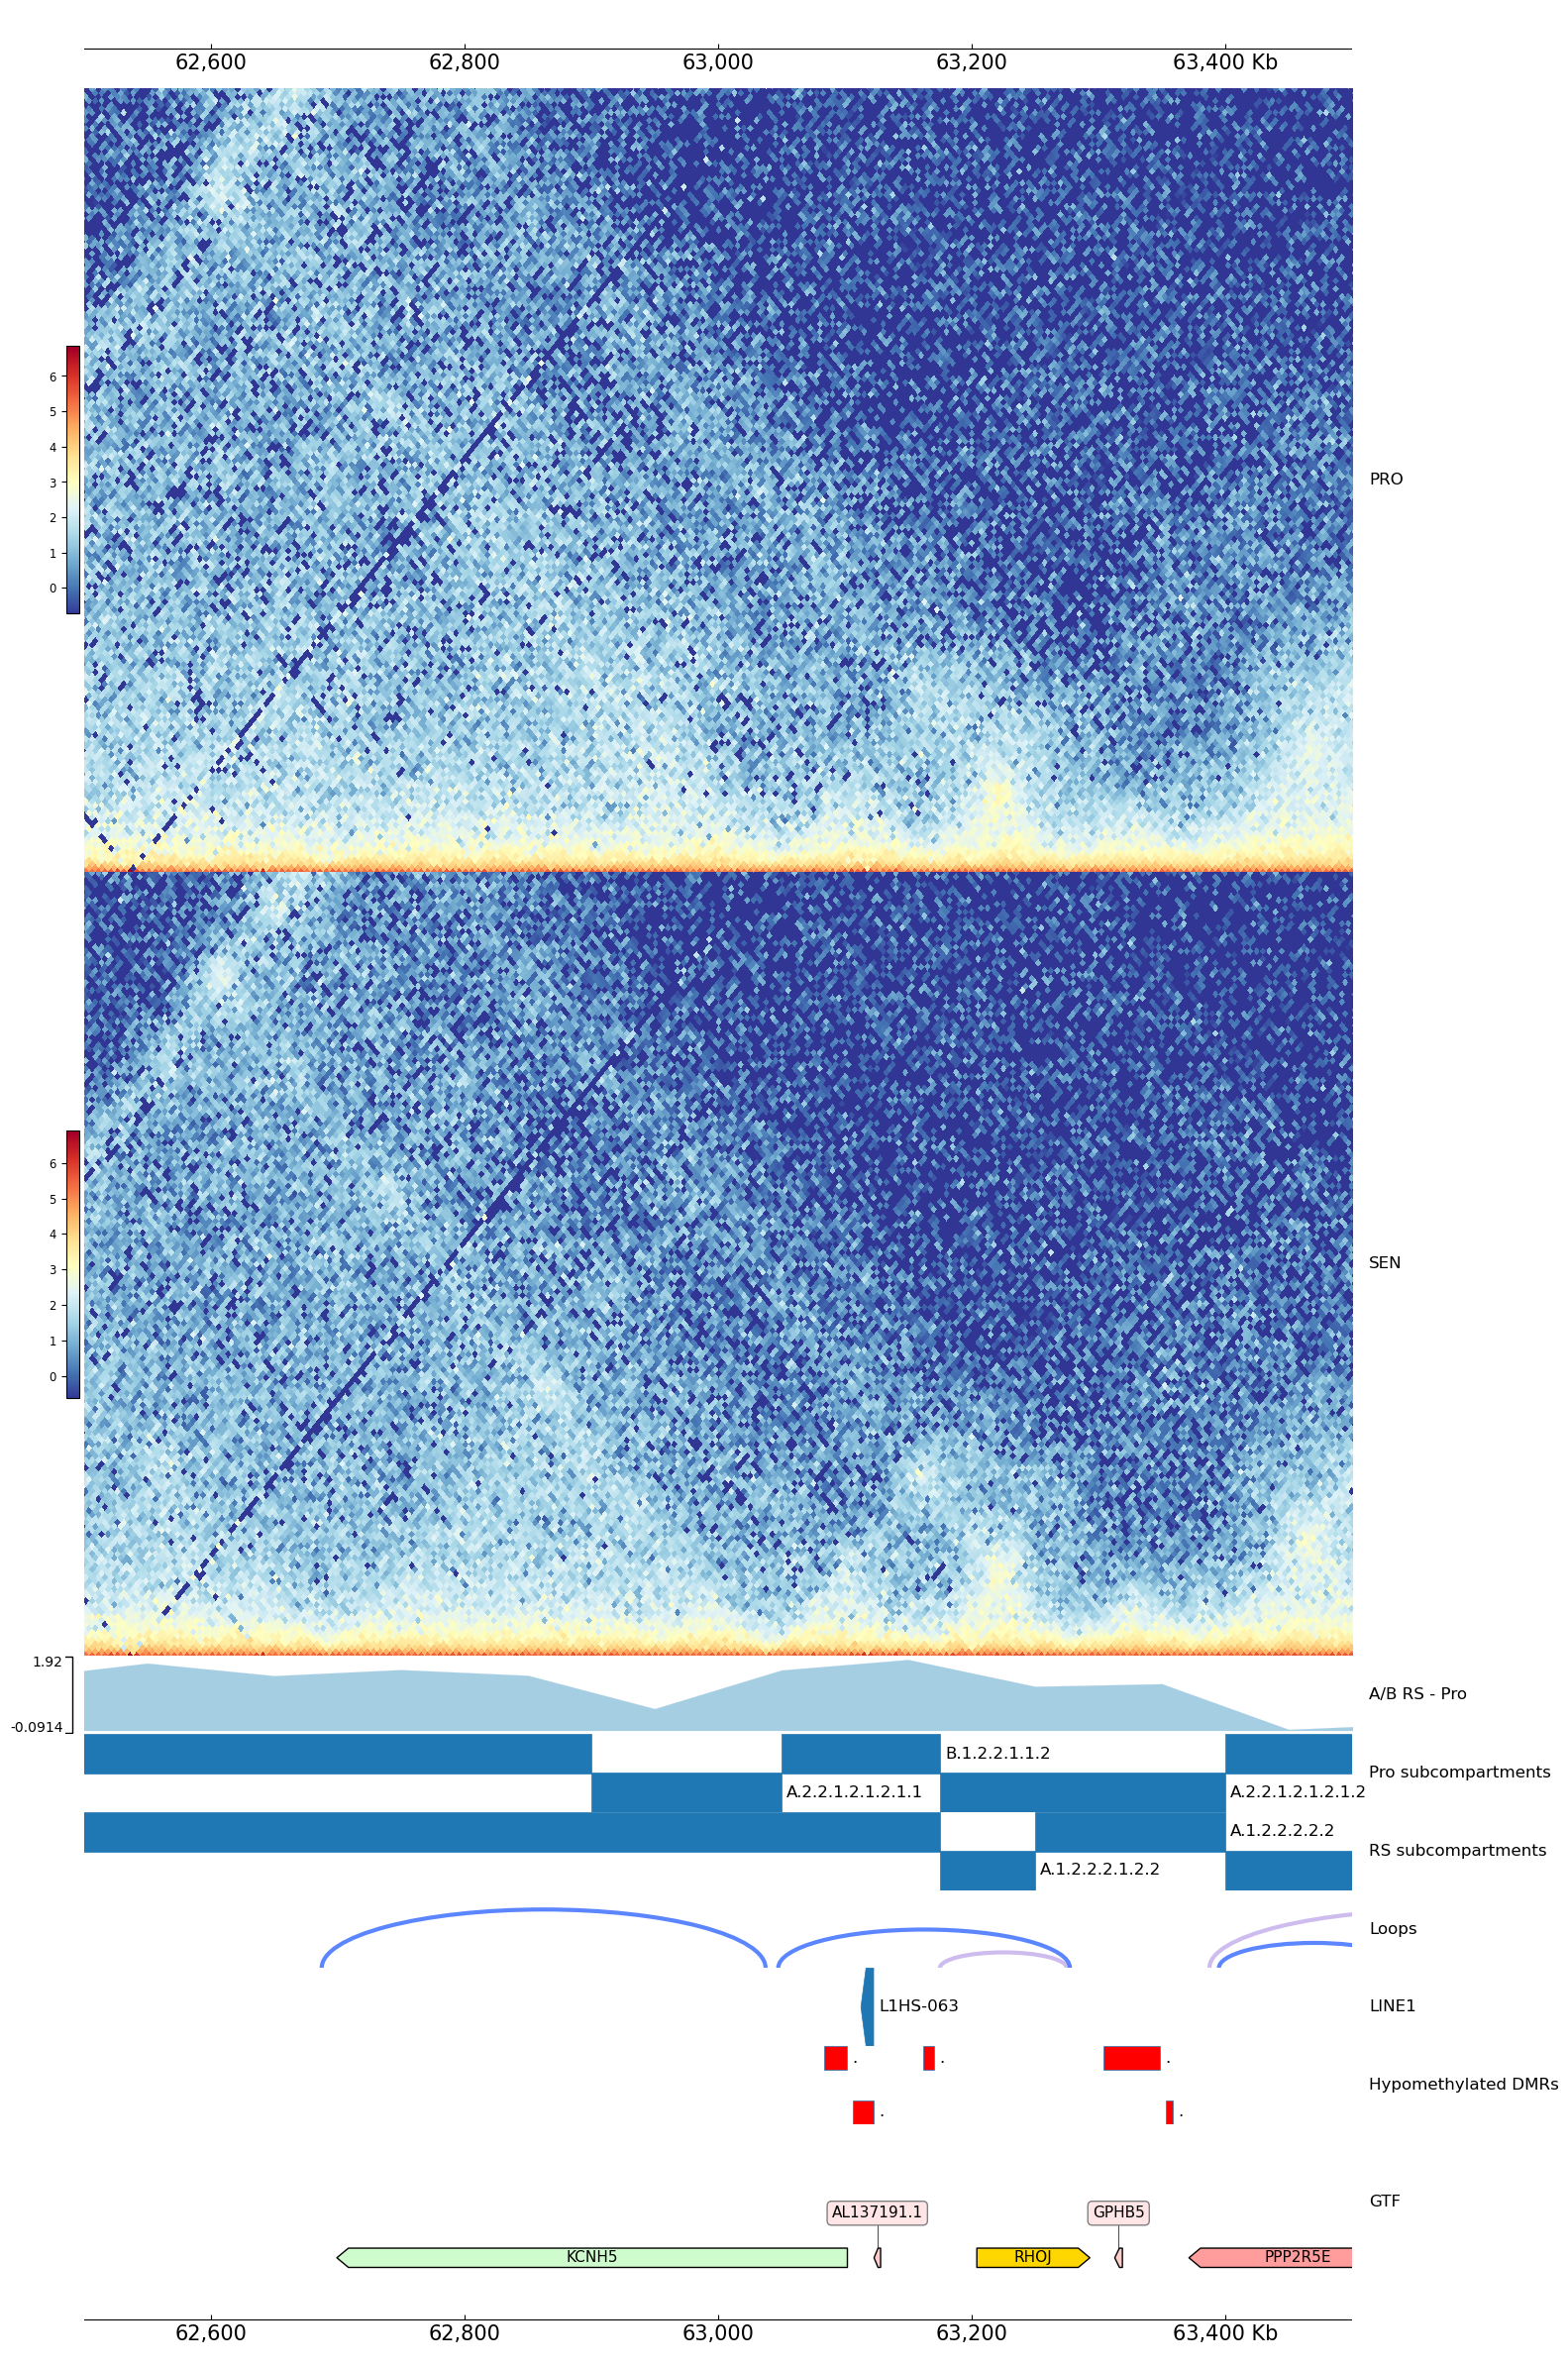

In [1]:
#maxfield made figure 6D
#visualization of LINE1 hot spot

import coolbox
from coolbox.api import *

frame = XAxis() + \
    HiCMat('hic_paper_analysis/hic_maps/pro_inter.hic', cmap = 'RdYlBu_r', balance = 'KR', resolution = 5000) + Title('PRO') + \
    HiCMat('hic_paper_analysis/hic_maps/sen_inter.hic', cmap = 'RdYlBu_r', balance = 'KR', resolution = 5000) + Title('SEN') + \
    BedGraph('hic_paper_analysis/coolbox_visualizations/pro_v_sen_full_comp_details_sen_minus_pro_for_visual.bedGraph') + Title('A/B RS - Pro') + \
    BED('hic_paper_analysis/coolbox_visualizations/pro_sub/all_sub_compartments_forvis.bed', display = 'interlaced', label = True, color = 'bed_rgb') + Title('Pro subcompartments') + \
    BED('hic_paper_analysis/coolbox_visualizations/sen_sub/all_sub_compartments_forvis.bed', display = 'interlaced', label = True, color = 'bed_rgb') + Title('RS subcompartments') + \
    Arcs('hic_paper_analysis/coolbox_visualizations/pre_sen_30kb_P_for_vis.bedpe', line_width = 3, color = '#FF4933') + Title('Loops') + \
    ArcsCoverage('hic_paper_analysis/coolbox_visualizations/pre_sen_30kb_PS_for_vis.bedpe', line_width = 3, color = '#C1ACE9') + Title('Loops') + \
    ArcsCoverage('hic_paper_analysis/coolbox_visualizations/pre_sen_30kb_S_for_vis.bedpe', line_width = 3, color = '#3368FF') + Title('Loops') + \
    BED('hic_paper_analysis/coolbox_visualizations/hotloci_numbered.txt') + Title('LINE1') + \
    BED('hic_paper_analysis/coolbox_visualizations/meth_down_hg38_for_viz.bed') + Title('Hypomethylated DMRs') + \
    GTF('hic_paper_analysis/coolbox_visualizations/ENCFF159KBI.gtf') + Title('GTF') + \
XAxis()
    
frame.plot('chr14:62500000-63500000')


Figure 7

[[ 0.01333223  0.16623482]
 [-0.03144956  0.17820826]
 [-0.04707067  0.26039103]
 [-0.24749962 -0.12559311]
 [-0.22768885 -0.15067178]
 [-0.26288301 -0.12511489]
 [ 0.24915536 -0.07996057]
 [ 0.26872108 -0.06893226]
 [ 0.28538305 -0.05456149]]


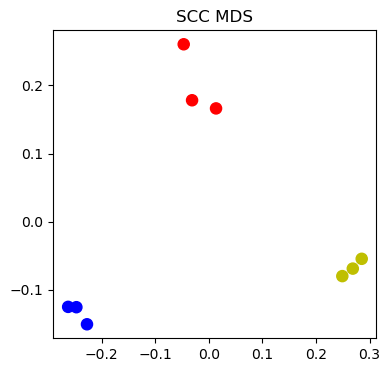

In [2]:
#Figure 7A (PYTHON)
from hicrep.utils import readMcool
from hicrep import hicrepSCC
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt       
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

cool_list = ['hic_paper_analysis/replicate_compare/arima2', 'hic_paper_analysis/replicate_compare/arima4', 'hic_paper_analysis/replicate_compare/arima7', 
             'hic_paper_analysis/replicate_compare/arima9', 'hic_paper_analysis/replicate_compare/arima10', 'hic_paper_analysis/replicate_compare/arima12',
            'hic_paper_analysis/replicate_compare/ADQ2.cool', 'hic_paper_analysis/replicate_compare/ADQ3.cool', 'hic_paper_analysis/replicate_compare/AD4.cool']

#pro_list = ['replicate_compare/arima2', 'replicate_compare/arima4', 'replicate_compare/arima7']
#sen_list = ['replicate_compare/arima9', 'replicate_compare/arima10', 'replicate_compare/arima12']

# smoothing window half-size
h = 1

# maximal genomic distance to include in the calculation
dBPMax = 500000

# whether to perform down-sampling or not 
# if set True, it will bootstrap the data set # with larger contact counts to
# the same number of contacts as in the other data set; otherwise, the contact 
# matrices will be normalized by the respective total number of contacts
bDownSample = False

#create matrix for MDS
scc_numpy = np.zeros((9,9))

for num1 in range(0,9):
    for num2 in range(0,9):
        fcool1 = cool_list[num1]
        fcool2 = cool_list[num2]
        
        cool1, binSize1 = readMcool(fcool1, -1)
        cool2, binSize2 = readMcool(fcool2, -1)
        
        binSize = binSize1
        
        scc = hicrepSCC(cool1, cool2, h, dBPMax, bDownSample, np.array(['1', '2', '3', '4',
                                                           '5', '6', '7', '8',
                                                            '9', '10', '11', '12',
                                                           '13', '14', '15', '16',
                                                            '17', '18', '19', '20',
                                                             '21', '22', 'X'], dtype=str))
        
        scc_numpy[num1,num2] = sum(scc)/len(scc)

mds = MDS(random_state=0)
scc_numpy_transform = mds.fit_transform(scc_numpy)
print(scc_numpy_transform)

colors = ['r', 'r', 'r', 'b', 'b', 'b', 'y', 'y', 'y']##, 'g', 'g']
labels = ['pro', 'pro', 'pro', 'sen', 'sen', 'sen', 'qui', 'qui', 'qui']#, 'imr90_pro', 'imr90_pro']
size = [64, 64, 64, 64, 64, 64, 64, 64, 64]#,64,64]

fig = plt.figure(2, (10,4))
ax = fig.add_subplot(122)
plt.scatter(scc_numpy_transform[:,0], scc_numpy_transform[:,1], s=size, c=colors, label=labels)
plt.title('SCC MDS')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

In [3]:
#Figure 7B (python)

#intersect qui and rs up and list with SASP (python)

def find_overlap_unique_2(file1, file2):

    set1 = set(line.strip() for line in open(file1))
    set2 = set(line.strip() for line in open(file2))
    unique_set1 = set1-set2
    unique_set2 = set2-set1
    shared = set1 & set2
    print('unique to first set:')
    print(len(unique_set1))
    print('unique to second set:')
    print(len(unique_set2))
    print('shared:')
    print(len(shared))
    return unique_set1, unique_set2, shared

print('qui')
qui_up_unique, sasp_unique, qui_up_sasp_shared = find_overlap_unique_2('hic_paper_analysis/rna/qui_up_v_pro_ensg.txt', 'hic_paper_analysis/SASP/sasp_atlas_w_de_cecco_sasp_ifn_ENS_sorted_uniq.txt')

print('rs')
rs_up_unique, sasp_unique, rs_up_sasp_shared = find_overlap_unique_2('hic_paper_analysis/rna/sen_up_v_pro_ensg.txt', 'hic_paper_analysis/SASP/sasp_atlas_w_de_cecco_sasp_ifn_ENS_sorted_uniq.txt')

qui
unique to first set:
7455
unique to second set:
765
shared:
551
rs
unique to first set:
6384
unique to second set:
836
shared:
480



	Fisher's Exact Test for Count Data

data:  rbind(c(551, 7455), c(765, 59432 - (551 + 7455 + 765)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 4.447013      Inf
sample estimates:
odds ratio 
  4.894502 


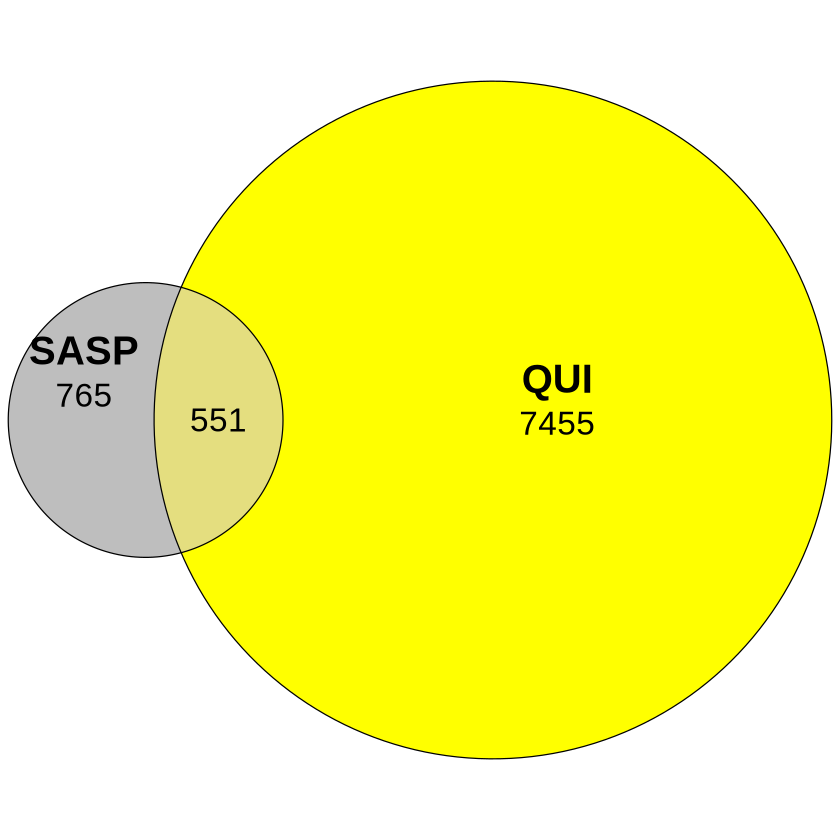


	Fisher's Exact Test for Count Data

data:  rbind(c(480, 6584), c(836, 59432 - (480 + 6584 + 836)))
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 4.071705      Inf
sample estimates:
odds ratio 
  4.493905 


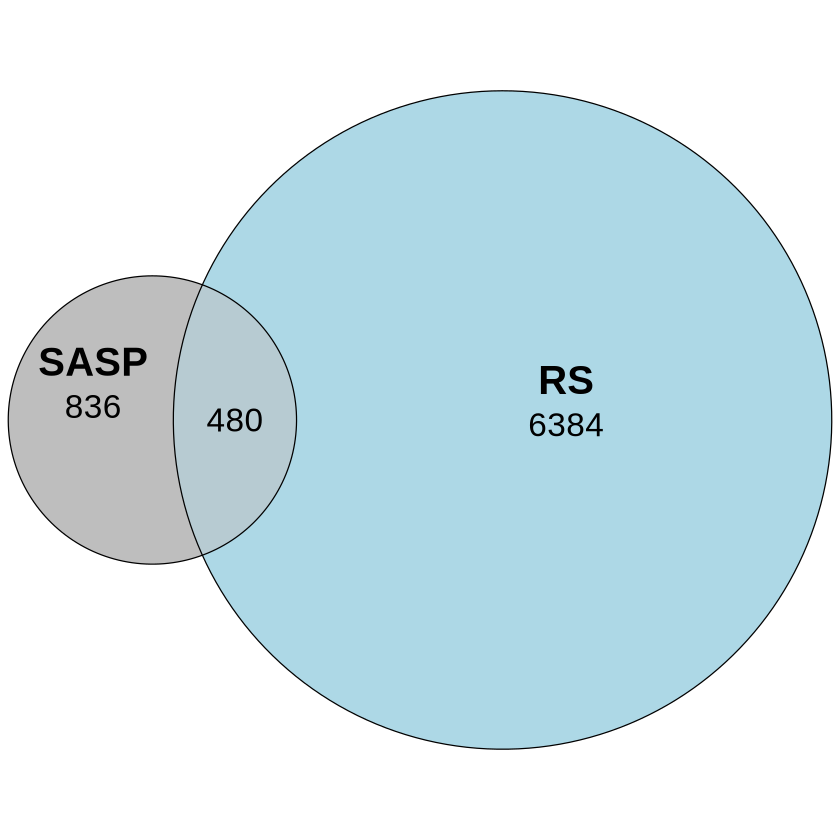

In [2]:
#Figure 7B (R)

library(eulerr)

#make venn

sasp_qui <- euler(c(
  "SASP" = 765,
  "QUI" = 7455,
  "SASP&QUI" = 551
))

plot(
  sasp_qui,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "yellow")
)

fisher.test(rbind(c(551,7455),c(765,59432 - (551 + 7455+765))), alternative = "greater")

sasp_rs <- euler(c(
  "SASP" = 836,
  "RS" = 6384,
  "SASP&RS" = 480
))

plot(
  sasp_rs,
  quantities = list(fontsize = 20), 
  labels = list(fontsize = 24),
    fills = c("grey", "lightblue")
)

fisher.test(rbind(c(480,6584),c(836,59432 - (480 + 6584+836))), alternative = "greater")


In [6]:
#cell cycle analysis (bash)
#table was made in adobe

#cell cycle genes extracted from org.eg.hs.db GO:0007049

sort -k 1,1 -k2,2n hic_paper_analysis/compartment_analysis/qui_sen_collapse_compartments.txt | tail -n +24 > hic_paper_analysis/compartment_analysis/qui_sen_collapse_compartments.bed
sort -k 1,1 -k2,2n hic_paper_analysis/subcompartment_analysis/qui_sen_collapse_subcompartments.txt | tail -n +24 > hic_paper_analysis/subcompartment_analysis/qui_sen_collapse_subcompartments.bed


module load bedtools2

mkdir hic_paper_analysis/cell_cycle_genes/ab
mkdir hic_paper_analysis/cell_cycle_genes/subcomp
mkdir hic_paper_analysis/cell_cycle_genes/loops

bedtools intersect -wao -f .6 -a hic_paper_analysis/cell_cycle_genes/cell_cycle_genes.bed -b hic_paper_analysis/compartment_analysis/qui_sen_collapse_compartments.bed > hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt

bedtools intersect -wao -f .6 -a hic_paper_analysis/cell_cycle_genes/cell_cycle_genes.bed -b hic_paper_analysis/subcompartment_analysis/qui_sen_collapse_subcompartments.bed > hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt

bedtools intersect -wao -f .6 -a hic_paper_analysis/cell_cycle_genes/cell_cycle_genes.bed  -b hic_paper_analysis/loop_analysis/qui_v_sen/240126_qui_sen_30kb_multiinter_lenient_unchanged.txt > hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_unchanged.txt
bedtools intersect -wao -f .6 -a hic_paper_analysis/cell_cycle_genes/cell_cycle_genes.bed  -b hic_paper_analysis/loop_analysis//qui_v_sen/240126_qui_sen_30kb_multiinter_lenient_changed.txt > hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_changed.txt

wc -l hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt
grep -wc 'A' hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt
grep -wc 'B' hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt
grep -wc 'towardsA' hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt
grep -wc 'towardsB' hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt

wc -l hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'A.1.1._A.1.1.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'A.1.2._A.1.2.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'A.2.1._A.2.1.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'A.2.2._A.2.2.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'B.1.1._B.1.1.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'B.1.2._B.1.2.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'B.2.1._B.2.1.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
grep -wc 'B.2.2._B.2.2.' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
awk '{if($8==".")print$0}' hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt | wc -l

wc -l hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_unchanged.txt
awk '{if($8==".")print$0}' hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_unchanged.txt | wc -l
wc -l hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_changed.txt 
awk '{if($8==".")print$0}' hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_changed.txt | wc -l


mkdir: cannot create directory ‘hic_paper_analysis/cell_cycle_genes/ab’: File exists
mkdir: cannot create directory ‘hic_paper_analysis/cell_cycle_genes/subcomp’: File exists
mkdir: cannot create directory ‘hic_paper_analysis/cell_cycle_genes/loops’: File exists
1825 hic_paper_analysis/cell_cycle_genes/ab/cell_cycle_genes_intersect_w_collapse_dchic_qui_sen_allchr.txt
1548
146
15
78
1825 hic_paper_analysis/cell_cycle_genes/subcomp/cell_cycle_genes_intersect_w_collapse_sub_qui_sen_allchr.txt
677
104
27
15
10
5
14
26
111
1825 hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_unchanged.txt
1678
1825 hic_paper_analysis/cell_cycle_genes/loops/cell_cycle_genes_intersect_w_qui_sen_30kb_multiinter_lenient_changed.txt
540


In [ ]:
#subcompartment figure is shown above, with the other subcompartment analysis (R)

In [ ]:
#subcompartment figure (GO) was made with adobe



clusterProfiler v4.8.3  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

[1] "hic_paper_analysis/loop_analysis/230926_qui_hiccups/qui_loops_genes_down_w_qui.txt"


'select()' returned 1:many mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



[1] "hic_paper_analysis/loop_analysis/230926_qui_hiccups/qui_loops_genes_up_w_qui.txt"


'select()' returned 1:many mapping between keys and columns



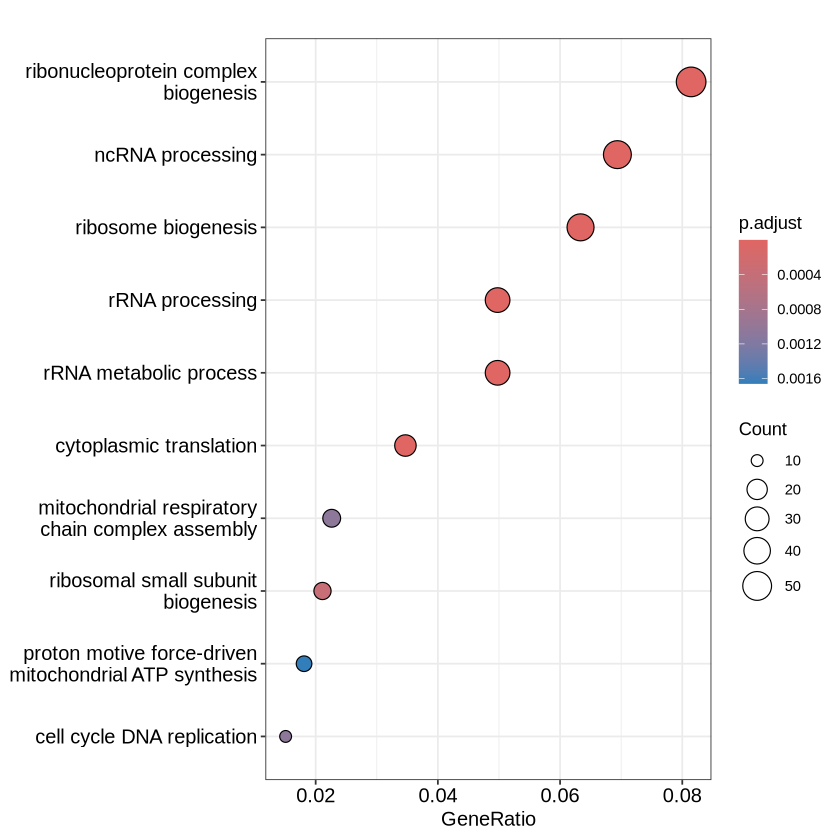

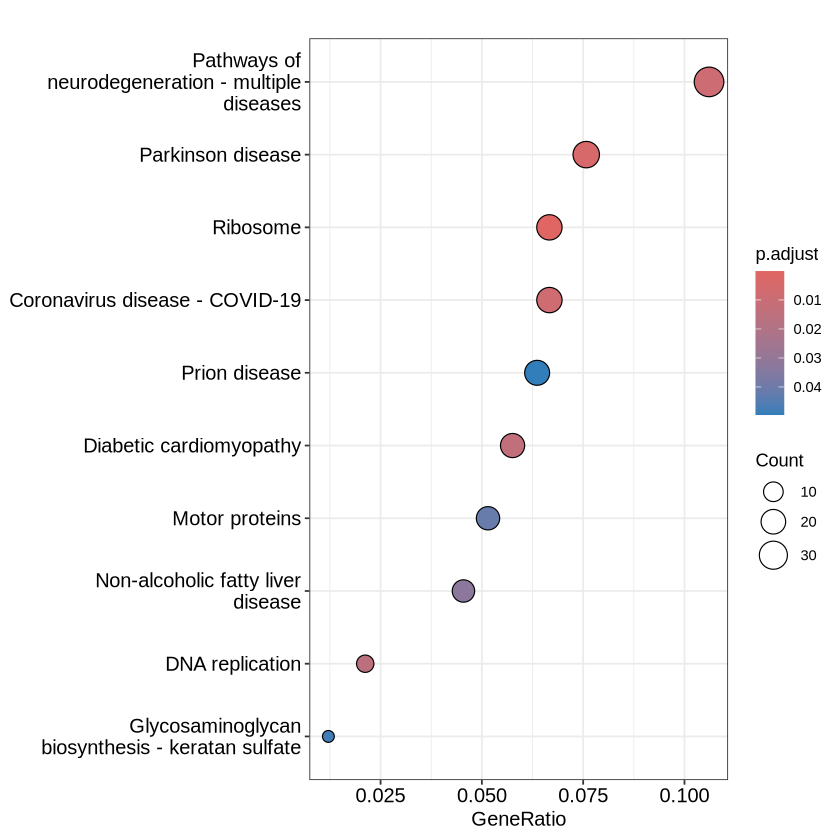

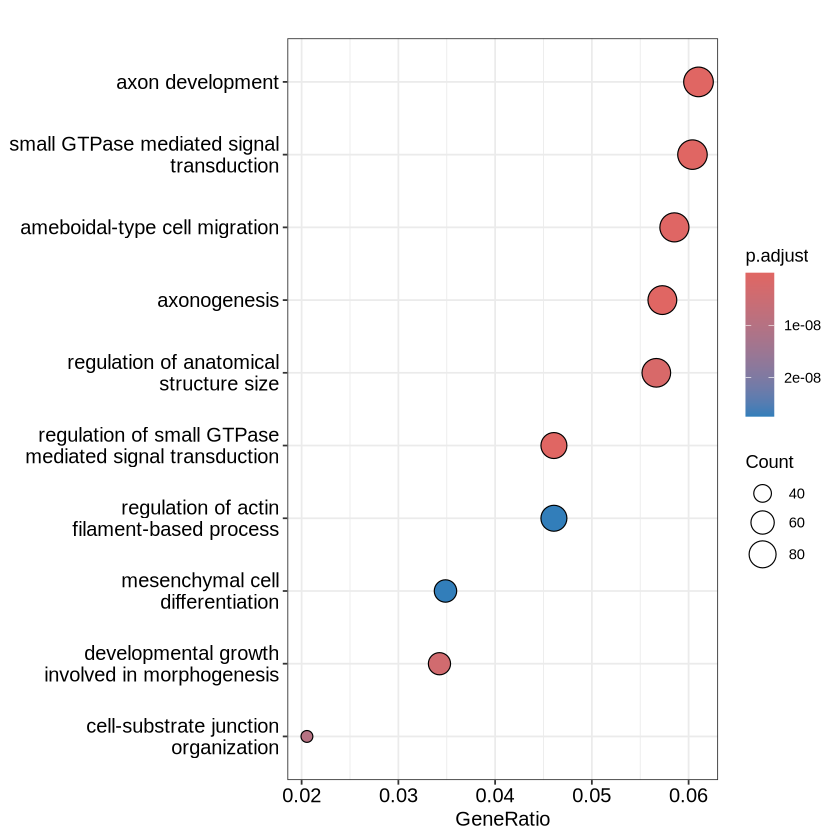

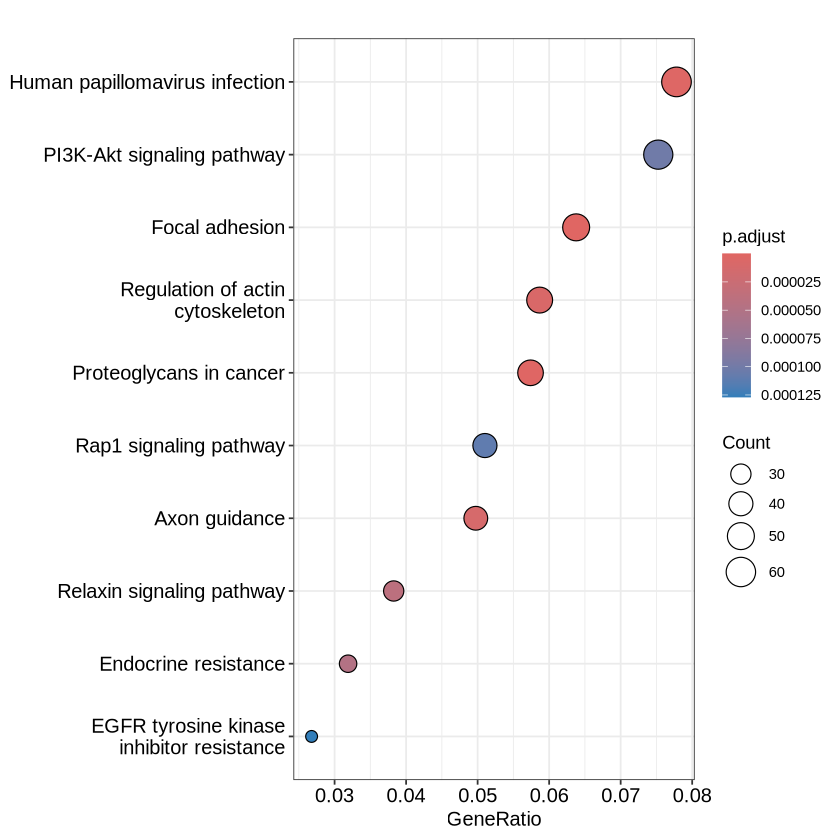

In [1]:
#go analysis (R)
library(clusterProfiler)
library(org.Hs.eg.db)

for (file in c('hic_paper_analysis/loop_analysis/230926_qui_hiccups/qui_loops_genes_down_w_qui.txt',
                   'hic_paper_analysis/loop_analysis/230926_qui_hiccups/qui_loops_genes_up_w_qui.txt')){

    print(file)
    
    gene_list <- read.table(file)
    
    entrez = mapIds(org.Hs.eg.db,
                    keys=gene_list$V1,
                    column="ENTREZID",
                    keytype="ENSEMBL",
                    multiVals="first")
        
    ego <- enrichGO(gene          = entrez,
                    OrgDb         = org.Hs.eg.db,
                    ont           = "ALL",
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 0.05,
                    qvalueCutoff  = 0.05,
                    readable      = TRUE)
        
    d <- dotplot(ego, showCategory=10) 
    print(d)

    kk <- enrichKEGG(gene = entrez,
                     organism = 'hsa',
                     pvalueCutoff = 0.05,
                     pAdjustMethod = "BH")
    k <- dotplot(kk, showCategory=10)
    print(k)
    
}

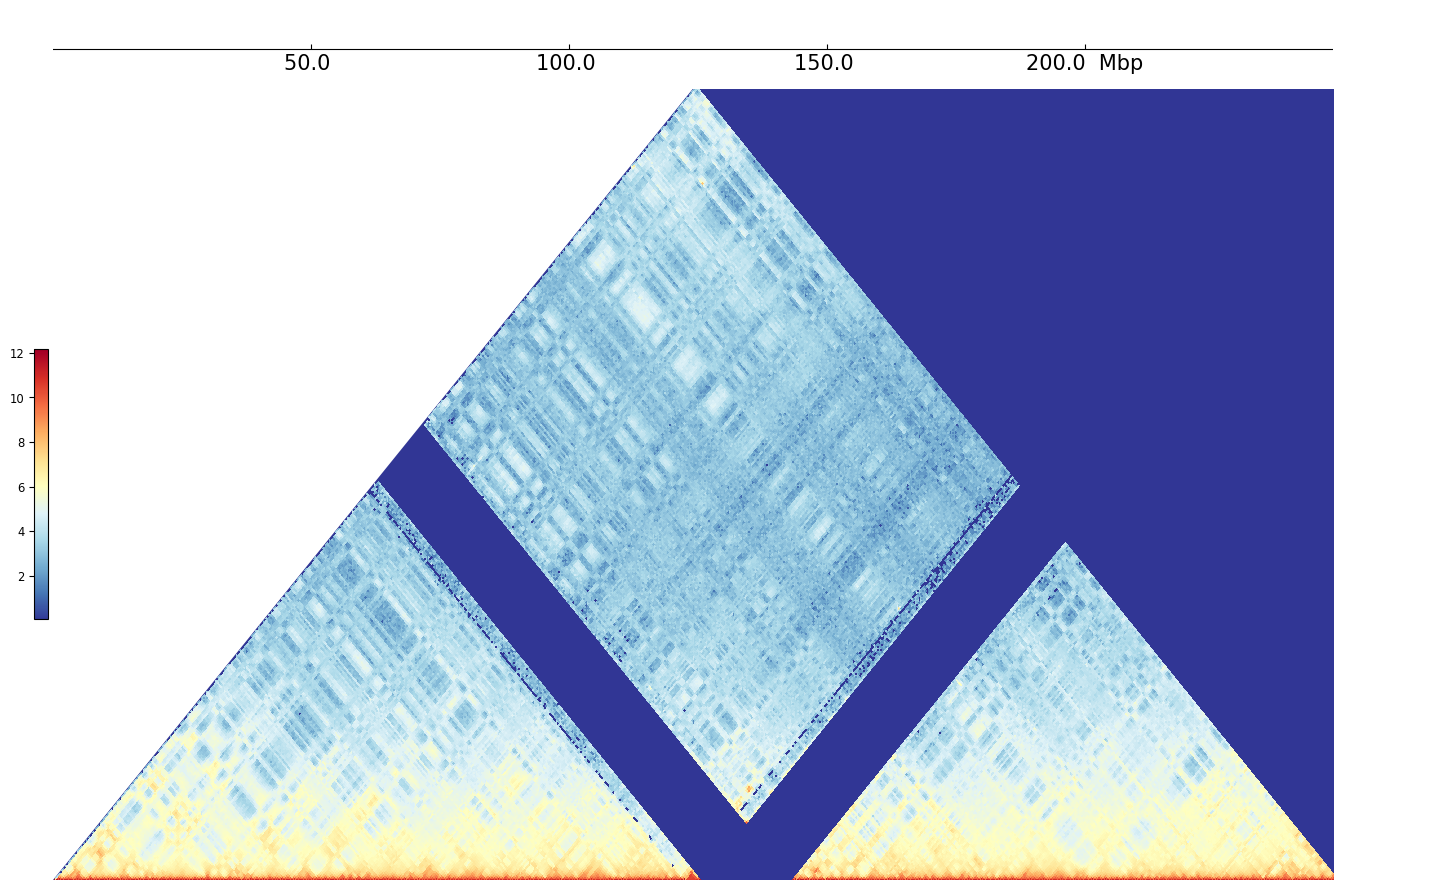

In [2]:
#supplementary figure 1 (python)
#first part (while genome) was done with juicebox
#chromosome 1 was created with juicebox...for example:

import coolbox
from coolbox.api import *

frame = XAxis() + \
    HiCMat('hic_paper_analysis/hic_maps/pro_inter.hic', cmap = 'RdYlBu_r')
frame.plot('chr1:1-248000000')

In [ ]:
#supplementary figure 2 created by MK, Sedivy lab



clusterProfiler v4.8.3  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, p

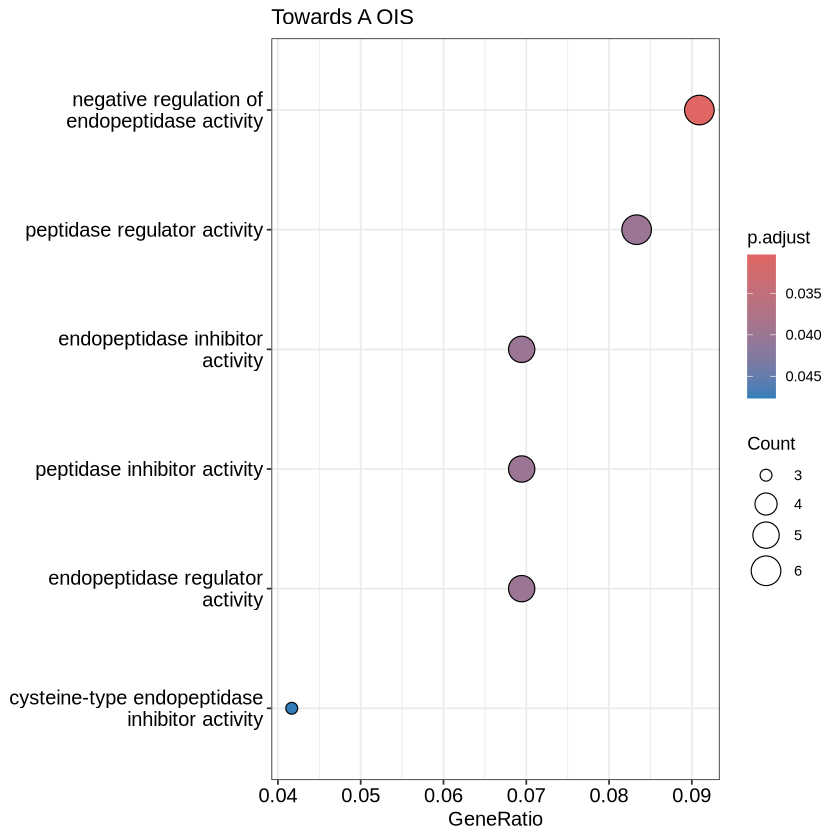

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



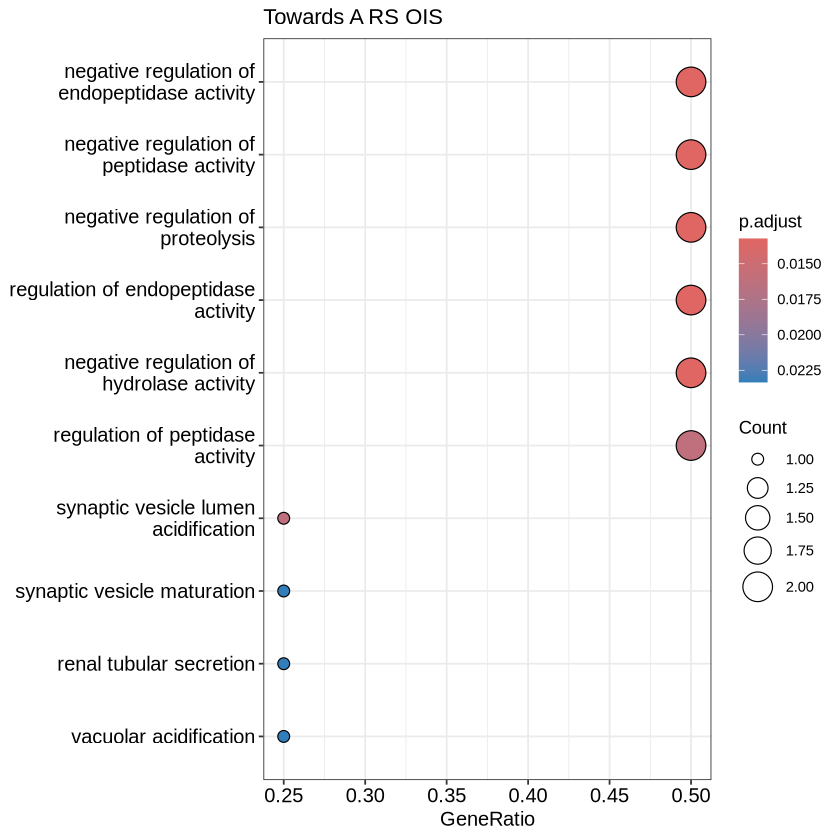

'select()' returned 1:1 mapping between keys and columns

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .   

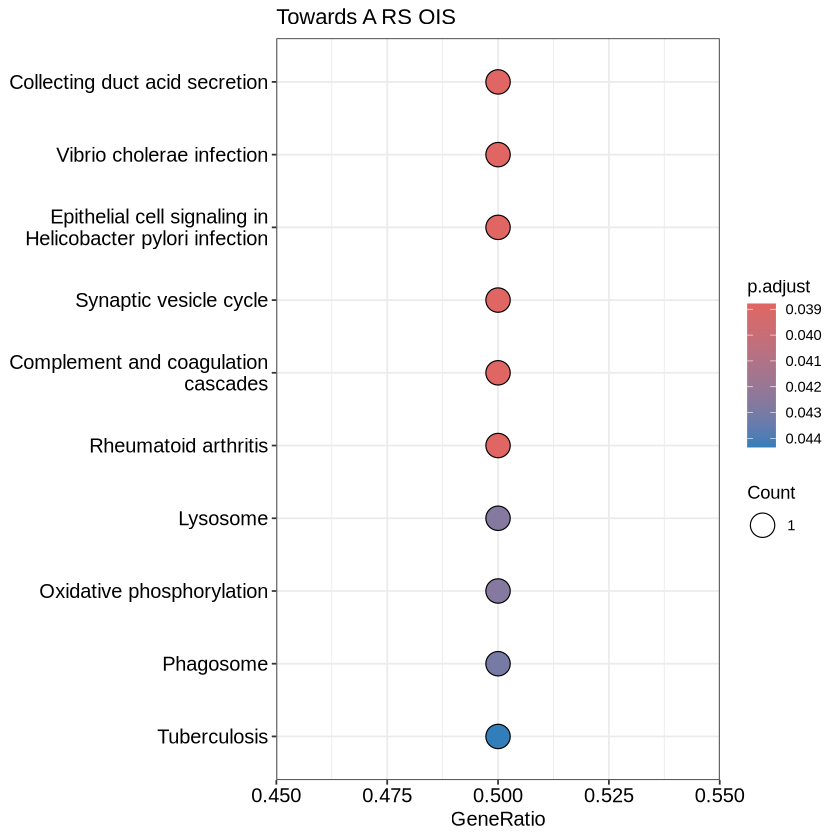

'select()' returned 1:1 mapping between keys and columns



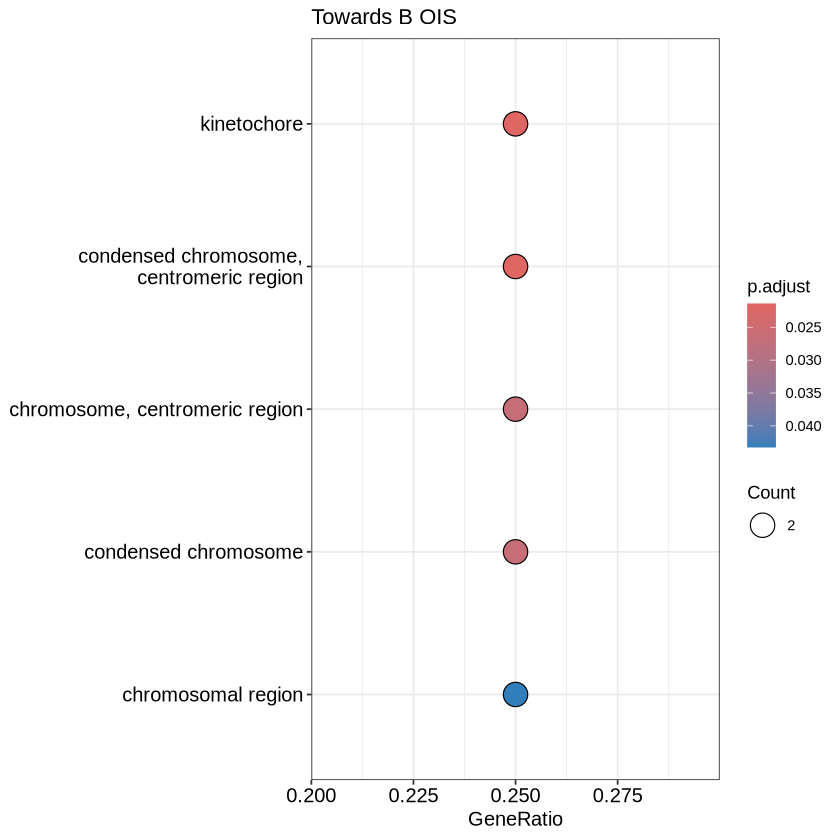

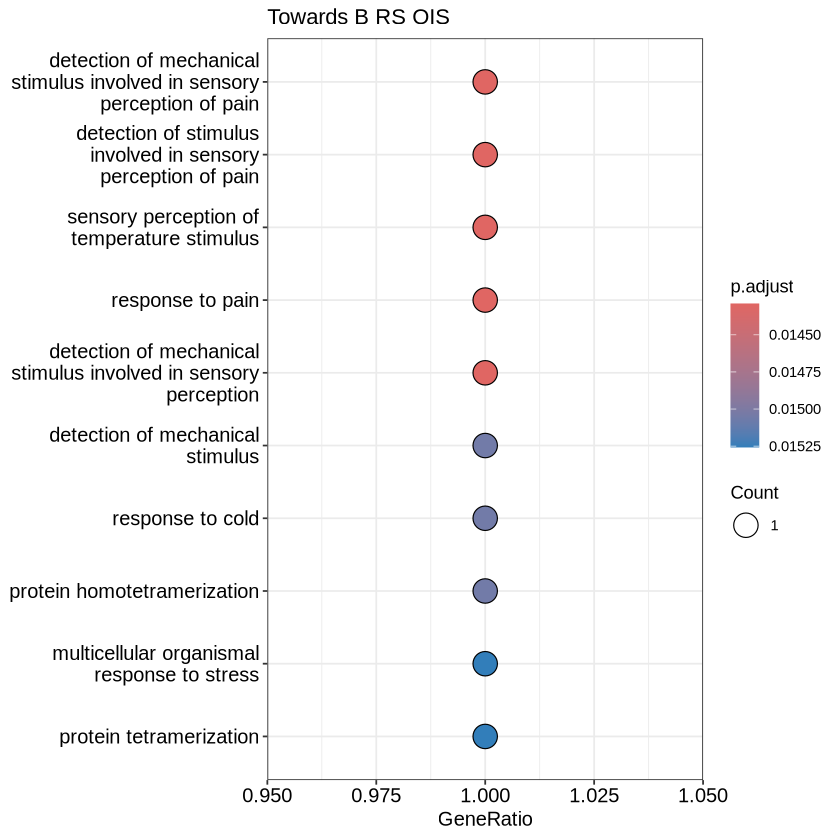

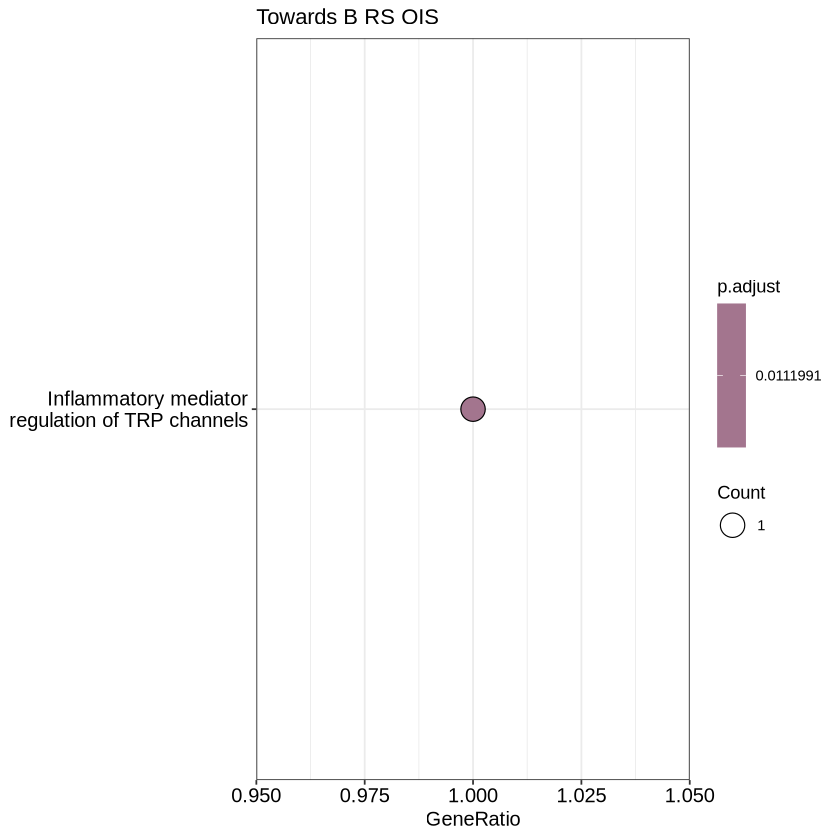

In [1]:
#supplementary figure 3 (a/b GO and KEGG)

library(clusterProfiler)
library(org.Hs.eg.db)
library(ggplot2)

#AB GO KEGG B to A OIS#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis/towards_a_up_pro_ois_unique.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
dchic_towards_A_OIS_go <- dotplot(ego, showCategory=10) + ggtitle("Towards A OIS")
dchic_towards_A_OIS_go

#AB GO KEGG B to A RS OIS#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis/towards_a_up_shared.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
dchic_towards_A_RS_OIS_go <- dotplot(ego, showCategory=10) + ggtitle("Towards A RS OIS")
dchic_towards_A_RS_OIS_go

#kegg test
kk <- enrichKEGG(gene         = entrez,
                 organism     = 'hsa',
                 pvalueCutoff = 0.05,
                 pAdjustMethod = "BH")

dchic_towards_A_RS_OIS_kegg <- dotplot(kk, showCategory=10) + ggtitle("Towards A RS OIS")
dchic_towards_A_RS_OIS_kegg

#AB GO KEGG A to B RS#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis//towards_b_down_pro_rs_unique.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
dchic_towards_B_RS_go <- dotplot(ego, showCategory=10) #+ ggtitle("B to A RS")
dchic_towards_B_RS_go

#AB GO KEGG A to B OIS#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis//towards_b_down_pro_ois_unique.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
dchic_towards_B_OIS_go <- dotplot(ego, showCategory=10) + ggtitle("Towards B OIS")
dchic_towards_B_OIS_go

#AB GO KEGG A to B RS OIS#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis//towards_b_down_shared.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
dchic_towards_B_RS_OIS_go <- dotplot(ego, showCategory=10) + ggtitle("Towards B RS OIS")
dchic_towards_B_RS_OIS_go

#kegg test
kk <- enrichKEGG(gene         = entrez,
                 organism     = 'hsa',
                 pvalueCutoff = 0.05,
                 pAdjustMethod = "BH")

dchic_towards_B_RS_OIS_kegg <- dotplot(kk, showCategory=10) + ggtitle("Towards B RS OIS")
dchic_towards_B_RS_OIS_kegg
#pathview(gene.data  = entrez,
#         pathway.id = "hsa04750",
#         species    = "hsa")


In [ ]:
#supplementary figure 4 is in the subcompartment portion

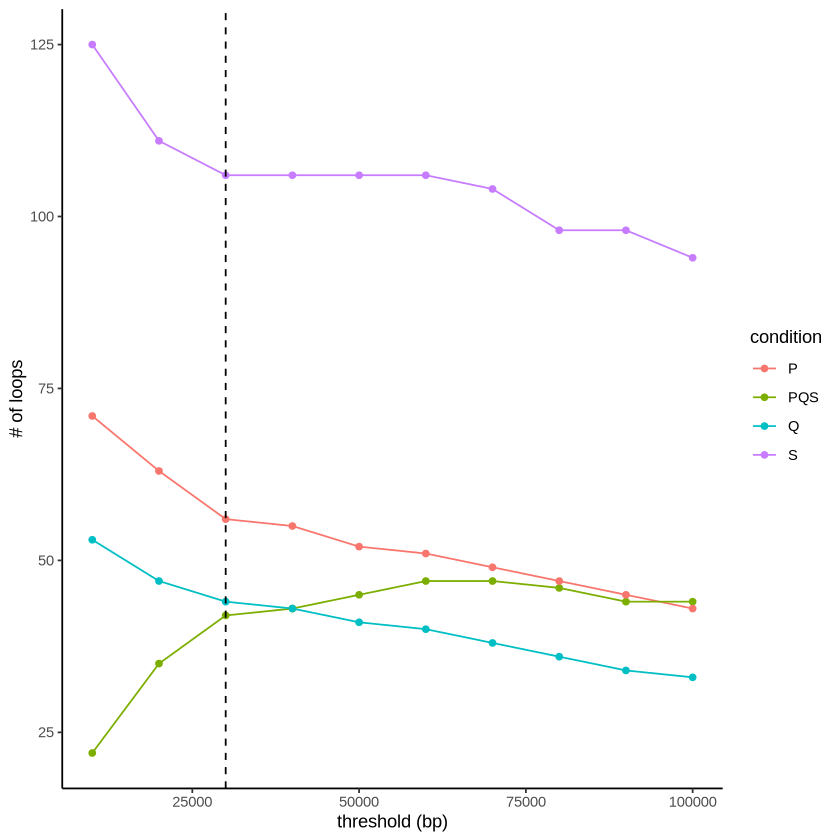

In [2]:
#supplementary figure 5 - made with illustrator, the output of the loop thresholding portion, and the following:

library(ggplot2) 
######loops supplementary###########################################################################

conditions <- c('PQS', 'P', 'Q', 'S')
hundred <- c(44, 43, 33, 94)
ninety <- c(44, 45, 34, 98)
eighty <- c(46, 47, 36, 98)
seventy <- c(47, 49, 38, 104)
sixty <- c(47, 51, 40, 106)
fifty <- c(45, 52, 41, 106)
forty <- c(43, 55, 43, 106)
thirty <- c(42, 56, 44, 106)
twenty <- c(35, 63, 47, 111)
ten <- c(22, 71, 53, 125)

loop_threshold_table <- data.frame(counts = c(hundred, ninety, eighty, seventy, sixty,
                                              fifty, forty, thirty, twenty, ten),
                                   condition = c(rep(conditions, 10)),
                                   threshold = c(100000,100000,100000,100000,
                                                 90000,90000,90000,90000,
                                                 80000,80000,80000,80000,
                                                 70000,70000,70000,70000,
                                                 60000,60000,60000,60000,
                                                 50000,50000,50000,50000,
                                                 40000,40000,40000,40000,
                                                 30000,30000,30000,30000,
                                                 20000,20000,20000,20000,
                                                 10000,10000,10000,10000))

loop_threshold_plot <- ggplot(loop_threshold_table, aes(x=threshold, y=counts, color = condition)) + geom_line() + geom_point() + theme_bw() + theme(plot.background = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.border = element_blank()) + theme(axis.line = element_line(color = 'black')) + ylab("# of loops") + xlab("threshold (bp)") 
loop_threshold_plot <- loop_threshold_plot + geom_vline(xintercept = 30000, linetype = "dashed")
loop_threshold_plot


In [ ]:
#supplementary figure 6

#stringent loops go and kegg already done with lenient
#methylation already done

In [ ]:
#supplementary figure 7

#already done with LINE1 stuff

In [3]:
#supplementary figure 8 (R)

library(fgsea)
library(tidyverse)
library(dplyr)
library(clusterProfiler)
library(org.Hs.eg.db)
#library(data.table)

qui_pro_ranked <- read.table('rna/qui_v_pro_ranked.txt', header = TRUE)
colnames(qui_pro_ranked) <- c("row", "logFC")
ens2symbol <- AnnotationDbi::select(org.Hs.eg.db,
                                    key=qui_pro_ranked$row, 
                                    columns="SYMBOL",
                                    keytype="ENSEMBL")
ens2symbol <- as_tibble(ens2symbol)
qui_pro_ranked <- inner_join(qui_pro_ranked, ens2symbol, by=c("row"="ENSEMBL"))
qui_pro_ranked2 <- qui_pro_ranked %>% 
  dplyr::select(SYMBOL, logFC) %>% 
  na.omit() %>% 
  distinct() %>% 
  group_by(SYMBOL) %>% 
  summarize(logFC=mean(logFC))
qui_pro_ranked2 <- qui_pro_ranked2[order(qui_pro_ranked2$logFC, decreasing = TRUE),]
ranks <- deframe(qui_pro_ranked2)
pathways.hallmark <- gmtPathways("rna/msigdb_gsea/msigdb_v2023.1.Hs_GMTs/h.all.v2023.1.Hs.symbols.gmt")
fgseaRes <- fgsea(pathways=pathways.hallmark, stats=ranks, nperm=1000)
fgseaRes$pathway = str_replace(fgseaRes$pathway, "HALLMARK_", "")
fgseaRes
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))
fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>%
  DT::datatable()
qui_gsea <- ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.25)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="GSEA Quiescent") + 
  theme_minimal() + theme(legend.position="bottom", legend.box = "horizontal")


sen_pro_ranked <- read.table('rna/sen_v_pro_ranked.txt', header = TRUE)
colnames(sen_pro_ranked) <- c("row", "logFC")
ens2symbol <- AnnotationDbi::select(org.Hs.eg.db,
                                    key=sen_pro_ranked$row, 
                                    columns="SYMBOL",
                                    keytype="ENSEMBL")
ens2symbol <- as_tibble(ens2symbol)
sen_pro_ranked <- inner_join(sen_pro_ranked, ens2symbol, by=c("row"="ENSEMBL"))
sen_pro_ranked2 <- sen_pro_ranked %>% 
  dplyr::select(SYMBOL, logFC) %>% 
  na.omit() %>% 
  distinct() %>% 
  group_by(SYMBOL) %>% 
  summarize(logFC=mean(logFC))
sen_pro_ranked2 <- sen_pro_ranked2[order(sen_pro_ranked2$logFC, decreasing = TRUE),]
ranks <- deframe(sen_pro_ranked2)
pathways.hallmark <- gmtPathways("rna/msigdb_gsea/msigdb_v2023.1.Hs_GMTs/h.all.v2023.1.Hs.symbols.gmt")
fgseaRes <- fgsea(pathways=pathways.hallmark, stats=ranks, nperm=1000)
fgseaRes$pathway = str_replace(fgseaRes$pathway, "HALLMARK_", "")
fgseaResTidy <- fgseaRes %>%
  as_tibble() %>%
  arrange(desc(NES))
fgseaResTidy %>% 
  dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>% 
  arrange(padj) %>% 
  DT::datatable()
sen_gsea<-ggplot(fgseaResTidy, aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=padj<0.25)) +
  coord_flip() +
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="GSEA RS") + 
  theme_minimal() + theme(legend.position="bottom", legend.box = "horizontal")
plotGseaTable(pathways.hallmark[fgseaRes$pathway[fgseaRes$padj < 0.05]], ranks, fgseaRes, 
              gseaParam=0.5)

qui_ranked_list <- qui_pro_ranked$logFC
names(qui_ranked_list) <- as.character(qui_pro_ranked$Gene)
uniq_qui_ranked_list <- qui_ranked_list[unique(names(qui_ranked_list))]


qui_gsea <- gseGO(geneList     = uniq_qui_ranked_list,
                  OrgDb        = org.Hs.eg.db,
                  keyType = 'ENSEMBL',
                  minGSSize    = 100,
                  maxGSSize    = 500,
                  pvalueCutoff = 0.05,
                  verbose      = FALSE)

#sen_pro_ranked <- read.table('rna/revised_order/sen_v_pro_ranked.txt', header = TRUE)
sen_ranked_list <- sen_pro_ranked$logFC
names(sen_ranked_list) <- as.character(sen_pro_ranked$Gene)
uniq_sen_ranked_list <- sen_ranked_list[unique(names(sen_ranked_list))]

sen_gsea <- gseGO(geneList     = uniq_sen_ranked_list,
              OrgDb        = org.Hs.eg.db,
              keyType = 'ENSEMBL',
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)

gseaplot(sen_gsea, geneSetID = 16, by = "runningScore", title = sen_gsea$Description[16])


ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




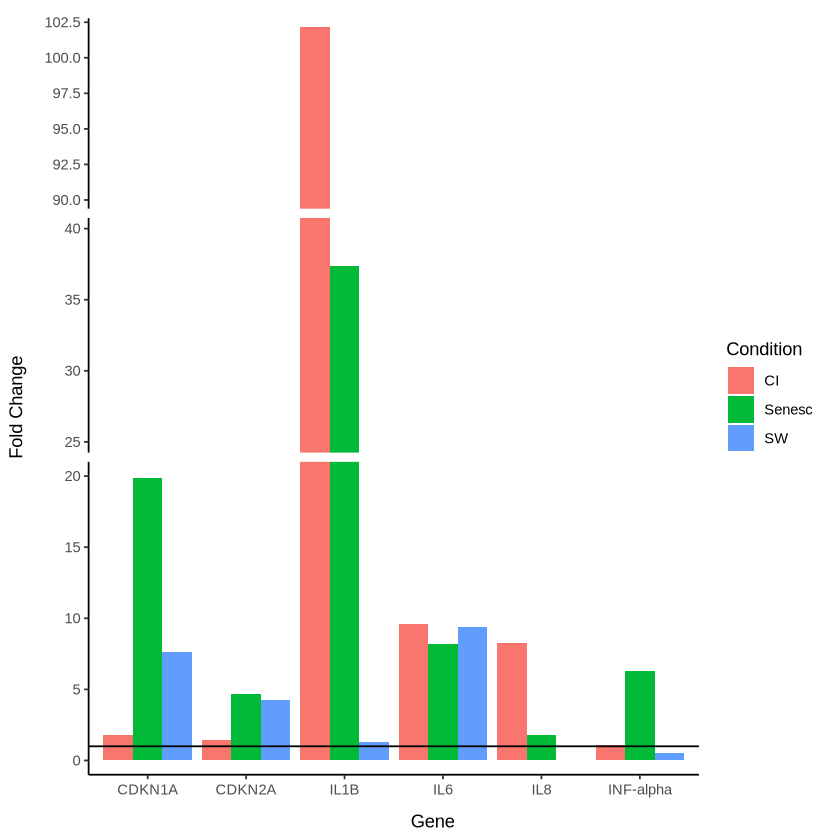

In [5]:
#qui RT-qPCR#######################################################################################################################################
library(ggplot2)
library(ggbreak)

qpcr_results <- read.csv('hic_paper_analysis/qui_qpcr/qpcr_results.csv')
qpcr_plot <- ggplot(qpcr_results, aes(x=Gene, y=FC, fill=Condition)) + geom_bar(stat = "identity", position = position_dodge()) + geom_hline(yintercept = 1) +
  theme(text = element_text(size = 25)) + theme_bw() + theme(plot.background = element_blank(),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),panel.border = element_blank()) +
  theme(axis.line = element_line(color = 'black')) + ylab("Fold Change") + theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5)) + scale_y_break(c(40, 90)) + scale_y_break(c(20, 25)) #+ facet_zoom(ylim = c(0,20)) 
qpcr_plot

Warning message in file(file, "rt"):
“cannot open file 'hic_paper_analysis/compartment_analysis/to.B.qui.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


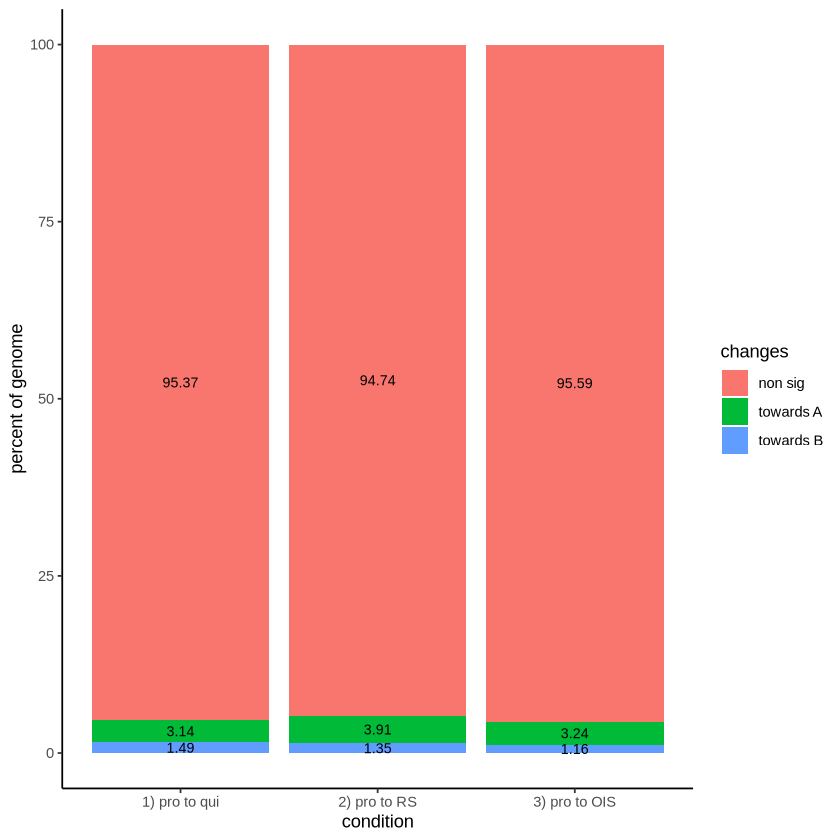

In [7]:
#supp figure 9 (dchic a/b w/ qui) (R)

library(ggplot2)
library(clusterProfiler)
library(org.Hs.eg.db)

#dchic pro qui ois#######################################################################################################################################
dchic_df <- data.frame(changes = c('non sig', 'towards A', 'towards B', 'non sig', 'towards A', 'towards B', 'non sig', 'towards A', 'towards B'),
                       condition = c('1) pro to qui', '1) pro to qui', '1) pro to qui', '2) pro to RS', '2) pro to RS', '2) pro to RS', '3) pro to OIS', '3) pro to OIS', '3) pro to OIS'),
                       percent_of_genome = c(28410-893-422, 893, 422, 28410-1111-383, 1111, 383, 28406-920-330, 920, 330))
dchic_for_chi <- data.frame(non_sig = c(28410-893-422, 28410-1111-383, 28406-920-330),
                            towards_A = c(893, 1111, 920),
                            towards_B = c(422, 383, 330))

dchic_df$percent_of_genome = dchic_df$percent_of_genome/28410*100

dchic_plot_w_qui <- ggplot(dchic_df, aes(fill=changes, y=percent_of_genome, x = condition, label = round(percent_of_genome, digits = 2))) + 
  geom_bar(position="stack", stat="identity") +  geom_text(size = 3, position = position_stack(vjust = 0.5)) + 
  theme(text = element_text(size = 25)) + theme_bw() + theme(
    plot.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank()
  ) +
  
  #draws x and y axis line
  theme(axis.line = element_line(color = 'black')) + ylab("percent of genome")
dchic_plot_w_qui

#AB GO KEGG B to A QUI#######################################################################################################################################
gene_list <- read.table('hic_paper_analysis/compartment_analysis/to.B.qui.txt')
entrez = mapIds(org.Hs.eg.db,
                keys=gene_list$V1, #Column containing Ensembl gene ids
                column="ENTREZID",
                keytype="ENSEMBL",
                multiVals="first")
ego <- enrichGO(gene          = entrez,
                OrgDb         = org.Hs.eg.db,
                keyType = 'ENTREZID',
                ont           = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)

ego
#dchic_towards_A_qui_go <- dotplot(ego, showCategory=10) + ggtitle("Towards A qui")
#dchic_towards_A_qui_go

#kegg test
#kk <- enrichKEGG(gene         = entrez,
#                 organism     = 'hsa',
#                 pvalueCutoff = 0.05,
#                 pAdjustMethod = "BH")
#kk
